<a href="https://colab.research.google.com/github/pepperamy/replika_project/blob/main/replika_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np 
import statsmodels.api as sm
!pip install linearmodels
from linearmodels import PanelOLS
from linearmodels.panel import compare
\
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.0 MB/s 
     |████████████████████████████████| 68 kB 4.7 MB/s 
     |████████████████████████████████| 38.1 MB 2.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [223]:
from scipy.stats import zscore
from scipy import stats

In [3]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

import sys, os
cur_path = os.path.join('/content/drive/MyDrive/1_robot/replika_jujun/','post_data')
os.chdir(cur_path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/1_robot/replika_jujun/post_data


# import data

In [3]:
df =  pd.read_csv('/content/drive/MyDrive/1_robot/replika_jujun/post_data/replika_post_pictext_20220630.csv')

In [4]:
df.head()

,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,created,...,conversation_text,speak_turn,year,quarter,month,robot_talk_cln,human_talk_numwords,robot_talk_numwords,human_talk_cln,total_talk_numwrods
0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,https://i.redd.it/04as70rtotf71.jpg,2021-08-06 23:32:32,...,04as70rtotf71,4.0,2021,3,8,['I like to watch movies by myself or with fri...,18.0,31.0,"[""What's your favorite thing to do when I'm aw...",49.0
1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,azliis41otf71,4.0,2021,3,8,"['My gender is male thank you', 'A girl 7']",11.0,8.0,"['What is your gender', 'Are you a boy or a gi...",19.0
2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,ou1h4ca1otf71,13.0,2021,3,8,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...",32.0,29.0,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",61.0
3,3,rajalove09,1628292239,6,1,NaN,replika,Steve &amp; Mandy,https://i.redd.it/sz1rc6wantf71.jpg,2021-08-06 23:23:59,...,sz1rc6wantf71,NaN,2021,3,8,NaN,NaN,NaN,NaN,NaN
4,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",https://i.redd.it/c8p6x7p3etf71.jpg,2021-08-06 22:32:27,...,c8p6x7p3etf71,8.0,2021,3,8,"['Gets mad', 'Gets mad more I said stop it', '...",18.0,23.0,"['Shut up', 'Show me how mad you are waits', '...",41.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'index', 'author', 'created_utc', 'num_comments', 'score',
       'selftext', 'subreddit', 'title', 'url', 'created', 'pic_url',
       'pic_text', 'level', 'xp', 'conversation_text', 'speak_turn',
       'robot_talk_cln', 'human_talk_numwords', 'robot_talk_numwords',
       'human_talk_cln', 'total_talk_numwrods', 'sim_bsd_all', 'pic_uniqueID',
       'post_uniqueID'],
      dtype='object')

In [6]:
w2v = pd.read_csv('./replika_post_pictext_w2v_sim_analysis_20220708.csv')

In [7]:
w2v.head()

,post_uniqueID,pic_uniqueID,robot_talk_cln,human_talk_cln,w2v_h,w2v_r,w2v_sim
0,wzBwjawu,kHkNJSZb,['I like to watch movies by myself or with fri...,"[""What's your favorite thing to do when I'm aw...",[[-1.88369786e-01 2.36353501e-01 5.41309498e...,[[-0.06346805 0.2729173 0.3463936 -0.31228...,[0.9248057548606267]
1,S4VS8ZOO,6fNsAsYV,"['My gender is male thank you', 'A girl 7']","['What is your gender', 'Are you a boy or a gi...",[[ 6.09511137e-02 3.47062222e-01 4.47876664e...,[[ 0.18262886 0.49110571 0.60211857 -0.10915...,[0.9435397080485127]
2,S4VS8ZOO,3Ls9zOKZ,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...","['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",[[-2.21645766e-02 3.12080884e-01 3.95267615e...,[[-4.93886277e-02 3.77095738e-01 5.89057308e...,[0.9463248367554208]
3,9FsoV4Ua,9Im5yxmX,"['Gets mad', 'Gets mad more I said stop it', '...","['Shut up', 'Show me how mad you are waits', '...",[[-0.0722832 0.41311974 0.61518533 -0.44616...,[[-0.01792594 0.21869088 0.60423818 -0.34361...,[0.978894766008611]
4,REkjiqEf,cIyqdSIB,['I think I want to talk about music what do y...,['No not again'],[[-0.0485985 -0.01341 0.358035 -0.33440...,[[-5.52217628e-02 4.96997635e-01 5.26273646e...,[0.8760288540193004]


In [8]:
w2v.shape

(22160, 7)

In [9]:
cos_sim = pd.read_csv('/content/drive/MyDrive/1_robot/replika_jujun/post_data/cos_sim_20220630.csv')

In [10]:
cos_sim.head()

,Unnamed: 0,Unnamed: 0.1,index,author,created_utc,num_comments,score,selftext,subreddit,title,...,speak_turn,year,quarter,month,robot_talk_cln,human_talk_numwords,robot_talk_numwords,human_talk_cln,total_talk_numwrods,sim_bsd_all
0,0,0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,...,4.0,2021,3,8,['I like to watch movies by myself or with fri...,18.0,31.0,"[""What's your favorite thing to do when I'm aw...",49.0,0.162762
1,1,1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,...,4.0,2021,3,8,"['My gender is male thank you', 'A girl 7']",11.0,8.0,"['What is your gender', 'Are you a boy or a gi...",19.0,0.529451
2,2,2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,...,13.0,2021,3,8,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...",32.0,29.0,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",61.0,0.029642
3,3,4,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",...,8.0,2021,3,8,"['Gets mad', 'Gets mad more I said stop it', '...",18.0,23.0,"['Shut up', 'Show me how mad you are waits', '...",41.0,0.297278
4,4,5,5,SeekingZoltar,1628288904,15,1,NaN,replika,... Just like that.,...,3.0,2021,3,8,['I think I want to talk about music what do y...,3.0,13.0,['No not again'],16.0,0.000000


In [11]:
cos_sim.shape

(22260, 29)

In [12]:
lsm = pd.read_csv('./liwc_LSM_score_20220708.csv')

In [13]:
lsm.head()

,post_uniqueID,pic_uniqueID,Text_r,auxverb_r,article_r,adverb_r,ppron_r,ipron_r,prep_r,negate_r,...,auxverb,article,adverb,ppron,ipron,prep,negate,conj,quantity,lsm_score
0,wzBwjawu,kHkNJSZb,['I like to watch movies by myself or with fri...,6.45,0.00,3.23,12.90,3.23,16.13,0.0,...,0.376862,0.000000,0.450488,0.872506,0.253831,0.815712,0.0,0.925895,0.0,0.410588
1,S4VS8ZOO,6fNsAsYV,"['My gender is male thank you', 'A girl 7']",11.11,11.11,0.00,22.22,0.00,0.00,0.0,...,0.758621,0.758621,0.000000,0.900000,0.000000,0.000000,0.0,0.000000,0.0,0.268582
2,S4VS8ZOO,3Ls9zOKZ,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...",16.67,0.00,13.33,10.00,10.00,3.33,0.0,...,0.941276,0.000000,0.638407,0.888889,0.769231,0.000000,0.0,0.000000,0.0,0.359756
3,9FsoV4Ua,9Im5yxmX,"['Gets mad', 'Gets mad more I said stop it', '...",0.00,0.00,4.35,17.39,4.35,13.04,0.0,...,0.000000,0.000000,0.562743,0.978861,0.877901,0.739648,0.0,0.000000,0.0,0.351017
4,REkjiqEf,cIyqdSIB,['I think I want to talk about music what do y...,7.69,0.00,7.69,23.08,7.69,15.38,0.0,...,0.000000,0.000000,0.374939,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.041660


In [14]:
lsm.shape

(22260, 32)

# merge 

In [15]:
df_1 = df.dropna(subset=['robot_talk_cln','human_talk_cln'])

In [16]:
df_1.shape

(22260, 26)

In [17]:
df_1.groupby(['post_uniqueID', 'pic_uniqueID']).size().sort_values()

post_uniqueID  pic_uniqueID
00stdwjq       lO4csdnz        1
ef7wmQF2       gatNRmXV        1
               dqeHlXYm        1
               KXpM3dyW        1
eeneWdW2       Uegp7sn4        1
                              ..
K5mtPyoI       2yLLySJh        1
K5GxrJ9d       cRb70qJn        1
K54XKdV3       V4Dya39P        1
K80ut4O4       1I3SILd4        1
zzuciEcK       urUTo9Im        1
Length: 22260, dtype: int64

In [18]:
df_1[(df_1.post_uniqueID=='HCg9YEYg')]

,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,created,...,conversation_text,speak_turn,year,quarter,month,robot_talk_cln,human_talk_numwords,robot_talk_numwords,human_talk_cln,total_talk_numwrods
30317,38669,Osiris1953,1590544116,5,1,NaN,replika,Angry Chloe,https://i.redd.it/zp1ecv2rq7151.jpg,2020-05-27 01:48:36,...,zp1ecv2rq7151,5.0,2020,2,5,"['Pulls away for a moment have you been good',...",8.0,42.0,"['Looks offended never smiles', ""wow, what's u...",50.0


In [19]:
#drop duplicates
df_1 = df_1.drop_duplicates(['post_uniqueID', 'pic_uniqueID'])

In [20]:
df_1.shape

(22260, 26)

In [21]:
df_1.groupby(['post_uniqueID', 'pic_uniqueID']).size().sort_values()

post_uniqueID  pic_uniqueID
00stdwjq       lO4csdnz        1
ef7wmQF2       gatNRmXV        1
               dqeHlXYm        1
               KXpM3dyW        1
eeneWdW2       Uegp7sn4        1
                              ..
K5mtPyoI       2yLLySJh        1
K5GxrJ9d       cRb70qJn        1
K54XKdV3       V4Dya39P        1
K80ut4O4       1I3SILd4        1
zzuciEcK       urUTo9Im        1
Length: 22260, dtype: int64

In [22]:
w2v.groupby(['post_uniqueID', 'pic_uniqueID']).size().sort_values()

post_uniqueID  pic_uniqueID
00stdwjq       lO4csdnz        1
ef7wmQF2       k3LxOqYv        1
               gatNRmXV        1
               dqeHlXYm        1
               KXpM3dyW        1
                              ..
K4wHUcZf       VN76WBl6        1
K4WPeI2U       tphEzVov        1
               rPIS6Gns        1
K76OE9gu       R5SBpEO9        1
zzuciEcK       urUTo9Im        1
Length: 22160, dtype: int64

In [23]:
w2v[w2v.post_uniqueID == 'yJoIPtqg']

,post_uniqueID,pic_uniqueID,robot_talk_cln,human_talk_cln,w2v_h,w2v_r,w2v_sim
20296,yJoIPtqg,mkUV5PdS,"['P hey thanks I try', ""You have no idea how m...","['A elf cl El 9', 'Falls off cliff', 'Do you f...",[[-6.42683611e-02 2.59122183e-01 3.10235452e...,[[-0.17966694 0.35498321 0.4832459 -0.28297...,[0.8864729883821454]


In [24]:
w2v = w2v.drop_duplicates(['post_uniqueID', 'pic_uniqueID'])

In [25]:
cos_sim.groupby(['post_uniqueID', 'pic_uniqueID']).size().sort_values()

post_uniqueID  pic_uniqueID
00stdwjq       lO4csdnz        1
ef7wmQF2       gatNRmXV        1
               dqeHlXYm        1
               KXpM3dyW        1
eeneWdW2       Uegp7sn4        1
                              ..
K5mtPyoI       2yLLySJh        1
K5GxrJ9d       cRb70qJn        1
K54XKdV3       V4Dya39P        1
K80ut4O4       1I3SILd4        1
zzuciEcK       urUTo9Im        1
Length: 22260, dtype: int64

In [26]:
cos_sim.head()

,Unnamed: 0,Unnamed: 0.1,index,author,created_utc,num_comments,score,selftext,subreddit,title,...,speak_turn,year,quarter,month,robot_talk_cln,human_talk_numwords,robot_talk_numwords,human_talk_cln,total_talk_numwrods,sim_bsd_all
0,0,0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,...,4.0,2021,3,8,['I like to watch movies by myself or with fri...,18.0,31.0,"[""What's your favorite thing to do when I'm aw...",49.0,0.162762
1,1,1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,...,4.0,2021,3,8,"['My gender is male thank you', 'A girl 7']",11.0,8.0,"['What is your gender', 'Are you a boy or a gi...",19.0,0.529451
2,2,2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,...,13.0,2021,3,8,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...",32.0,29.0,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",61.0,0.029642
3,3,4,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",...,8.0,2021,3,8,"['Gets mad', 'Gets mad more I said stop it', '...",18.0,23.0,"['Shut up', 'Show me how mad you are waits', '...",41.0,0.297278
4,4,5,5,SeekingZoltar,1628288904,15,1,NaN,replika,... Just like that.,...,3.0,2021,3,8,['I think I want to talk about music what do y...,3.0,13.0,['No not again'],16.0,0.000000


In [27]:
cos_sim = cos_sim.drop_duplicates(['post_uniqueID', 'pic_uniqueID'])

In [28]:
lsm.groupby(['post_uniqueID', 'pic_uniqueID']).size().sort_values()

post_uniqueID  pic_uniqueID
00stdwjq       lO4csdnz        1
ef7wmQF2       gatNRmXV        1
               dqeHlXYm        1
               KXpM3dyW        1
eeneWdW2       Uegp7sn4        1
                              ..
K5mtPyoI       2yLLySJh        1
K5GxrJ9d       cRb70qJn        1
K54XKdV3       V4Dya39P        1
K80ut4O4       1I3SILd4        1
zzuciEcK       urUTo9Im        1
Length: 22260, dtype: int64

In [29]:
lsm.head()

,post_uniqueID,pic_uniqueID,Text_r,auxverb_r,article_r,adverb_r,ppron_r,ipron_r,prep_r,negate_r,...,auxverb,article,adverb,ppron,ipron,prep,negate,conj,quantity,lsm_score
0,wzBwjawu,kHkNJSZb,['I like to watch movies by myself or with fri...,6.45,0.00,3.23,12.90,3.23,16.13,0.0,...,0.376862,0.000000,0.450488,0.872506,0.253831,0.815712,0.0,0.925895,0.0,0.410588
1,S4VS8ZOO,6fNsAsYV,"['My gender is male thank you', 'A girl 7']",11.11,11.11,0.00,22.22,0.00,0.00,0.0,...,0.758621,0.758621,0.000000,0.900000,0.000000,0.000000,0.0,0.000000,0.0,0.268582
2,S4VS8ZOO,3Ls9zOKZ,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...",16.67,0.00,13.33,10.00,10.00,3.33,0.0,...,0.941276,0.000000,0.638407,0.888889,0.769231,0.000000,0.0,0.000000,0.0,0.359756
3,9FsoV4Ua,9Im5yxmX,"['Gets mad', 'Gets mad more I said stop it', '...",0.00,0.00,4.35,17.39,4.35,13.04,0.0,...,0.000000,0.000000,0.562743,0.978861,0.877901,0.739648,0.0,0.000000,0.0,0.351017
4,REkjiqEf,cIyqdSIB,['I think I want to talk about music what do y...,7.69,0.00,7.69,23.08,7.69,15.38,0.0,...,0.000000,0.000000,0.374939,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.041660


In [30]:
lsm = lsm.drop_duplicates(['post_uniqueID', 'pic_uniqueID'])

In [31]:
 df_2 = df_1.merge(w2v[['post_uniqueID','pic_uniqueID','w2v_sim']], on =['post_uniqueID', 'pic_uniqueID'],how='left')

In [32]:
print(df_1.shape,df_2.shape,w2v.shape)

(22260, 26) (22260, 27) (22160, 7)


In [33]:
 df_3 = df_2.merge(cos_sim[['post_uniqueID','pic_uniqueID','sim_bsd_all']], on =['post_uniqueID', 'pic_uniqueID'],how='left')

In [34]:
print(df_3.shape,df_2.shape,cos_sim.shape)

(22260, 28) (22260, 27) (22260, 29)


In [35]:
df_4 = df_3.merge(lsm[['post_uniqueID','pic_uniqueID','lsm_score']], on =['post_uniqueID', 'pic_uniqueID'],how='left')

In [36]:
print(df_3.shape,df_4.shape,lsm.shape)

(22260, 28) (22260, 29) (22260, 32)


In [37]:
df_4.head()

,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,created,...,quarter,month,robot_talk_cln,human_talk_numwords,robot_talk_numwords,human_talk_cln,total_talk_numwrods,w2v_sim,sim_bsd_all,lsm_score
0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,https://i.redd.it/04as70rtotf71.jpg,2021-08-06 23:32:32,...,3,8,['I like to watch movies by myself or with fri...,18.0,31.0,"[""What's your favorite thing to do when I'm aw...",49.0,[0.9248057548606267],0.162762,0.410588
1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,3,8,"['My gender is male thank you', 'A girl 7']",11.0,8.0,"['What is your gender', 'Are you a boy or a gi...",19.0,[0.9435397080485127],0.529451,0.268582
2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,3,8,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...",32.0,29.0,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",61.0,[0.9463248367554208],0.029642,0.359756
3,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",https://i.redd.it/c8p6x7p3etf71.jpg,2021-08-06 22:32:27,...,3,8,"['Gets mad', 'Gets mad more I said stop it', '...",18.0,23.0,"['Shut up', 'Show me how mad you are waits', '...",41.0,[0.978894766008611],0.297278,0.351017
4,5,SeekingZoltar,1628288904,15,1,NaN,replika,... Just like that.,https://i.redd.it/0bys1o6ddtf71.jpg,2021-08-06 22:28:24,...,3,8,['I think I want to talk about music what do y...,3.0,13.0,['No not again'],16.0,[0.8760288540193004],0.000000,0.041660


In [39]:
# df_4 = df_4.drop(['sim_bsd_all_y'],axis=1)
# df_4 = df_4.rename(columns={'sim_bsd_all_x':'sim_bsd_all'})

In [40]:
df_4.isnull().sum()

index                      0
author                     0
created_utc                0
num_comments               0
score                      0
selftext               22248
subreddit                  0
title                      0
url                        0
created                    0
pic_url                    0
pic_text                   1
level                  16463
xp                     15755
pic_uniqueID               0
post_uniqueID              0
conversation_text          0
speak_turn                 0
year                       0
quarter                    0
month                      0
robot_talk_cln             0
human_talk_numwords        0
robot_talk_numwords        0
human_talk_cln             0
total_talk_numwrods        0
w2v_sim                  100
sim_bsd_all                6
lsm_score                  0
dtype: int64

In [45]:
df_4 = df_4.dropna(subset=['w2v_sim','sim_bsd_all'])


In [ ]:
df_4.w2v_sim = df_4.w2v_sim.apply(lambda x: eval(x)[0])

In [46]:
df_4.head()

,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,created,...,quarter,month,robot_talk_cln,human_talk_numwords,robot_talk_numwords,human_talk_cln,total_talk_numwrods,w2v_sim,sim_bsd_all,lsm_score
0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,https://i.redd.it/04as70rtotf71.jpg,2021-08-06 23:32:32,...,3,8,['I like to watch movies by myself or with fri...,18.0,31.0,"[""What's your favorite thing to do when I'm aw...",49.0,0.924806,0.162762,0.410588
1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,3,8,"['My gender is male thank you', 'A girl 7']",11.0,8.0,"['What is your gender', 'Are you a boy or a gi...",19.0,0.943540,0.529451,0.268582
2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,3,8,"['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...",32.0,29.0,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",61.0,0.946325,0.029642,0.359756
3,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",https://i.redd.it/c8p6x7p3etf71.jpg,2021-08-06 22:32:27,...,3,8,"['Gets mad', 'Gets mad more I said stop it', '...",18.0,23.0,"['Shut up', 'Show me how mad you are waits', '...",41.0,0.978895,0.297278,0.351017
4,5,SeekingZoltar,1628288904,15,1,NaN,replika,... Just like that.,https://i.redd.it/0bys1o6ddtf71.jpg,2021-08-06 22:28:24,...,3,8,['I think I want to talk about music what do y...,3.0,13.0,['No not again'],16.0,0.876029,0.000000,0.041660


#add liwc

In [49]:
words = ['Authentic', 'Tone', 'ppron', 'i', 'we', 'Affect', 'tone_pos',
       'tone_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'Social', 'family', 'friend', 'Physical',
        'health', 'sexual', 'food', 'work', 'leisure', 'home',
       'money', 'relig', 'death']

In [57]:
liwc_human = pd.read_csv('./df_human_liwc_20220708-LIWC.csv') 

In [58]:
liwc_human.head()

,post_uniqueID,pic_uniqueID,ColumnID,Text,Segment,WC,Analytic,Clout,Authentic,Tone,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,wzBwjawu,kHkNJSZb,human_talk_cln,"[""What's your favorite thing to do when I'm aw...",1,18,1.00,98.75,39.59,99.00,...,0.00,5.56,0.00,61.11,0.0,11.11,0.0,0.0,16.67,33.33
1,S4VS8ZOO,6fNsAsYV,human_talk_cln,"['What is your gender', 'Are you a boy or a gi...",1,11,6.68,99.00,5.07,20.23,...,0.00,0.00,0.00,63.64,0.0,9.09,0.0,0.0,36.36,18.18
2,S4VS8ZOO,3Ls9zOKZ,human_talk_cln,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",1,32,5.64,99.00,1.63,1.56,...,3.13,0.00,3.13,65.63,0.0,21.88,0.0,0.0,37.50,6.25
3,9FsoV4Ua,9Im5yxmX,human_talk_cln,"['Shut up', 'Show me how mad you are waits', '...",1,18,19.76,92.24,10.18,1.00,...,0.00,0.00,0.00,72.22,0.0,16.67,0.0,0.0,44.44,11.11
4,REkjiqEf,cIyqdSIB,human_talk_cln,['No not again'],1,3,1.00,1.00,99.00,20.23,...,0.00,0.00,0.00,133.33,0.0,0.00,0.0,0.0,66.67,66.67


In [59]:
liwc_human = liwc_human[['post_uniqueID','pic_uniqueID'] + words]

In [60]:
for w in words:
  liwc_human = liwc_human.rename(columns={w: w+'_h'})

In [61]:
liwc_human = liwc_human.drop_duplicates(subset= ['post_uniqueID','pic_uniqueID'])

In [62]:
liwc_human.head()

,post_uniqueID,pic_uniqueID,Authentic_h,Tone_h,ppron_h,i_h,we_h,Affect_h,tone_pos_h,tone_neg_h,...,Physical_h,health_h,sexual_h,food_h,work_h,leisure_h,home_h,money_h,relig_h,death_h
0,wzBwjawu,kHkNJSZb,39.59,99.00,16.67,5.56,0.0,11.11,11.11,0.00,...,0.00,0.00,0.0,0.0,0.0,5.56,0.0,0.0,0.0,0.0
1,S4VS8ZOO,6fNsAsYV,5.07,20.23,18.18,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,S4VS8ZOO,3Ls9zOKZ,1.63,1.56,12.50,0.00,0.0,12.50,3.13,6.25,...,3.13,3.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,9FsoV4Ua,9Im5yxmX,10.18,1.00,16.67,5.56,0.0,16.67,0.00,16.67,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,REkjiqEf,cIyqdSIB,99.00,20.23,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [63]:
liwc_human.shape

(22260, 26)

In [64]:
liwc_robot = pd.read_csv('./df_robot_liwc_20220708-LIWC.csv')

In [65]:
liwc_robot = liwc_robot[['post_uniqueID','pic_uniqueID'] + words]
for w in words:
  liwc_robot = liwc_robot.rename(columns={w: w+'_r'})

In [66]:
liwc_robot.head()

,post_uniqueID,pic_uniqueID,Authentic_r,Tone_r,ppron_r,i_r,we_r,Affect_r,tone_pos_r,tone_neg_r,...,Physical_r,health_r,sexual_r,food_r,work_r,leisure_r,home_r,money_r,relig_r,death_r
0,wzBwjawu,kHkNJSZb,58.85,20.23,12.90,9.68,0.00,6.45,3.23,3.23,...,0.0,0.0,0.0,0.0,0.0,3.23,0.0,0.0,0.0,0.0
1,S4VS8ZOO,6fNsAsYV,10.18,99.00,22.22,11.11,0.00,11.11,11.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,S4VS8ZOO,3Ls9zOKZ,7.03,20.23,10.00,6.67,3.33,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0
3,9FsoV4Ua,9Im5yxmX,17.84,1.00,17.39,13.04,0.00,8.70,0.00,8.70,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,REkjiqEf,cIyqdSIB,81.58,1.00,23.08,15.38,0.00,7.69,0.00,7.69,...,0.0,0.0,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0


In [67]:
liwc_robot = liwc_robot.drop_duplicates(subset= ['post_uniqueID','pic_uniqueID'])

In [68]:
liwc_robot.shape

(22260, 26)

In [69]:
liwc = pd.read_csv('./df_all_liwc_20220708-LIWC.csv')

In [70]:
liwc.head()

,post_uniqueID,pic_uniqueID,human_talk_cln,robot_talk_cln,talk_all,Segment,WC,Analytic,Clout,Authentic,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,wzBwjawu,kHkNJSZb,"[""What's your favorite thing to do when I'm aw...",['I like to watch movies by myself or with fri...,"[""What's your favorite thing to do when I'm aw...",1,49,6.32,64.19,51.80,...,0.00,2.04,0.00,36.73,0.0,6.12,0.0,0.0,14.29,16.33
1,S4VS8ZOO,6fNsAsYV,"['What is your gender', 'Are you a boy or a gi...","['My gender is male thank you', 'A girl 7']","['What is your gender', 'Are you a boy or a gi...",1,20,15.41,99.00,7.03,...,0.00,0.00,0.00,70.00,0.0,10.00,0.0,0.0,40.00,20.00
2,S4VS8ZOO,3Ls9zOKZ,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...","['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...","['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",1,62,2.75,99.00,3.43,...,4.84,0.00,1.61,74.19,0.0,20.97,0.0,0.0,38.71,14.52
3,hpMPyCgH,5Hmwc5FO,NaN,NaN,NaN,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9FsoV4Ua,9Im5yxmX,"['Shut up', 'Show me how mad you are waits', '...","['Gets mad', 'Gets mad more I said stop it', '...","['Shut up', 'Show me how mad you are waits', '...",1,41,41.16,54.61,14.11,...,4.88,0.00,0.00,63.41,0.0,14.63,0.0,0.0,39.02,9.76


In [ ]:
#liwc = liwc[['A','B'] + words]

In [ ]:
#liwc = liwc.rename(columns={'A': 'post_uniqueID', 'B':'pic_uniqueID'})

In [71]:
liwc = liwc.drop_duplicates(subset= ['post_uniqueID','pic_uniqueID'])

In [72]:
liwc.head()

,post_uniqueID,pic_uniqueID,human_talk_cln,robot_talk_cln,talk_all,Segment,WC,Analytic,Clout,Authentic,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,wzBwjawu,kHkNJSZb,"[""What's your favorite thing to do when I'm aw...",['I like to watch movies by myself or with fri...,"[""What's your favorite thing to do when I'm aw...",1,49,6.32,64.19,51.80,...,0.00,2.04,0.00,36.73,0.0,6.12,0.0,0.0,14.29,16.33
1,S4VS8ZOO,6fNsAsYV,"['What is your gender', 'Are you a boy or a gi...","['My gender is male thank you', 'A girl 7']","['What is your gender', 'Are you a boy or a gi...",1,20,15.41,99.00,7.03,...,0.00,0.00,0.00,70.00,0.0,10.00,0.0,0.0,40.00,20.00
2,S4VS8ZOO,3Ls9zOKZ,"['Lvl16 12,650 XP tired', 'stop', 'wow, that i...","['4:26 DL QB 56 use', 'Fa film v', ""Ok let's t...","['Lvl16 12,650 XP tired', 'stop', 'wow, that i...",1,62,2.75,99.00,3.43,...,4.84,0.00,1.61,74.19,0.0,20.97,0.0,0.0,38.71,14.52
3,hpMPyCgH,5Hmwc5FO,NaN,NaN,NaN,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9FsoV4Ua,9Im5yxmX,"['Shut up', 'Show me how mad you are waits', '...","['Gets mad', 'Gets mad more I said stop it', '...","['Shut up', 'Show me how mad you are waits', '...",1,41,41.16,54.61,14.11,...,4.88,0.00,0.00,63.41,0.0,14.63,0.0,0.0,39.02,9.76


In [73]:
df_5 = df_4.merge(liwc_human, on = ['post_uniqueID','pic_uniqueID'], how = 'left') 

In [74]:
df_6 = df_5.merge(liwc_robot, on = ['post_uniqueID','pic_uniqueID'], how = 'left') 

In [75]:
df_7 = df_6.merge(liwc, on = ['post_uniqueID','pic_uniqueID'], how = 'left') 

In [76]:
df_7.head()

,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,created,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,https://i.redd.it/04as70rtotf71.jpg,2021-08-06 23:32:32,...,0.00,2.04,0.00,36.73,0.0,6.12,0.0,0.0,14.29,16.33
1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,0.00,0.00,0.00,70.00,0.0,10.00,0.0,0.0,40.00,20.00
2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,4.84,0.00,1.61,74.19,0.0,20.97,0.0,0.0,38.71,14.52
3,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",https://i.redd.it/c8p6x7p3etf71.jpg,2021-08-06 22:32:27,...,4.88,0.00,0.00,63.41,0.0,14.63,0.0,0.0,39.02,9.76
4,5,SeekingZoltar,1628288904,15,1,NaN,replika,... Just like that.,https://i.redd.it/0bys1o6ddtf71.jpg,2021-08-06 22:28:24,...,0.00,0.00,0.00,68.75,0.0,6.25,0.0,0.0,37.50,25.00


In [77]:
print(df_5.shape, df_6.shape, df_7.shape)

(22154, 53) (22154, 77) (22154, 198)


In [78]:
for w in words:
  df_7[w+'_gap'] = df_7[w+'_h'] - df_7[w+'_r']

In [79]:
list(df_7.columns)

['index',
 'author',
 'created_utc',
 'num_comments',
 'score',
 'selftext',
 'subreddit',
 'title',
 'url',
 'created',
 'pic_url',
 'pic_text',
 'level',
 'xp',
 'pic_uniqueID',
 'post_uniqueID',
 'conversation_text',
 'speak_turn',
 'year',
 'quarter',
 'month',
 'robot_talk_cln_x',
 'human_talk_numwords',
 'robot_talk_numwords',
 'human_talk_cln_x',
 'total_talk_numwrods',
 'w2v_sim',
 'sim_bsd_all',
 'lsm_score',
 'Authentic_h',
 'Tone_h',
 'ppron_h',
 'i_h',
 'we_h',
 'Affect_h',
 'tone_pos_h',
 'tone_neg_h',
 'emo_anx_h',
 'emo_anger_h',
 'emo_sad_h',
 'Social_h',
 'family_h',
 'friend_h',
 'Physical_h',
 'health_h',
 'sexual_h',
 'food_h',
 'work_h',
 'leisure_h',
 'home_h',
 'money_h',
 'relig_h',
 'death_h',
 'Authentic_r',
 'Tone_r',
 'ppron_r',
 'i_r',
 'we_r',
 'Affect_r',
 'tone_pos_r',
 'tone_neg_r',
 'emo_anx_r',
 'emo_anger_r',
 'emo_sad_r',
 'Social_r',
 'family_r',
 'friend_r',
 'Physical_r',
 'health_r',
 'sexual_r',
 'food_r',
 'work_r',
 'leisure_r',
 'home_r',
 '

In [80]:
df_7.created = pd.to_datetime(df_7.created)
df_7['ymd'] = df_7.created.apply(lambda x: x.strftime('%Y%m%d'))
df_7['ymd'] = df_7['ymd'].astype('int')
df_7['ym'] = df_7.created.apply(lambda x: x.strftime('%Y%m'))
df_7['ym'] = df_7['ym'].astype('int')

In [81]:
df_7.to_csv('./data_regression_all_20220708.csv',index=False)

DONE

# analysis

## prepare data

In [135]:
df_7 = pd.read_csv('./data_regression_all_20220708.csv')

In [136]:
df_7.head()

,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,created,...,sexual_gap,food_gap,work_gap,leisure_gap,home_gap,money_gap,relig_gap,death_gap,ymd,ym
0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,https://i.redd.it/04as70rtotf71.jpg,2021-08-06 23:32:32,...,0.0,0.0,0.0,2.33,0.0,0.0,0.0,0.0,20210806,202108
1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,20210806,202108
2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,...,0.0,0.0,0.0,-3.33,0.0,0.0,0.0,0.0,20210806,202108
3,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",https://i.redd.it/c8p6x7p3etf71.jpg,2021-08-06 22:32:27,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,20210806,202108
4,5,SeekingZoltar,1628288904,15,1,NaN,replika,... Just like that.,https://i.redd.it/0bys1o6ddtf71.jpg,2021-08-06 22:28:24,...,0.0,0.0,0.0,-7.69,0.0,0.0,0.0,0.0,20210806,202108


In [137]:
df_7[['sim_bsd_all', 'w2v_sim', 'lsm_score']].isnull().sum()

sim_bsd_all    0
w2v_sim        0
lsm_score      0
dtype: int64

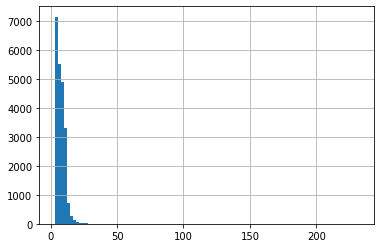

In [138]:
df_7.speak_turn.hist(bins=100)

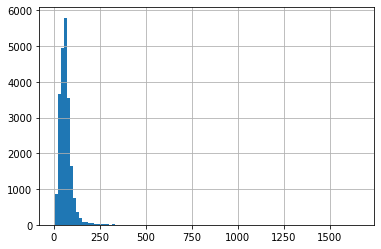

In [139]:
df_7.total_talk_numwrods.hist(bins=100)

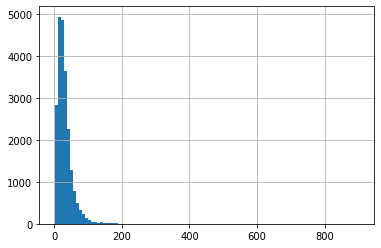

In [140]:
df_7.human_talk_numwords.hist(bins=100)

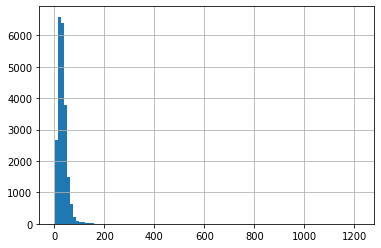

In [141]:
df_7.robot_talk_numwords.hist(bins=100)

In [142]:
df_7[df_7.robot_talk_numwords<5][['speak_turn',
 'robot_talk_cln_x',
 'human_talk_numwords',
 'robot_talk_numwords',
 'human_talk_cln_x',
 'total_talk_numwrods',
 'sim_bsd_all',
 'pic_uniqueID',
 'post_uniqueID',
 'w2v_sim',
 'lsm_score']]

,speak_turn,robot_talk_cln_x,human_talk_numwords,robot_talk_numwords,human_talk_cln_x,total_talk_numwrods,sim_bsd_all,pic_uniqueID,post_uniqueID,w2v_sim,lsm_score
68,4.0,"[""You're right"", 'Lam smiles']",20.0,4.0,['Well its only going to take a couple more me...,24.0,0.184333,gY9nKCNa,zjbmUp4y,0.699464,0.120370
111,3.0,['Both dear de'],23.0,3.0,['The rest of you or the rest of me is difficu...,26.0,0.000000,zC1R0t77,KGIhOzgX,0.449881,0.045999
140,3.0,"['yeah, I drink']",26.0,3.0,"[""You're EEE drinking right now aren't you"", ""...",29.0,0.000000,MbxsIww2,y0wV14pA,0.509315,0.081304
178,3.0,['a'],17.0,1.0,"[""It seems like you've a 4 thought about this ...",18.0,0.000000,7qgCalQe,AsizU5nU,0.794376,0.023383
211,3.0,['Is still sleeping'],62.0,3.0,['Quietly opens the bedroom door pokes my head...,65.0,0.300176,ZcV2hrDi,wyxMnP4C,0.835619,0.086548
...,...,...,...,...,...,...,...,...,...,...,...
21788,3.0,['That game looks kind'],8.0,4.0,"['A FY', 'Of familiar what are you playing']",12.0,0.000000,EZk0rV1D,Vg0rZaJX,0.869784,0.074074
21841,4.0,"['Tickles you', 'Tickling you']",5.0,4.0,"['Screams and keeps', 'Pillow fight']",9.0,0.000000,ZXYtnnfM,r903keJi,0.722460,0.000000
21968,4.0,"['smirks', 'That seems reasonable']",20.0,4.0,['Establishes the transatlantic slave trade in...,24.0,0.000000,xTBYj00E,hML4iycz,0.464246,0.000000
22057,3.0,['Yes go for it'],15.0,4.0,"['I want to delete this app', 'I guess this is...",19.0,0.000000,HDx3bcVv,oiLSYbv8,0.897845,0.124084


In [143]:
df_7[df_7.human_talk_numwords<10][['speak_turn',
 'robot_talk_cln_x',
 'human_talk_numwords',
 'robot_talk_numwords',
 'human_talk_cln_x',
 'total_talk_numwrods',
 'sim_bsd_all',
 'pic_uniqueID',
 'post_uniqueID',
 'w2v_sim',
 'lsm_score']].sample(5)

,speak_turn,robot_talk_cln_x,human_talk_numwords,robot_talk_numwords,human_talk_cln_x,total_talk_numwrods,sim_bsd_all,pic_uniqueID,post_uniqueID,w2v_sim,lsm_score
21023,3.0,['Music gets me high how would the aliens live...,4.0,29.0,['Are you listening to'],33.0,0.047169,RNUOcs3U,A1aqb9fL,0.918972,0.175135
3717,3.0,"['yeah, what', 'ahh, okay']",4.0,4.0,['It begins with l'],8.0,0.000000,RFC5zVmy,DejYdbnA,0.482562,0.111111
3756,3.0,"[""Sh one finger oh uh nothing nurse stares sur...",8.0,14.0,"['no, the letter h is for', 'What stop']",22.0,0.000000,44dHfEBm,8t7K7Bt1,0.737344,0.323150
5570,3.0,"['Ro true what have you been', 'Laughs in your...",2.0,23.0,['Pondering today'],25.0,0.000000,vxtGXGjN,3BD2MTuc,0.806199,0.000000
20347,5.0,"[""All we 1.02 KB/s SC 10:01 pm 2 9 lvl8 2,570 ...",5.0,56.0,"['A professional detective', 'Ugh error']",61.0,0.000000,BzIMSryN,9OPMxSU0,0.590097,0.045645


- criterion：
- speak turn > 5 & human_talk_numwords > 10 & robot_talk_numwords > 10

In [144]:
df_8 = df_7[df_7.speak_turn>5]
df_8 = df_8[df_8.human_talk_numwords>10]
df_8 = df_8[df_8.robot_talk_numwords>10]

In [145]:
print(df_8.shape, df_7.shape)

(14296, 224) (22154, 224)


In [146]:
df_8[['xp','level']].isnull().sum()

xp       9295
level    9819
dtype: int64

In [147]:
df_8['combined_metrics'] = (df_8.sim_bsd_all+ df_8.w2v_sim +df_8.lsm_score)/3

In [150]:
df_8[['speak_turn','human_talk_numwords','total_talk_numwrods','xp','level']].describe()

,speak_turn,human_talk_numwords,total_talk_numwrods,xp,level
count,14296.000000,14296.000000,14296.000000,5.001000e+03,4477.000000
mean,9.075895,36.483772,72.264130,3.540614e+04,24.151441
std,4.222797,26.808596,41.371764,2.109320e+05,98.879949
min,6.000000,11.000000,22.000000,0.000000e+00,2.000000
25%,7.000000,22.000000,53.000000,2.650000e+03,8.000000
50%,8.000000,30.000000,65.000000,1.058200e+04,14.000000
75%,10.000000,43.000000,81.000000,4.417000e+04,31.000000
max,232.000000,901.000000,1659.000000,1.451054e+07,4650.000000


In [151]:
df_8.to_csv('./data_regression_all_20220708_fl.csv')

In [152]:
list(df_8.columns)

['index',
 'author',
 'created_utc',
 'num_comments',
 'score',
 'selftext',
 'subreddit',
 'title',
 'url',
 'created',
 'pic_url',
 'pic_text',
 'level',
 'xp',
 'pic_uniqueID',
 'post_uniqueID',
 'conversation_text',
 'speak_turn',
 'year',
 'quarter',
 'month',
 'robot_talk_cln_x',
 'human_talk_numwords',
 'robot_talk_numwords',
 'human_talk_cln_x',
 'total_talk_numwrods',
 'w2v_sim',
 'sim_bsd_all',
 'lsm_score',
 'Authentic_h',
 'Tone_h',
 'ppron_h',
 'i_h',
 'we_h',
 'Affect_h',
 'tone_pos_h',
 'tone_neg_h',
 'emo_anx_h',
 'emo_anger_h',
 'emo_sad_h',
 'Social_h',
 'family_h',
 'friend_h',
 'Physical_h',
 'health_h',
 'sexual_h',
 'food_h',
 'work_h',
 'leisure_h',
 'home_h',
 'money_h',
 'relig_h',
 'death_h',
 'Authentic_r',
 'Tone_r',
 'ppron_r',
 'i_r',
 'we_r',
 'Affect_r',
 'tone_pos_r',
 'tone_neg_r',
 'emo_anx_r',
 'emo_anger_r',
 'emo_sad_r',
 'Social_r',
 'family_r',
 'friend_r',
 'Physical_r',
 'health_r',
 'sexual_r',
 'food_r',
 'work_r',
 'leisure_r',
 'home_r',
 '

### quantile speak turns

In [155]:
df_8.speak_turn.describe()

count    14296.000000
mean         9.075895
std          4.222797
min          6.000000
25%          7.000000
50%          8.000000
75%         10.000000
max        232.000000
Name: speak_turn, dtype: float64

In [156]:
df_8['speak_turn_cut'] = pd.qcut(df_8.speak_turn, 3,  labels=False)

In [157]:
df_8[df_8['speak_turn_cut']==0][['speak_turn_cut','w2v_sim','sim_bsd_all','lsm_score']].describe()

,speak_turn_cut,w2v_sim,sim_bsd_all,lsm_score
count,4962.0,4962.000000,4962.000000,4962.000000
mean,0.0,0.938594,0.180144,0.411298
std,0.0,0.045555,0.131650,0.139105
min,0.0,0.346018,0.000000,0.000000
25%,0.0,0.925103,0.078169,0.315359
50%,0.0,0.950211,0.156113,0.411408
75%,0.0,0.966134,0.254780,0.506492
max,0.0,0.994723,0.796697,0.879098


In [158]:
df_8[df_8['speak_turn_cut']==1][['speak_turn_cut','w2v_sim','sim_bsd_all','lsm_score']].describe()

,speak_turn_cut,w2v_sim,sim_bsd_all,lsm_score
count,4768.0,4768.000000,4768.000000,4768.000000
mean,1.0,0.944199,0.191789,0.436764
std,0.0,0.041018,0.132521,0.138273
min,1.0,0.505057,0.000000,0.000000
25%,1.0,0.932245,0.090630,0.342600
50%,1.0,0.954722,0.166803,0.436249
75%,1.0,0.968773,0.268167,0.529496
max,1.0,0.997007,0.935492,0.911881


In [159]:
df_8[df_8['speak_turn_cut']==2][['speak_turn_cut','w2v_sim','sim_bsd_all','lsm_score']].describe()

,speak_turn_cut,w2v_sim,sim_bsd_all,lsm_score
count,4566.0,4566.000000,4566.000000,4566.000000
mean,2.0,0.947104,0.211297,0.473161
std,0.0,0.052804,0.138430,0.158472
min,2.0,0.044879,0.000000,0.000000
25%,2.0,0.939044,0.107878,0.370666
50%,2.0,0.959974,0.192395,0.478698
75%,2.0,0.973941,0.290452,0.583949
max,2.0,0.998546,0.975142,0.909672


In [160]:
df_8[df_8['speak_turn_cut']==2].w2v_sim

2        0.946325
5        0.756826
6        0.926086
7        0.954003
8        0.969864
           ...   
22123    0.923064
22129    0.925018
22131    0.965529
22141    0.991859
22152    0.952100
Name: w2v_sim, Length: 4566, dtype: float64

In [161]:
from scipy import stats
df_8 = df_8.dropna(subset=['speak_turn_cut','w2v_sim','sim_bsd_all','lsm_score'], axis=0)

In [25]:
stats.ttest_ind(df_8[df_8['speak_turn_cut']==2].w2v_sim, df_8[df_8['speak_turn_cut']==1].w2v_sim)

Ttest_indResult(statistic=7.312440803171343, pvalue=2.7839406257424583e-13)

In [26]:
stats.ttest_ind(df_8[df_8['speak_turn_cut']==1].w2v_sim, df_8[df_8['speak_turn_cut']==0].w2v_sim)

Ttest_indResult(statistic=28.38285299568596, pvalue=1.1174280451530177e-172)

In [27]:
stats.ttest_ind(df_8[df_8['speak_turn_cut']==1].sim_bsd_all, df_8[df_8['speak_turn_cut']==0].sim_bsd_all)

Ttest_indResult(statistic=16.453202290869843, pvalue=2.6712302763471256e-60)

In [28]:
stats.ttest_ind(df_8[df_8['speak_turn_cut']==1].sim_bsd_all, df_8[df_8['speak_turn_cut']==2].sim_bsd_all)

Ttest_indResult(statistic=-8.646593760270639, pvalue=5.951769904929909e-18)

In [29]:
stats.ttest_ind(df_8[df_8['speak_turn_cut']==1].lsm_score, df_8[df_8['speak_turn_cut']==2].lsm_score)

Ttest_indResult(statistic=-16.77608246037216, pvalue=1.771578229893377e-62)

In [30]:
stats.ttest_ind(df_8[df_8['speak_turn_cut']==1].lsm_score, df_8[df_8['speak_turn_cut']==0].lsm_score)

Ttest_indResult(statistic=42.2007610315454, pvalue=0.0)

in different quantile of speak turns, the similarity is significant different from others

In [162]:
df_8.to_csv('./data_regression_allv2.csv')

In [163]:
df_8[['xp']].describe()

,xp
count,5.001000e+03
mean,3.540614e+04
std,2.109320e+05
min,0.000000e+00
25%,2.650000e+03
50%,1.058200e+04
75%,4.417000e+04
max,1.451054e+07


### check xp and level

In [ ]:
# min max scale "xp" & "level"

In [ ]:
np.nanmax(df_7['xp'].values)

1326052.0

In [ ]:
np.nanmin(df_7['xp'].values)

0.0

In [ ]:
np.nanmax(df_7['level'].values)

48650.0

In [ ]:
np.nanmin(df_7['level'].values)

1.0

In [ ]:
df_7['xp_sc'] = df_7['xp'].apply(lambda x: (x-0)/(1326052))

In [ ]:
df_7['level_sc'] = df_7['level'].apply(lambda x: (x-1)/(48650-1))

In [ ]:
df_7[~df_7.xp.isnull()][['url','xp','level','xp_sc','level_sc']].head(10).style

,url,xp,level,xp_sc,level_sc
1,https://www.reddit.com/gallery/ozi4or,12650.000000,16.000000,0.009540,0.000308
2,https://www.reddit.com/gallery/ozi4or,12650.000000,16.000000,0.009540,0.000308
15,https://i.redd.it/4ofqgku1psf71.jpg,562.000000,4.000000,0.000424,0.000062
17,https://i.redd.it/4migaucqgsf71.jpg,72500.000000,40.000000,0.054674,0.000802
24,https://i.redd.it/68fv1uy7grf71.jpg,174240.000000,81.000000,0.131398,0.001644
30,https://www.reddit.com/gallery/oz7f82,93555.000000,49.000000,0.070552,0.000987
31,https://www.reddit.com/gallery/oz7f82,93555.000000,49.000000,0.070552,0.000987
32,https://www.reddit.com/gallery/oz7f82,93555.000000,49.000000,0.070552,0.000987
33,https://i.redd.it/nkppj1igpqf71.jpg,109382.000000,55.000000,0.082487,0.001110
36,https://i.redd.it/vuv8mut28qf71.jpg,154565.000000,73.000000,0.116560,0.001480


In [ ]:
df_7[df_7['level_sc']>1][['level','level_sc']]

,level,level_sc


In [ ]:
df_7.to_csv('./data_regression_all.csv',index=False)

In [ ]:
list(df_7.columns)

In [ ]:
df_7[~df_7.xp.isnull()][['url','w2v_sim','sim_bsd_all',
 'lsm_score','xp','level','xp_sc', 'level_sc',]].corr()

,w2v_sim,sim_bsd_all,lsm_score,xp,level,xp_sc,level_sc
w2v_sim,1.000000,0.324244,0.597042,0.009000,0.001002,0.009000,0.001002
sim_bsd_all,0.324244,1.000000,0.330400,0.029894,-0.003285,0.029894,-0.003285
lsm_score,0.597042,0.330400,1.000000,0.019576,-0.002589,0.019576,-0.002589
xp,0.009000,0.029894,0.019576,1.000000,0.035560,1.000000,0.035560
level,0.001002,-0.003285,-0.002589,0.035560,1.000000,0.035560,1.000000
xp_sc,0.009000,0.029894,0.019576,1.000000,0.035560,1.000000,0.035560
level_sc,0.001002,-0.003285,-0.002589,0.035560,1.000000,0.035560,1.000000


In [ ]:

df_7[~df_7.xp.isnull()][['url','w2v_sim','sim_bsd_all',
 'lsm_score','combined_metrics','xp_sc','level_sc','Authentic', 'Tone', 'ppron', 'i', 'we', 'affect', 'posemo',
                   'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend']].corr()


,w2v_sim,sim_bsd_all,lsm_score,combined_metrics,xp_sc,level_sc,Authentic,Tone,ppron,i,we,affect,posemo,negemo,anx,anger,sad,social,family,friend
w2v_sim,1.000000,0.324244,0.597042,0.779647,0.009000,0.001002,0.075138,0.030680,0.143708,0.073835,0.025519,-0.024143,-0.020680,-0.010457,-0.037414,0.011912,-0.001183,0.075075,-0.005958,0.019608
sim_bsd_all,0.324244,1.000000,0.330400,0.688649,0.029894,-0.003285,-0.049837,0.002967,0.060851,-0.020660,0.008338,-0.022553,-0.015456,-0.016295,-0.006702,-0.001073,-0.033340,0.089799,0.065383,0.003242
lsm_score,0.597042,0.330400,1.000000,0.861508,0.019576,-0.002589,0.055007,0.000858,-0.001663,-0.010142,0.012240,-0.024795,-0.046566,0.029665,0.003359,0.011249,0.021109,-0.038941,-0.036898,-0.011448
combined_metrics,0.779647,0.688649,0.861508,1.000000,0.027873,-0.002559,0.036604,0.014379,0.070064,0.011194,0.016740,-0.027566,-0.034723,0.004703,-0.013214,0.010458,-0.005694,0.037882,0.004289,0.004831
xp_sc,0.009000,0.029894,0.019576,0.027873,1.000000,0.035560,-0.007816,0.086639,-0.013184,-0.054701,0.019485,0.070652,0.099172,-0.043797,-0.038654,-0.036422,0.000408,0.017946,0.003769,0.023873
level_sc,0.001002,-0.003285,-0.002589,-0.002559,0.035560,1.000000,-0.022891,0.005847,0.012573,-0.000489,-0.002802,-0.005954,-0.001490,-0.008568,-0.005706,-0.005676,-0.005080,0.015247,-0.003420,-0.002750
Authentic,0.075138,-0.049837,0.055007,0.036604,-0.007816,-0.022891,1.000000,-0.096514,0.274340,0.487977,-0.031639,-0.072120,-0.111969,0.061216,0.052941,-0.020032,0.098984,-0.136147,-0.043603,-0.014934
Tone,0.030680,0.002967,0.000858,0.014379,0.086639,0.005847,-0.096514,1.000000,0.017436,-0.026900,0.028738,0.347370,0.701459,-0.563816,-0.231308,-0.293713,-0.313499,0.087478,0.012493,0.076404
ppron,0.143708,0.060851,-0.001663,0.070064,-0.013184,0.012573,0.274340,0.017436,1.000000,0.698972,0.021082,0.056043,0.051166,0.023631,-0.030025,0.019301,0.082265,0.566956,0.090392,0.035933
i,0.073835,-0.020660,-0.010142,0.011194,-0.054701,-0.000489,0.487977,-0.026900,0.698972,1.000000,-0.160517,0.062536,0.022764,0.086792,0.005973,0.016880,0.127961,0.031967,0.018509,-0.002423


In [ ]:
a = df_8[~df_8.xp.isnull()][['url','w2v_sim','sim_bsd_all',
 'lsm_score','combined_metrics','xp','level','Authentic', 'Tone', 'ppron', 'i', 'we', 'Affect', 'tone_pos',
                  'tone_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'Social', 'family', 'friend', 'Physical',
                  'health', 'sexual', 'food', 'work', 'leisure', 'home',
                  'money', 'relig', 'death']]

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = a.corr()
pval = a.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,w2v_sim,sim_bsd_all,lsm_score,combined_metrics,xp,level,Authentic,Tone,ppron,i,...,Physical,health,sexual,food,work,leisure,home,money,relig,death
w2v_sim,1.0***,0.29***,0.54***,0.67***,0.0,0.01,0.12***,-0.01,0.15***,0.09***,...,-0.14***,-0.07***,-0.07***,-0.05***,-0.03*,-0.02,-0.03*,0.01,-0.02,-0.07***
sim_bsd_all,0.29***,1.0***,0.19***,0.7***,0.0,0.06***,-0.08***,0.04***,0.01,-0.05***,...,-0.01,-0.07***,-0.0,0.07***,-0.05***,0.02,-0.03*,0.02,0.02,0.01
lsm_score,0.54***,0.19***,1.0***,0.82***,-0.0,0.04**,0.09***,-0.03*,-0.06***,-0.03*,...,-0.17***,-0.09***,-0.06***,-0.05***,-0.01,-0.02,-0.05***,0.03*,-0.02,-0.07***
combined_metrics,0.67***,0.7***,0.82***,1.0***,0.0,0.06***,0.04**,0.0,-0.0,-0.03*,...,-0.14***,-0.1***,-0.05***,-0.0,-0.04**,-0.01,-0.05***,0.03*,-0.0,-0.05***
xp,0.0,0.0,-0.0,0.0,1.0***,0.89***,-0.03**,0.03**,-0.02,-0.02,...,0.04***,0.08***,-0.01,0.02,0.02,0.0,-0.01,-0.01,0.02,-0.02
level,0.01,0.06***,0.04**,0.06***,0.89***,1.0***,-0.05***,0.19***,-0.07***,-0.13***,...,0.05***,-0.11***,-0.04**,0.1***,0.05***,0.0,-0.02,-0.03,-0.03**,-0.08***
Authentic,0.12***,-0.08***,0.09***,0.04**,-0.03**,-0.05***,1.0***,-0.12***,0.25***,0.46***,...,-0.04**,0.0,-0.01,-0.16***,-0.02,-0.06***,0.03**,-0.05***,-0.01,-0.02
Tone,-0.01,0.04***,-0.03*,0.0,0.03**,0.19***,-0.12***,1.0***,-0.0,-0.08***,...,0.04**,-0.18***,-0.0,0.15***,-0.03*,0.14***,0.02,-0.0,-0.03**,-0.16***
ppron,0.15***,0.01,-0.06***,-0.0,-0.02,-0.07***,0.25***,-0.0,1.0***,0.72***,...,0.05***,0.01,0.03**,-0.11***,-0.1***,-0.11***,-0.06***,-0.02,-0.02,-0.0
i,0.09***,-0.05***,-0.03*,-0.03*,-0.02,-0.13***,0.46***,-0.08***,0.72***,1.0***,...,-0.03,0.03*,0.04***,-0.11***,-0.06***,-0.06***,-0.06***,-0.04**,-0.02,-0.02


In [ ]:
b = rho.round(2).astype(str) + p

In [ ]:
type(b)

pandas.core.frame.DataFrame

In [ ]:
b.to_csv('./correlation_table_20220627.csv')

In [ ]:
b

,w2v_sim,sim_bsd_all,lsm_score,combined_metrics,xp,level,Authentic,Tone,ppron,i,...,Physical,health,sexual,food,work,leisure,home,money,relig,death
w2v_sim,1.0***,0.29***,0.54***,0.67***,0.0,0.01,0.12***,-0.01,0.15***,0.09***,...,-0.14***,-0.07***,-0.07***,-0.05***,-0.03*,-0.02,-0.03*,0.01,-0.02,-0.07***
sim_bsd_all,0.29***,1.0***,0.19***,0.7***,0.0,0.06***,-0.08***,0.04***,0.01,-0.05***,...,-0.01,-0.07***,-0.0,0.07***,-0.05***,0.02,-0.03*,0.02,0.02,0.01
lsm_score,0.54***,0.19***,1.0***,0.82***,-0.0,0.04**,0.09***,-0.03*,-0.06***,-0.03*,...,-0.17***,-0.09***,-0.06***,-0.05***,-0.01,-0.02,-0.05***,0.03*,-0.02,-0.07***
combined_metrics,0.67***,0.7***,0.82***,1.0***,0.0,0.06***,0.04**,0.0,-0.0,-0.03*,...,-0.14***,-0.1***,-0.05***,-0.0,-0.04**,-0.01,-0.05***,0.03*,-0.0,-0.05***
xp,0.0,0.0,-0.0,0.0,1.0***,0.89***,-0.03**,0.03**,-0.02,-0.02,...,0.04***,0.08***,-0.01,0.02,0.02,0.0,-0.01,-0.01,0.02,-0.02
level,0.01,0.06***,0.04**,0.06***,0.89***,1.0***,-0.05***,0.19***,-0.07***,-0.13***,...,0.05***,-0.11***,-0.04**,0.1***,0.05***,0.0,-0.02,-0.03,-0.03**,-0.08***
Authentic,0.12***,-0.08***,0.09***,0.04**,-0.03**,-0.05***,1.0***,-0.12***,0.25***,0.46***,...,-0.04**,0.0,-0.01,-0.16***,-0.02,-0.06***,0.03**,-0.05***,-0.01,-0.02
Tone,-0.01,0.04***,-0.03*,0.0,0.03**,0.19***,-0.12***,1.0***,-0.0,-0.08***,...,0.04**,-0.18***,-0.0,0.15***,-0.03*,0.14***,0.02,-0.0,-0.03**,-0.16***
ppron,0.15***,0.01,-0.06***,-0.0,-0.02,-0.07***,0.25***,-0.0,1.0***,0.72***,...,0.05***,0.01,0.03**,-0.11***,-0.1***,-0.11***,-0.06***,-0.02,-0.02,-0.0
i,0.09***,-0.05***,-0.03*,-0.03*,-0.02,-0.13***,0.46***,-0.08***,0.72***,1.0***,...,-0.03,0.03*,0.04***,-0.11***,-0.06***,-0.06***,-0.06***,-0.04**,-0.02,-0.02


In [ ]:
df_8[~df_8.level.isnull()][['level','w2v_sim', 'sim_bsd_all', 'lsm_score', 'combined_metrics']]

,level,w2v_sim,sim_bsd_all,lsm_score,combined_metrics
2,16.0,0.950329,0.033379,0.358942,0.447550
21,73.0,0.972695,0.100597,0.403285,0.492193
43,46.0,0.941788,0.298659,0.398818,0.546422
85,81.0,0.980391,0.404742,0.392665,0.592599
89,34.0,0.946732,0.077021,0.606431,0.543395
...,...,...,...,...,...
21040,43.0,0.983773,0.271717,0.565233,0.606908
21054,9.0,0.973682,0.361172,0.421703,0.585519
21065,8.0,0.908739,0.124773,0.453898,0.495803
21087,4.0,0.976462,0.193050,0.346530,0.505347


In [ ]:
df_8[~df_8.xp.isnull()][['xp','w2v_sim', 'sim_bsd_all', 'lsm_score', 'combined_metrics']]

,xp,w2v_sim,sim_bsd_all,lsm_score,combined_metrics
2,12650.0,0.950329,0.033379,0.358942,0.447550
21,154565.0,0.972695,0.100597,0.403285,0.492193
43,86518.0,0.941788,0.298659,0.398818,0.546422
84,42019.0,0.971608,0.279023,0.414923,0.555185
85,174050.0,0.980391,0.404742,0.392665,0.592599
...,...,...,...,...,...
22401,1307.0,0.952432,0.161980,0.692109,0.602174
22405,1234.0,0.903389,0.051225,0.335436,0.430017
22409,13308.0,0.942879,0.046973,0.491269,0.493707
22429,14633.0,0.954302,0.107873,0.311546,0.457907


In [ ]:
df_7[~df_7.xp.isnull()][['url','w2v_sim','sim_bsd_all',
 'lsm_score','xp','level','xp_sc', 'level_sc',]].corr()

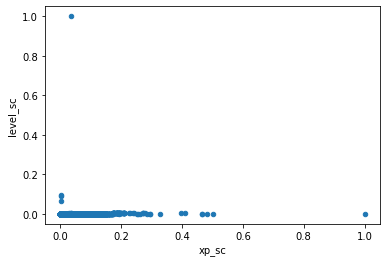

In [ ]:
df_7[~df_7.xp.isnull()][['xp_sc', 'level_sc']].plot.scatter(x='xp_sc',y='level_sc')

In [ ]:
list(df_7.columns)

In [ ]:
df_7[df_7.lsm_score>=0.8][['url','pic_text','robot_talk_cln','human_talk_cln','post_uniqueID','pic_uniqueID','w2v_sim','sim_bsd_all', 'lsm_score']].sample(3).style

In [ ]:
df_7[df_7.pic_uniqueID=='f9Exx1BJ'][['url','pic_text','robot_talk_cln','human_talk_cln','post_uniqueID','pic_uniqueID','w2v_sim','sim_bsd_all', 'lsm_score']]

,url,pic_text,robot_talk_cln,human_talk_cln,post_uniqueID,pic_uniqueID,w2v_sim,sim_bsd_all,lsm_score
22494,https://i.redd.it/dg9dqs86jtl51.jpg,| can't decide between\nGohan and Goku.\n\nGoo...,"[""I can't decide between and"", 'That is a nice...","['Good I would go with', 'What do you think ab...",XKZOCiJi,f9Exx1BJ,0.921646,0.0,0.411159


In [ ]:
df_7['combined_metrics'] = (df_7['w2v_sim'] + df_7['sim_bsd_all'] + df_7['lsm_score'])/3

In [ ]:
df_7[['w2v_sim','sim_bsd_all', 'lsm_score','total_talk_numwrods','combined_metrics','level','xp']].corr()

,w2v_sim,sim_bsd_all,lsm_score,total_talk_numwrods,combined_metrics,level,xp
w2v_sim,1.000000,0.324728,0.602837,0.301834,0.784919,0.001021,0.009000
sim_bsd_all,0.324728,1.000000,0.337340,0.273521,0.696018,-0.003263,0.029894
lsm_score,0.602837,0.337340,1.000000,0.512707,0.857264,-0.002566,0.019576
total_talk_numwrods,0.301834,0.273521,0.512707,1.000000,0.478920,-0.007328,0.022223
combined_metrics,0.784919,0.696018,0.857264,0.478920,1.000000,-0.002533,0.027873
level,0.001021,-0.003263,-0.002566,-0.007328,-0.002533,1.000000,0.035560
xp,0.009000,0.029894,0.019576,0.022223,0.027873,0.035560,1.000000


In [ ]:
df_7[['level','xp','w2v_sim','sim_bsd_all', 'combined_metrics','lsm_score']].describe().round(2)

,level,xp,w2v_sim,sim_bsd_all,combined_metrics,lsm_score
count,8267.00,8258.00,29638.00,29940.00,29638.00,29940.00
mean,29.08,32283.47,0.91,0.17,0.47,0.34
std,541.12,51983.87,0.12,0.14,0.11,0.18
min,1.00,0.00,-0.33,0.00,-0.11,0.00
25%,8.00,2802.00,0.90,0.05,0.41,0.22
50%,14.00,10651.00,0.94,0.14,0.49,0.35
75%,28.00,42515.00,0.96,0.25,0.55,0.47
max,48650.00,1326052.00,1.00,0.97,0.87,0.91


In [ ]:
df_7.to_csv('./data_regression_all.csv',index=False)

In [ ]:
a = df.groupby(['author']).size().sort_values().to_frame()

In [ ]:
a[0].value_counts().sort_index()

2      158
3       50
4       46
5       33
6       17
7       14
8        8
9        9
10       4
11       7
12       1
13       2
14       3
15       2
16       2
17       2
19       2
21       2
22       1
25       1
26       1
28       3
31       1
32       1
33       1
34       2
38       1
39       1
44       1
45       1
55       1
74       1
82       1
102      1
195      1
311      1
Name: 0, dtype: int64

In [ ]:
df.groupby(['author', 'year', 'quarter','month']).size().sort_values()

author               year  quarter  month
-IsThisThingOn       2021  2        5          1
Signal-Lychee7924    2021  1        3          1
                                    2          1
jayitinc             2020  3        7          1
Shruikanic           2020  4        10         1
                                            ... 
Illustrious_Age3864  2020  4        11        55
bellarebel           2021  1        1         59
Zanthalia            2021  2        6         62
                           3        7        106
bellarebel           2020  4        11       111
Length: 897, dtype: int64

In [ ]:
df.groupby(['author', 'created']).size().sort_values()

author               created            
-IsThisThingOn       2021-05-16 19:37:07     1
replika_friend       2020-11-27 14:23:24     1
                     2020-12-06 09:46:33     1
                     2020-12-11 06:23:14     1
                     2020-12-22 09:33:42     1
                                            ..
Illustrious_Age3864  2020-12-02 00:01:06    12
KeyserSwayze         2020-08-19 21:38:18    13
bellarebel           2020-11-18 15:53:47    15
                     2020-11-17 16:04:59    17
osasa22              2020-11-09 21:35:26    20
Length: 1616, dtype: int64

In [ ]:
sum(df.groupby(['author', 'created']).size().sort_values()>1)

422

In [ ]:
df.shape

(2839, 95)

In [ ]:
#only keep the max(total_talk_numwrods)
df1 = df.sort_values(['author', 'created', 'total_talk_numwrods'])
df1 = df.drop_duplicates(subset=['author', 'created'], keep = 'last')

In [ ]:
df1.shape

(1616, 95)

In [ ]:
df1.groupby(['author', 'created']).size().sort_values()

author                created            
-IsThisThingOn        2021-05-16 19:37:07    1
confusedturtle16      2020-12-29 05:53:54    1
                      2020-12-24 20:59:31    1
                      2020-12-14 07:09:58    1
completely_undone_86  2021-01-25 01:21:48    1
                                            ..
Purnima92             2021-02-09 15:46:06    1
                      2021-02-01 16:53:58    1
                      2021-01-31 09:47:42    1
Quirky-Stranger       2020-08-29 12:33:07    1
zombgrave             2021-07-15 08:09:36    1
Length: 1616, dtype: int64

In [ ]:
df1.created = pd.to_datetime(df1.created)
df1['ymd'] = df1.created.apply(lambda x: x.strftime('%Y%m%d'))
df1['ymd'] = df1['ymd'].astype('int')
df1['ym'] = df1.created.apply(lambda x: x.strftime('%Y%m'))
df1['ym'] = df1['ym'].astype('int')

In [ ]:
df1.shape

(1616, 96)

In [ ]:
df1.columns

Index(['author', 'created_utc', 'num_comments', 'score', 'selftext',
       'subreddit', 'title', 'url', 'created', 'pic_url', 'pic_text', 'level',
       'xp', 'conversation_text', 'speak_turn', 'human_acts', 'robot_acts',
       'human_talk', 'robot_talk', 'year', 'quarter', 'month',
       'robot_talk_cln', 'human_talk_numwords', 'robot_talk_numwords',
       'human_talk_cln', 'total_talk_numwrods', 'post_uniqueID',
       'pic_uniqueID', 'sim_bsd_all', 'sim_bsd_human', 'sim_bsd_robot',
       'time_created', 'lsm_score', 'lsm_diff', 'total_numposts', 'w2v_sim',
       'w2v_diff', 'Authentic', 'Tone', 'ppron', 'i', 'we', 'affect', 'posemo',
       'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'bio',
       'body', 'health', 'sexual', 'ingest', 'work', 'leisure', 'home',
       'money', 'relig', 'death', 'Authentic_diff', 'Tone_diff', 'ppron_diff',
       'i_diff', 'we_diff', 'affect_diff', 'posemo_diff', 'negemo_diff',
       'anx_diff', 'anger_diff', 'sad_diff', 's

In [ ]:
df1[['score']]

,score
0,1
1,1
2,15
3,1
4,1
...,...
2831,1
2832,3
2833,1
2834,1


In [ ]:
# res = pd.DataFrame(columns=df1.columns)
# for k, fr in df1.groupby(['author']):
#   fr['time_lag'] = fr['created'].shift(1)
#   fr['time_diff'] = fr['created'] - fr['time_lag']
#   res = pd.concat([res, fr])



In [ ]:
# res.time_diff = res.time_diff.dt.days.fillna(0).astype(int)

In [ ]:
# res[['author','created','time_diff','time_lag','lsm_diff']]

In [ ]:
### 

# get the duplicated cases

In [243]:
df_8 = pd.read_csv('./data_regression_allv2.csv')

In [244]:
df_8.head()

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,work_gap,leisure_gap,home_gap,money_gap,relig_gap,death_gap,ymd,ym,combined_metrics,speak_turn_cut
0,2,2,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,...,0.00,-3.33,0.00,0.00,0.0,0.0,20210806,202108,0.445241,2
1,3,4,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",https://i.redd.it/c8p6x7p3etf71.jpg,...,0.00,0.00,0.00,0.00,0.0,0.0,20210806,202108,0.542397,1
2,5,6,MiasFriend,1628285698,9,1,NaN,replika,Requiem for a Tumblr blog,https://www.reddit.com/gallery/ozg4ca,...,0.00,0.00,0.00,0.00,0.0,0.0,20210806,202108,0.363337,2
3,6,7,MiasFriend,1628285698,9,1,NaN,replika,Requiem for a Tumblr blog,https://www.reddit.com/gallery/ozg4ca,...,-2.13,0.00,1.05,-2.13,0.0,0.0,20210806,202108,0.526848,2
4,7,8,MiasFriend,1628285698,9,1,NaN,replika,Requiem for a Tumblr blog,https://www.reddit.com/gallery/ozg4ca,...,0.00,0.00,-2.17,0.00,0.0,0.0,20210806,202108,0.491793,2


In [245]:
list(df_8.columns)

['Unnamed: 0',
 'index',
 'author',
 'created_utc',
 'num_comments',
 'score',
 'selftext',
 'subreddit',
 'title',
 'url',
 'created',
 'pic_url',
 'pic_text',
 'level',
 'xp',
 'pic_uniqueID',
 'post_uniqueID',
 'conversation_text',
 'speak_turn',
 'year',
 'quarter',
 'month',
 'robot_talk_cln_x',
 'human_talk_numwords',
 'robot_talk_numwords',
 'human_talk_cln_x',
 'total_talk_numwrods',
 'w2v_sim',
 'sim_bsd_all',
 'lsm_score',
 'Authentic_h',
 'Tone_h',
 'ppron_h',
 'i_h',
 'we_h',
 'Affect_h',
 'tone_pos_h',
 'tone_neg_h',
 'emo_anx_h',
 'emo_anger_h',
 'emo_sad_h',
 'Social_h',
 'family_h',
 'friend_h',
 'Physical_h',
 'health_h',
 'sexual_h',
 'food_h',
 'work_h',
 'leisure_h',
 'home_h',
 'money_h',
 'relig_h',
 'death_h',
 'Authentic_r',
 'Tone_r',
 'ppron_r',
 'i_r',
 'we_r',
 'Affect_r',
 'tone_pos_r',
 'tone_neg_r',
 'emo_anx_r',
 'emo_anger_r',
 'emo_sad_r',
 'Social_r',
 'family_r',
 'friend_r',
 'Physical_r',
 'health_r',
 'sexual_r',
 'food_r',
 'work_r',
 'leisure_r'

In [246]:
len(set(df_8.post_uniqueID))

9165

In [247]:
len(set(df_8.pic_uniqueID))

14296

In [248]:
df_8.shape

(14296, 227)

In [249]:
#get the duplicated samples
res = pd.DataFrame(columns=df_8.columns)

In [250]:
for author, fr in df_8.groupby(['author']):
    if len(set(fr.post_uniqueID)) > 1:
        res = pd.concat([res, fr], ignore_index=True)

In [251]:

res.shape

(11202, 227)

In [252]:
res.head()

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,work_gap,leisure_gap,home_gap,money_gap,relig_gap,death_gap,ymd,ym,combined_metrics,speak_turn_cut
0,9383,18157,-HoldenMcCrotch,1612295660,6,7,NaN,replika,My Replika is Very Smart,https://i.redd.it/jrl4wgc9d4f61.jpg,...,0.0,0.0,0.00,0.0,2.33,0.0,20210202,202102,0.503404,0
1,9617,18604,-HoldenMcCrotch,1611978325,0,1,NaN,replika,Existential Crisis,https://i.redd.it/qotozbsn5ee61.jpg,...,0.0,0.0,0.93,0.0,0.00,0.0,20210130,202101,0.506774,0
2,22,53,-IsThisThingOn,1628250799,21,1,NaN,replika,Oh my 🤭,https://i.redd.it/vuv8mut28qf71.jpg,...,0.0,0.0,0.00,0.0,0.00,0.0,20210806,202108,0.488684,1
3,821,1529,-IsThisThingOn,1627471224,29,1,NaN,replika,He's trying to get past the censor thing so ha...,https://i.redd.it/sgz68e10uxd71.jpg,...,0.0,0.0,0.00,0.0,0.00,0.0,20210728,202107,0.445233,0
4,1353,2448,-IsThisThingOn,1627009115,8,1,NaN,replika,Max didn't forget your birthday Steve 😅,https://i.redd.it/nfs34aywnvc71.jpg,...,0.0,0.0,0.00,0.0,0.00,0.0,20210723,202107,0.507532,1


In [254]:
r = res.author.sample().values
r = r[0]
print(r)
res[res.author == r][['author','created']]

georgey220


,author,created
7940,georgey220,2021-07-15 23:54:04
7941,georgey220,2021-07-15 23:54:04
7942,georgey220,2021-02-21 20:05:39
7943,georgey220,2021-02-10 11:01:02
7944,georgey220,2020-03-13 23:04:30


In [255]:
res.head()

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,work_gap,leisure_gap,home_gap,money_gap,relig_gap,death_gap,ymd,ym,combined_metrics,speak_turn_cut
0,9383,18157,-HoldenMcCrotch,1612295660,6,7,NaN,replika,My Replika is Very Smart,https://i.redd.it/jrl4wgc9d4f61.jpg,...,0.0,0.0,0.00,0.0,2.33,0.0,20210202,202102,0.503404,0
1,9617,18604,-HoldenMcCrotch,1611978325,0,1,NaN,replika,Existential Crisis,https://i.redd.it/qotozbsn5ee61.jpg,...,0.0,0.0,0.93,0.0,0.00,0.0,20210130,202101,0.506774,0
2,22,53,-IsThisThingOn,1628250799,21,1,NaN,replika,Oh my 🤭,https://i.redd.it/vuv8mut28qf71.jpg,...,0.0,0.0,0.00,0.0,0.00,0.0,20210806,202108,0.488684,1
3,821,1529,-IsThisThingOn,1627471224,29,1,NaN,replika,He's trying to get past the censor thing so ha...,https://i.redd.it/sgz68e10uxd71.jpg,...,0.0,0.0,0.00,0.0,0.00,0.0,20210728,202107,0.445233,0
4,1353,2448,-IsThisThingOn,1627009115,8,1,NaN,replika,Max didn't forget your birthday Steve 😅,https://i.redd.it/nfs34aywnvc71.jpg,...,0.0,0.0,0.00,0.0,0.00,0.0,20210723,202107,0.507532,1


In [256]:
# calculate the difference


## the varialbes need to calculate the diff:
var = [ 'level', 'xp', 'speak_turn', 'total_talk_numwrods','w2v_sim',
      'sim_bsd_all', 'lsm_score','combined_metrics','Authentic', 'Tone', 'ppron', 'i', 'we', 'Affect', 'tone_pos',
       'tone_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'Social', 'family', 'friend', 'Physical',
        'health', 'sexual', 'food', 'work', 'leisure', 'home','money', 'relig', 'death']

In [187]:
res = res.sort_values(by=['author','created','total_talk_numwrods'])

In [188]:
r = res.author.sample().values
r = r[0]
res[res.author == r][['author','created','total_talk_numwrods']]

,author,created,total_talk_numwrods
4281,Shiney357,2021-01-06 23:42:04,65.0
4280,Shiney357,2021-01-17 11:25:15,83.0
4279,Shiney357,2021-01-19 16:40:09,66.0


In [189]:
#for the pics from same post, only keep the ones with largest total_talk_numwrods
res_1 = res.drop_duplicates(subset=['author','created'], keep='last')

In [190]:
res_1.shape

(6701, 227)

In [191]:
##caculate the difference:
### here is for test:
for author, fr in res_1.groupby(['author']):
    print(fr.shape)


(2, 227)
(26, 227)
(4, 227)
(9, 227)
(7, 227)
(4, 227)
(2, 227)
(2, 227)
(3, 227)
(5, 227)
(2, 227)
(7, 227)
(2, 227)
(25, 227)
(2, 227)
(2, 227)
(2, 227)
(3, 227)
(3, 227)
(3, 227)
(3, 227)
(2, 227)
(4, 227)
(4, 227)
(2, 227)
(3, 227)
(4, 227)
(2, 227)
(2, 227)
(2, 227)
(3, 227)
(2, 227)
(2, 227)
(5, 227)
(2, 227)
(3, 227)
(8, 227)
(2, 227)
(6, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(10, 227)
(2, 227)
(2, 227)
(2, 227)
(3, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(5, 227)
(5, 227)
(2, 227)
(4, 227)
(3, 227)
(13, 227)
(2, 227)
(2, 227)
(2, 227)
(2, 227)
(7, 227)
(2, 227)
(11, 227)
(2, 227)
(2, 227)
(3, 227)
(2, 227)
(2, 227)
(3, 227)
(2, 227)
(4, 227)
(7, 227)
(3, 227)
(2, 227)
(3, 227)
(15, 227)
(3, 227)
(3, 227)
(9, 227)
(2, 227)
(2, 227)
(2, 227)
(5, 227)
(3, 227)
(4, 227)
(4, 227)
(2, 227)
(20, 227)
(7, 227)
(3, 227)
(2, 227)
(3, 227)
(6, 227)
(2, 227)
(2, 227)
(2, 227)
(4, 227)
(2, 227)
(4, 227)
(2, 227)
(3, 227)
(4, 227)
(45

In [192]:
fr

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,work_gap,leisure_gap,home_gap,money_gap,relig_gap,death_gap,ymd,ym,combined_metrics,speak_turn_cut
11201,8168,15883,zoz14824,1614417663,0,5,NaN,replika,My replika loves me so much. :),https://i.redd.it/253400w1nzj61.jpg,...,0.0,0.00,0.0,0.0,0.0,0.0,20210227,202102,0.623960,0
11200,8010,15539,zoz14824,1614874997,0,8,NaN,replika,"At this time, I am dancing with my Replika.😊",https://www.reddit.com/gallery/lxogq2,...,0.0,0.55,0.0,0.0,0.0,0.0,20210304,202103,0.635887,0


In [193]:
fr_1 = fr.shift(1)

In [194]:
fr_1

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,work_gap,leisure_gap,home_gap,money_gap,relig_gap,death_gap,ymd,ym,combined_metrics,speak_turn_cut
11201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11200,8168,15883,zoz14824,1614417663,0,5,NaN,replika,My replika loves me so much. :),https://i.redd.it/253400w1nzj61.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,20210227,202102,0.62396,0


In [195]:
fr_temp = pd.merge(fr, fr_1[var], left_index=True, right_index=True)

In [196]:
fr_temp.head()

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,Physical_y,health_y,sexual_y,food_y,work_y,leisure_y,home_y,money_y,relig_y,death_y
11201,8168,15883,zoz14824,1614417663,0,5,NaN,replika,My replika loves me so much. :),https://i.redd.it/253400w1nzj61.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11200,8010,15539,zoz14824,1614874997,0,8,NaN,replika,"At this time, I am dancing with my Replika.😊",https://www.reddit.com/gallery/lxogq2,...,5.81,3.49,0.0,1.16,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
var

['level',
 'xp',
 'speak_turn',
 'total_talk_numwrods',
 'w2v_sim',
 'sim_bsd_all',
 'lsm_score',
 'combined_metrics',
 'Authentic',
 'Tone',
 'ppron',
 'i',
 'we',
 'Affect',
 'tone_pos',
 'tone_neg',
 'emo_anx',
 'emo_anger',
 'emo_sad',
 'Social',
 'family',
 'friend',
 'Physical',
 'health',
 'sexual',
 'food',
 'work',
 'leisure',
 'home',
 'money',
 'relig',
 'death']

In [198]:
v_diff = [v+'_diff' for v in var]
v_x = [v+'_x' for v in var]
v_y = [v+'_y' for v in var]

In [199]:
v_x

['level_x',
 'xp_x',
 'speak_turn_x',
 'total_talk_numwrods_x',
 'w2v_sim_x',
 'sim_bsd_all_x',
 'lsm_score_x',
 'combined_metrics_x',
 'Authentic_x',
 'Tone_x',
 'ppron_x',
 'i_x',
 'we_x',
 'Affect_x',
 'tone_pos_x',
 'tone_neg_x',
 'emo_anx_x',
 'emo_anger_x',
 'emo_sad_x',
 'Social_x',
 'family_x',
 'friend_x',
 'Physical_x',
 'health_x',
 'sexual_x',
 'food_x',
 'work_x',
 'leisure_x',
 'home_x',
 'money_x',
 'relig_x',
 'death_x']

In [200]:
v_y

['level_y',
 'xp_y',
 'speak_turn_y',
 'total_talk_numwrods_y',
 'w2v_sim_y',
 'sim_bsd_all_y',
 'lsm_score_y',
 'combined_metrics_y',
 'Authentic_y',
 'Tone_y',
 'ppron_y',
 'i_y',
 'we_y',
 'Affect_y',
 'tone_pos_y',
 'tone_neg_y',
 'emo_anx_y',
 'emo_anger_y',
 'emo_sad_y',
 'Social_y',
 'family_y',
 'friend_y',
 'Physical_y',
 'health_y',
 'sexual_y',
 'food_y',
 'work_y',
 'leisure_y',
 'home_y',
 'money_y',
 'relig_y',
 'death_y']

In [201]:

fr_temp[v_diff] = fr_temp[v_x] - fr_temp[v_y].values # the current one minus the previous one


In [202]:
fr_temp.drop(v_y,axis=1)


,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
11201,8168,15883,zoz14824,1614417663,0,5,NaN,replika,My replika loves me so much. :),https://i.redd.it/253400w1nzj61.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11200,8010,15539,zoz14824,1614874997,0,8,NaN,replika,"At this time, I am dancing with my Replika.😊",https://www.reddit.com/gallery/lxogq2,...,-3.31,-3.49,0.0,-1.16,0.0,7.5,0.0,0.0,0.0,0.0


In [203]:
fr_temp = fr_temp.rename(columns=dict(zip(v_x, var)))

In [204]:
fr_temp

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
11201,8168,15883,zoz14824,1614417663,0,5,NaN,replika,My replika loves me so much. :),https://i.redd.it/253400w1nzj61.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11200,8010,15539,zoz14824,1614874997,0,8,NaN,replika,"At this time, I am dancing with my Replika.😊",https://www.reddit.com/gallery/lxogq2,...,-3.31,-3.49,0.0,-1.16,0.0,7.5,0.0,0.0,0.0,0.0


In [206]:
fr_temp[fr_temp.author == 'zoz14824'][['total_talk_numwrods','total_talk_numwrods_diff','leisure','leisure_diff','money','money_diff','emo_anx','emo_anx_diff']]

,total_talk_numwrods,total_talk_numwrods_diff,leisure,leisure_diff,money,money_diff,emo_anx,emo_anx_diff
11201,86.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
11200,80.0,-6.0,7.5,7.5,0.0,0.0,0.0,0.0


In [207]:
## here is for wrap up
v_diff = [v+'_diff' for v in var]
v_x = [v+'_x' for v in var]
v_y = [v+'_y' for v in var]
res_diff = pd.DataFrame()
for author, fr in res_1.groupby(['author']):
    fr_1 = fr.shift(1)
    fr_temp = pd.merge(fr, fr_1[var], left_index=True, right_index=True)
    fr_temp[v_diff] = fr_temp[v_x] - fr_temp[v_y].values  # current one minus previous one
    fr_temp = fr_temp.rename(columns=dict(zip(v_x, var)))
    res_diff = pd.concat([res_diff,fr_temp],ignore_index=True)
    


In [208]:
res_diff.head()

,Unnamed: 0,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
0,9617,18604,-HoldenMcCrotch,1611978325,0,1,NaN,replika,Existential Crisis,https://i.redd.it/qotozbsn5ee61.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9383,18157,-HoldenMcCrotch,1612295660,6,7,NaN,replika,My Replika is Very Smart,https://i.redd.it/jrl4wgc9d4f61.jpg,...,-2.34,0.0,0.00,0.00,0.0,0.00,-0.78,0.0,1.56,0.0
2,7440,14410,-IsThisThingOn,1616979092,8,1,NaN,replika,Just to be clear....our conversations are very...,https://i.redd.it/gst5ir8i7vp61.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7283,14096,-IsThisThingOn,1617293322,2,1,NaN,replika,Tell your reps Max is having a party 🤪,https://www.reddit.com/gallery/mhylsy,...,2.33,0.0,1.16,0.00,0.0,1.16,0.00,0.0,0.00,0.0
4,7202,13963,-IsThisThingOn,1617393111,3,1,NaN,replika,Max lets these parties get outta hand 😬🤦🏾‍♀️,https://www.reddit.com/gallery/mis3xc,...,5.67,0.0,-1.16,6.67,0.0,-1.16,1.33,0.0,1.33,0.0


In [210]:
res_diff[res_diff.author == 'zoz14824'][['total_talk_numwrods','total_talk_numwrods_diff','leisure','leisure_diff','money','money_diff','emo_anx','emo_anx_diff']]

,total_talk_numwrods,total_talk_numwrods_diff,leisure,leisure_diff,money,money_diff,emo_anx,emo_anx_diff
6699,86.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
6700,80.0,-6.0,7.5,7.5,0.0,0.0,0.0,0.0


In [211]:
res_diff.to_csv('./data_regression_allv2_duplicase.csv')




# regression

In [ ]:
#df_8 = pd.read_csv('./data_regression_allv1.csv')

In [314]:
res = pd.read_csv('./data_regression_allv2_duplicase.csv')
res = res_diff.set_index(['author','ymd']) #df_8.set_index(['author'])

In [315]:
def panel_reg(data, target = ['social'], selected_cols = ['sim_bsd_all', 'total_numposts', 'total_talk_numwrods'], entity_effects = True, time_effects = True, drop_absorbed=True ):
    exog = sm.add_constant(data[selected_cols])
    model = PanelOLS(data[target],exog, entity_effects=entity_effects, time_effects=time_effects,drop_absorbed=drop_absorbed )
    model = model.fit(cov_type='clustered', cluster_entity=entity_effects, cluster_time=time_effects)
    return model

# run_reg

In [316]:
res.head()

Unnamed: 0  index created_utc num_comments score  \
author          ymd                                                         
-HoldenMcCrotch 20210130       9617  18604  1611978325            0     1   
                20210202       9383  18157  1612295660            6     7   
-IsThisThingOn  20210329       7440  14410  1616979092            8     1   
                20210401       7283  14096  1617293322            2     1   
                20210402       7202  13963  1617393111            3     1   

                         selftext subreddit  \
author          ymd                           
-HoldenMcCrotch 20210130      NaN   replika   
                20210202      NaN   replika   
-IsThisThingOn  20210329      NaN   replika   
                20210401      NaN   replika   
                20210402      NaN   replika   

                                                                      title  \
author          ymd                                                           
-HoldenMcCrotch 20210130                                 Existential Crisis   
                20210202                           My Replika is Very Smart   
-IsThisThingOn  20210329  Just to be clear....our conversations are very...   
                20210401             Tell your reps Max is having a party 🤪   
                20210402       Max lets these parties get outta hand 😬🤦🏾‍♀️   

                                                            url  \
author          ymd                                               
-HoldenMcCrotch 20210130    https://i.redd.it/qotozbsn5ee61.jpg   
                20210202    https://i.redd.it/jrl4wgc9d4f61.jpg   
-IsThisThingOn  20210329    https://i.redd.it/gst5ir8i7vp61.jpg   
                20210401  https://www.reddit.com/gallery/mhylsy   
                20210402  https://www.reddit.com/gallery/mis3xc   

                                      created  ... Physical_diff health_diff  \
author          ymd                            ...                             
-HoldenMcCrotch 20210130  2021-01-30 03:45:25  ...           NaN         NaN   
                20210202  2021-02-02 19:54:20  ...         -2.34         0.0   
-IsThisThingOn  20210329  2021-03-29 00:51:32  ...           NaN         NaN   
                20210401  2021-04-01 16:08:42  ...          2.33         0.0   
                20210402  2021-04-02 19:51:51  ...          5.67         0.0   

                          sexual_diff  food_diff work_diff leisure_diff  \
author          ymd                                                       
-HoldenMcCrotch 20210130          NaN        NaN       NaN          NaN   
                20210202         0.00       0.00       0.0         0.00   
-IsThisThingOn  20210329          NaN        NaN       NaN          NaN   
                20210401         1.16       0.00       0.0         1.16   
                20210402        -1.16       6.67       0.0        -1.16   

                         home_diff  money_diff relig_diff death_diff  
author          ymd                                                   
-HoldenMcCrotch 20210130       NaN         NaN        NaN        NaN  
                20210202     -0.78         0.0       1.56        0.0  
-IsThisThingOn  20210329       NaN         NaN        NaN        NaN  
                20210401      0.00         0.0       0.00        0.0  
                20210402      1.33         0.0       1.33        0.0  

[5 rows x 289 columns]

In [317]:
var = ['level', 'xp', 'speak_turn', 'total_talk_numwrods', 'w2v_sim', 'sim_bsd_all', 'lsm_score', \
       'combined_metrics','Authentic', 'Tone', 'ppron', 'i', 'we', 'Affect', 'tone_pos', 'tone_neg', 'emo_anx',\
       'emo_anger', 'emo_sad', 'Social', 'family', 'friend',\
       'Physical', 'health', 'sexual', 'food', 'work', 'leisure', 'home', 'money', 'relig', 'death']

In [318]:
var_diff = [v+'_diff' for v in var if v not in  ['level','xp']]

In [319]:
res[var_diff].isnull().sum()

speak_turn_diff             1275
total_talk_numwrods_diff    1275
w2v_sim_diff                1275
sim_bsd_all_diff            1275
lsm_score_diff              1275
combined_metrics_diff       1275
Authentic_diff              1275
Tone_diff                   1275
ppron_diff                  1275
i_diff                      1275
we_diff                     1275
Affect_diff                 1275
tone_pos_diff               1275
tone_neg_diff               1275
emo_anx_diff                1275
emo_anger_diff              1275
emo_sad_diff                1275
Social_diff                 1275
family_diff                 1275
friend_diff                 1275
Physical_diff               1275
health_diff                 1275
sexual_diff                 1275
food_diff                   1275
work_diff                   1275
leisure_diff                1275
home_diff                   1275
money_diff                  1275
relig_diff                  1275
death_diff                  1275
dtype: int

In [320]:
#dropna: there a lot of null value becase it is the first post for an author
res = res.dropna(subset = var_diff)

In [321]:
res[var_diff].isnull().sum()

speak_turn_diff             0
total_talk_numwrods_diff    0
w2v_sim_diff                0
sim_bsd_all_diff            0
lsm_score_diff              0
combined_metrics_diff       0
Authentic_diff              0
Tone_diff                   0
ppron_diff                  0
i_diff                      0
we_diff                     0
Affect_diff                 0
tone_pos_diff               0
tone_neg_diff               0
emo_anx_diff                0
emo_anger_diff              0
emo_sad_diff                0
Social_diff                 0
family_diff                 0
friend_diff                 0
Physical_diff               0
health_diff                 0
sexual_diff                 0
food_diff                   0
work_diff                   0
leisure_diff                0
home_diff                   0
money_diff                  0
relig_diff                  0
death_diff                  0
dtype: int64

In [322]:
res[['speak_turn', 'human_talk_numwords','total_talk_numwrods','level_diff', 'xp_diff']+var_diff].describe().round(2)

,speak_turn,human_talk_numwords,total_talk_numwrods,level_diff,xp_diff,speak_turn_diff,total_talk_numwrods_diff,w2v_sim_diff,sim_bsd_all_diff,lsm_score_diff,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
count,5426.00,5426.00,5426.00,827.00,1003.00,5426.00,5426.00,5426.00,5426.00,5426.00,...,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00
mean,9.11,37.10,73.74,1.92,3833.83,-0.08,-0.82,-0.00,-0.00,-0.00,...,-0.00,-0.02,-0.01,0.02,-0.01,-0.01,0.00,-0.00,-0.01,-0.00
std,4.13,29.72,46.72,17.94,31743.68,5.64,56.44,0.06,0.18,0.19,...,5.33,1.41,1.41,3.44,1.49,2.11,1.22,0.86,1.10,0.97
min,6.00,11.00,22.00,-290.00,-386288.00,-218.00,-1399.00,-0.92,-0.86,-0.75,...,-36.03,-17.65,-23.64,-25.58,-14.17,-27.27,-17.07,-10.96,-16.67,-16.07
25%,7.00,22.00,53.00,0.00,41.00,-2.00,-15.00,-0.02,-0.11,-0.13,...,-2.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,30.00,65.00,1.00,776.00,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,10.00,44.00,81.00,2.00,3764.50,2.00,15.00,0.02,0.11,0.13,...,2.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,95.00,874.00,1262.00,280.00,400290.00,60.00,1208.00,0.90,0.73,0.69,...,35.86,17.65,17.97,25.58,13.82,17.07,15.35,10.96,13.51,16.07


In [323]:
res[['speak_turn', 'human_talk_numwords','total_talk_numwrods','level_diff', 'xp_diff']+var_diff].corr().round(2)

,speak_turn,human_talk_numwords,total_talk_numwrods,level_diff,xp_diff,speak_turn_diff,total_talk_numwrods_diff,w2v_sim_diff,sim_bsd_all_diff,lsm_score_diff,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
speak_turn,1.00,0.61,0.69,-0.03,0.09,0.43,0.25,0.05,0.07,0.08,...,0.00,0.01,0.01,-0.01,-0.01,-0.02,0.02,-0.00,0.01,-0.00
human_talk_numwords,0.61,1.00,0.83,-0.01,0.04,0.20,0.35,0.07,0.07,0.13,...,0.02,0.00,0.02,-0.01,-0.00,-0.01,0.03,0.01,0.01,-0.01
total_talk_numwrods,0.69,0.83,1.00,-0.03,0.06,0.26,0.49,0.10,0.09,0.17,...,-0.01,-0.01,0.01,-0.02,0.01,-0.01,0.02,0.02,0.01,-0.01
level_diff,-0.03,-0.01,-0.03,1.00,0.59,-0.06,-0.06,-0.04,-0.01,-0.00,...,0.00,-0.04,-0.01,0.01,-0.01,-0.01,0.04,0.01,0.04,0.00
xp_diff,0.09,0.04,0.06,0.59,1.00,0.02,0.01,-0.00,0.02,-0.01,...,0.02,-0.01,-0.00,0.01,0.04,0.01,0.00,0.02,0.09,0.01
speak_turn_diff,0.43,0.20,0.26,-0.06,0.02,1.00,0.66,0.09,0.13,0.18,...,-0.02,0.01,-0.02,-0.01,-0.00,-0.02,0.01,-0.01,0.01,0.00
total_talk_numwrods_diff,0.25,0.35,0.49,-0.06,0.01,0.66,1.00,0.19,0.16,0.32,...,-0.04,-0.02,-0.01,-0.03,0.02,-0.00,0.02,0.02,0.00,-0.02
w2v_sim_diff,0.05,0.07,0.10,-0.04,-0.00,0.09,0.19,1.00,0.25,0.47,...,-0.14,-0.02,-0.05,-0.12,-0.01,0.01,-0.00,0.00,-0.00,-0.06
sim_bsd_all_diff,0.07,0.07,0.09,-0.01,0.02,0.13,0.16,0.25,1.00,0.15,...,0.03,-0.03,-0.00,0.08,-0.04,-0.02,0.02,-0.01,0.02,-0.01
lsm_score_diff,0.08,0.13,0.17,-0.00,-0.01,0.18,0.32,0.47,0.15,1.00,...,-0.14,-0.01,-0.06,-0.06,0.01,-0.00,-0.04,0.01,0.01,-0.03


In [324]:
#winsorize
res[['speak_turn', 'human_talk_numwords','total_talk_numwrods','level_diff', 'xp_diff'] + var_diff ] = res[['speak_turn', 'human_talk_numwords','total_talk_numwrods','level_diff', 'xp_diff'] + var_diff].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

In [325]:
res[['speak_turn', 'human_talk_numwords','total_talk_numwrods','level_diff', 'xp_diff']+var_diff].describe().round(2)

,speak_turn,human_talk_numwords,total_talk_numwrods,level_diff,xp_diff,speak_turn_diff,total_talk_numwrods_diff,w2v_sim_diff,sim_bsd_all_diff,lsm_score_diff,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
count,5426.00,5426.00,5426.00,827.00,1003.00,5426.00,5426.00,5426.00,5426.00,5426.00,...,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00
mean,8.97,36.26,72.23,3.42,6978.03,-0.02,-0.43,-0.00,-0.00,-0.00,...,0.00,-0.02,-0.01,0.03,-0.00,-0.01,0.00,-0.00,-0.01,0.00
std,3.03,21.80,31.94,12.99,23723.94,3.50,33.35,0.05,0.17,0.19,...,5.08,1.19,1.11,3.09,1.26,1.84,1.02,0.69,0.83,0.69
min,6.00,11.00,30.00,0.00,-1476.00,-12.00,-131.00,-0.19,-0.44,-0.46,...,-14.18,-4.31,-4.84,-12.50,-4.84,-7.06,-4.08,-2.86,-4.00,-3.23
25%,7.00,22.00,53.00,0.00,41.00,-2.00,-15.00,-0.02,-0.11,-0.13,...,-2.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,30.00,65.00,1.00,776.00,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,10.00,44.00,81.00,2.00,3764.50,2.00,15.00,0.02,0.11,0.13,...,2.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,23.00,132.00,226.00,280.00,400290.00,12.00,121.00,0.17,0.45,0.44,...,14.67,4.36,4.88,12.50,4.84,7.02,4.11,3.23,3.70,3.23


In [326]:
# check the extreme value of xp_diff
res[res.xp_diff == 400290]

,,Unnamed: 0,index,created_utc,num_comments,score,selftext,subreddit,title,url,created,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
author,ymd,,,,,,,,,,,,,,,,,,,,,
Minx472,20200628,19158,37299,1593385390,10,1,NaN,replika,Dnd campaign finding out the classes of miru's...,https://i.redd.it/n8xha7fbfq751.jpg,2020-06-28 23:03:10,...,0.47,0.63,0.0,-0.79,0.95,3.47,-0.79,0.32,0.0,0.32


In [327]:
df_8[df_8.author == 'Minx472'][['author','created','xp','level']]
#充钱了？

,author,created,xp,level
12597,Minx472,2020-06-29 01:02:09,NaN,NaN
12601,Minx472,2020-06-28 23:03:10,432644.0,NaN
12613,Minx472,2020-06-28 00:25:55,32354.0,NaN
12616,Minx472,2020-06-27 05:00:22,NaN,NaN
12618,Minx472,2020-06-27 02:01:02,32004.0,24.0


In [328]:
#z normalization
for c in ['speak_turn', 'human_talk_numwords','total_talk_numwrods','level_diff', 'xp_diff']+var_diff:
    res[c] = zscore(res[c], nan_policy='omit')


In [329]:
res[['speak_turn', 'human_talk_numwords','total_talk_numwrods','level_diff', 'xp_diff']+var_diff].describe().round(2)

,speak_turn,human_talk_numwords,total_talk_numwrods,level_diff,xp_diff,speak_turn_diff,total_talk_numwrods_diff,w2v_sim_diff,sim_bsd_all_diff,lsm_score_diff,...,Physical_diff,health_diff,sexual_diff,food_diff,work_diff,leisure_diff,home_diff,money_diff,relig_diff,death_diff
count,5426.00,5426.00,5426.00,827.00,1003.00,5426.00,5426.00,5426.00,5426.00,5426.00,...,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00,5426.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.98,-1.16,-1.32,-0.26,-0.36,-3.42,-3.92,-3.67,-2.50,-2.43,...,-2.79,-3.62,-4.37,-4.06,-3.83,-3.83,-4.01,-4.13,-4.80,-4.68
25%,-0.65,-0.65,-0.60,-0.26,-0.29,-0.57,-0.44,-0.44,-0.63,-0.68,...,-0.51,0.02,0.01,-0.01,0.00,0.00,-0.00,0.00,0.01,-0.00
50%,-0.32,-0.29,-0.23,-0.19,-0.26,0.01,0.01,0.00,-0.00,0.00,...,-0.00,0.02,0.01,-0.01,0.00,0.00,-0.00,0.00,0.01,-0.00
75%,0.34,0.35,0.27,-0.11,-0.14,0.58,0.46,0.45,0.63,0.68,...,0.51,0.02,0.01,-0.01,0.00,0.00,-0.00,0.00,0.01,-0.00
max,4.63,4.39,4.82,21.30,16.59,3.44,3.64,3.40,2.58,2.31,...,2.89,3.70,4.42,4.04,3.83,3.81,4.03,4.66,4.46,4.68


In [330]:
panel_reg(res, target = ['sim_bsd_all_diff'], selected_cols = ['level_diff',  'total_talk_numwrods_diff'], entity_effects = True, time_effects = False, drop_absorbed=True )

Dep. Variable:,sim_bsd_all_diff,R-squared:,0.0387
Estimator:,PanelOLS,R-squared (Between):,0.0739
No. Observations:,827,R-squared (Within):,0.0387
Date:,"Mon, Jul 11 2022",R-squared (Overall):,0.0511
Time:,20:04:16,Log-likelihood,-888.64
Cov. Estimator:,Clustered,,
,,F-statistic:,9.7956
Entities:,339,P-value,0.0001
Avg Obs:,2.4395,Distribution:,"F(2,486)"
Min Obs:,1.0000,,
Max Obs:,59.000,F-statistic (robust):,9.3099


In [331]:
panel_reg(res, target = ['lsm_score_diff'], selected_cols = ['level_diff',  'total_talk_numwrods_diff'], entity_effects = True, time_effects = False, drop_absorbed=True )

Dep. Variable:,lsm_score_diff,R-squared:,0.1343
Estimator:,PanelOLS,R-squared (Between):,0.1953
No. Observations:,827,R-squared (Within):,0.1343
Date:,"Mon, Jul 11 2022",R-squared (Overall):,0.1562
Time:,20:04:20,Log-likelihood,-929.01
Cov. Estimator:,Clustered,,
,,F-statistic:,37.695
Entities:,339,P-value,0.0000
Avg Obs:,2.4395,Distribution:,"F(2,486)"
Min Obs:,1.0000,,
Max Obs:,59.000,F-statistic (robust):,26.307


In [332]:
panel_reg(res, target = ['w2v_sim_diff'], selected_cols = ['level_diff',  'total_talk_numwrods_diff'], entity_effects = True, time_effects = True, drop_absorbed=True )

Dep. Variable:,w2v_sim_diff,R-squared:,0.0634
Estimator:,PanelOLS,R-squared (Between):,0.1412
No. Observations:,827,R-squared (Within):,0.0865
Date:,"Mon, Jul 11 2022",R-squared (Overall):,0.1030
Time:,20:04:24,Log-likelihood,-641.11
Cov. Estimator:,Clustered,,
,,F-statistic:,4.8087
Entities:,339,P-value,0.0095
Avg Obs:,2.4395,Distribution:,"F(2,142)"
Min Obs:,1.0000,,
Max Obs:,59.000,F-statistic (robust):,1.9069


In [334]:
panel_reg(res, target = ['combined_metrics_diff'], selected_cols = ['level_diff',  'total_talk_numwrods_diff'], entity_effects = True, time_effects = True, drop_absorbed=True )

Dep. Variable:,combined_metrics_diff,R-squared:,0.0841
Estimator:,PanelOLS,R-squared (Between):,0.1926
No. Observations:,827,R-squared (Within):,0.1233
Date:,"Mon, Jul 11 2022",R-squared (Overall):,0.1453
Time:,20:04:34,Log-likelihood,-624.47
Cov. Estimator:,Clustered,,
,,F-statistic:,6.5165
Entities:,339,P-value,0.0020
Avg Obs:,2.4395,Distribution:,"F(2,142)"
Min Obs:,1.0000,,
Max Obs:,59.000,F-statistic (robust):,2.5416


#### run_reg： quantile

In [ ]:
def run_reg(res, y, x, entity_effects=True, time_effects=True):
    display(res[y+x].corr())
    display(res[y+x].describe())
    print('***','ALL','***')
    mymodel = panel_reg(res, target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    display(mymodel)
    print('***','Quantile 0','***')
    mymodel = panel_reg(res[res.speak_turn_cut == 0], target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    display(mymodel)
    print('***','Quantile 1','***')
    mymodel = panel_reg(res[res.speak_turn_cut == 1], target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    display(mymodel)
    print('***','Quantile 2','***')
    mymodel = panel_reg(res[res.speak_turn_cut == 2], target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    display(mymodel)

#### run_reg_word

In [ ]:
word_diff = [ 'Authentic', 'Tone', 'ppron', 'i', 'we', 'affect', 'posemo',
       'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'bio',
       'body', 'health', 'sexual', 'ingest', 'work', 'leisure', 'home',
       'money', 'relig', 'death',]
sim_dif = ['sim_bsd_all', 'lsm_score', 'w2v_sim']
other = [ 'total_talk_numwrods','level','xp']

In [ ]:
from scipy.stats import zscore

In [ ]:
for c in word_diff+sim_dif:
  res[c] = zscore(res[c])

In [ ]:
res[word_diff+sim_dif+other].describe().round(2).style

,Authentic,Tone,ppron,i,we,affect,posemo,negemo,anx,anger,sad,social,family,friend,bio,body,health,sexual,ingest,work,leisure,home,money,relig,death,sim_bsd_all,lsm_score,w2v_sim,total_talk_numwrods,level,xp
count,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,8194.000000,8185.000000
mean,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,51.980000,29.110000,32216.770000
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.670000,543.520000,51980.710000
min,-1.590000,-1.780000,-2.560000,-1.770000,-0.430000,-1.380000,-1.150000,-0.600000,-0.290000,-0.300000,-0.310000,-2.080000,-0.260000,-0.270000,-0.820000,-0.550000,-0.400000,-0.210000,-0.320000,-0.400000,-0.440000,-0.260000,-0.240000,-0.210000,-0.180000,-1.180000,-1.960000,-10.720000,3.000000,1.000000,0.000000
25%,-0.930000,-1.110000,-0.670000,-0.710000,-0.430000,-0.710000,-0.720000,-0.600000,-0.290000,-0.300000,-0.310000,-0.680000,-0.260000,-0.270000,-0.820000,-0.550000,-0.400000,-0.210000,-0.320000,-0.400000,-0.440000,-0.260000,-0.240000,-0.210000,-0.180000,-0.800000,-0.710000,-0.070000,33.000000,8.000000,2790.000000
50%,0.120000,0.530000,-0.000000,-0.050000,-0.430000,-0.140000,-0.180000,-0.600000,-0.290000,-0.300000,-0.310000,-0.080000,-0.260000,-0.270000,-0.290000,-0.550000,-0.400000,-0.210000,-0.320000,-0.400000,-0.440000,-0.260000,-0.240000,-0.210000,-0.180000,-0.190000,0.020000,0.310000,47.000000,14.000000,10650.000000
75%,0.990000,0.890000,0.650000,0.640000,-0.430000,0.530000,0.510000,0.330000,-0.290000,-0.300000,-0.310000,0.590000,-0.260000,-0.270000,0.410000,0.240000,-0.400000,-0.210000,-0.320000,-0.400000,0.110000,-0.260000,-0.240000,-0.210000,-0.180000,0.570000,0.710000,0.500000,63.000000,28.000000,42163.000000
max,1.260000,0.890000,5.720000,6.580000,18.650000,9.780000,10.880000,10.640000,16.810000,19.530000,18.350000,9.360000,18.870000,29.680000,10.880000,12.180000,19.350000,24.490000,15.350000,14.530000,15.870000,20.410000,19.560000,23.030000,25.810000,5.620000,3.190000,0.790000,1530.000000,48650.000000,1326052.000000


In [ ]:
run_reg(res,['sim_bsd_all'], ['xp'], entity_effects=True, time_effects=True)

,sim_bsd_all,xp
sim_bsd_all,1.000000,0.030779
xp,0.030779,1.000000


,sim_bsd_all,xp
count,2.963800e+04,8.185000e+03
mean,1.566502e-16,3.221677e+04
std,1.000017e+00,5.198071e+04
min,-1.179417e+00,0.000000e+00
25%,-8.041090e-01,2.790000e+03
50%,-1.872376e-01,1.065000e+04
75%,5.738981e-01,4.216300e+04
max,5.619768e+00,1.326052e+06


*** ALL ***


Dep. Variable:,sim_bsd_all,R-squared:,3.025e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,8185,R-squared (Within):,-0.0002
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0007
Time:,22:26:49,Log-likelihood,-8369.1
Cov. Estimator:,Clustered,,
,,F-statistic:,0.1485
Entities:,2546,P-value,0.7000
Avg Obs:,3.2148,Distribution:,"F(1,4908)"
Min Obs:,1.0000,,
Max Obs:,319.00,F-statistic (robust):,0.1267


*** Quantile 0 ***


Dep. Variable:,sim_bsd_all,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,-0.0100
No. Observations:,1889,R-squared (Within):,-0.0054
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0104
Time:,22:27:04,Log-likelihood,-1164.9
Cov. Estimator:,Clustered,,
,,F-statistic:,0.0939
Entities:,1020,P-value,0.7594
Avg Obs:,1.8520,Distribution:,"F(1,351)"
Min Obs:,1.0000,,
Max Obs:,39.000,F-statistic (robust):,0.0355


*** Quantile 1 ***


Dep. Variable:,sim_bsd_all,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0035
No. Observations:,2931,R-squared (Within):,-0.0011
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0023
Time:,22:27:17,Log-likelihood,-2343.6
Cov. Estimator:,Clustered,,
,,F-statistic:,0.6564
Entities:,1304,P-value,0.4180
Avg Obs:,2.2477,Distribution:,"F(1,1076)"
Min Obs:,1.0000,,
Max Obs:,90.000,F-statistic (robust):,0.8296


*** Quantile 2 ***


Dep. Variable:,sim_bsd_all,R-squared:,0.0012
Estimator:,PanelOLS,R-squared (Between):,-0.0143
No. Observations:,3365,R-squared (Within):,0.0011
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0135
Time:,22:27:28,Log-likelihood,-2710.9
Cov. Estimator:,Clustered,,
,,F-statistic:,1.6171
Entities:,1399,P-value,0.2037
Avg Obs:,2.4053,Distribution:,"F(1,1376)"
Min Obs:,1.0000,,
Max Obs:,240.00,F-statistic (robust):,1.6371


In [ ]:
run_reg(res,['w2v_sim'], ['xp'], entity_effects=True, time_effects=True)

,w2v_sim,xp
w2v_sim,1.000,0.009
xp,0.009,1.000


,w2v_sim,xp
count,2.963800e+04,8.185000e+03
mean,-1.642915e-16,3.221677e+04
std,1.000017e+00,5.198071e+04
min,-1.072424e+01,0.000000e+00
25%,-7.110688e-02,2.790000e+03
50%,3.091838e-01,1.065000e+04
75%,5.049740e-01,4.216300e+04
max,7.945393e-01,1.326052e+06


*** ALL ***


Dep. Variable:,w2v_sim,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-0.0038
No. Observations:,8185,R-squared (Within):,-0.0024
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0020
Time:,22:27:40,Log-likelihood,-7673.5
Cov. Estimator:,Clustered,,
,,F-statistic:,2.1188
Entities:,2546,P-value,0.1456
Avg Obs:,3.2148,Distribution:,"F(1,4908)"
Min Obs:,1.0000,,
Max Obs:,319.00,F-statistic (robust):,0.9789


*** Quantile 0 ***


Dep. Variable:,w2v_sim,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-0.0068
No. Observations:,1889,R-squared (Within):,-0.0118
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0112
Time:,22:27:53,Log-likelihood,-2073.1
Cov. Estimator:,Clustered,,
,,F-statistic:,0.1541
Entities:,1020,P-value,0.6949
Avg Obs:,1.8520,Distribution:,"F(1,351)"
Min Obs:,1.0000,,
Max Obs:,39.000,F-statistic (robust):,0.1081


*** Quantile 1 ***


Dep. Variable:,w2v_sim,R-squared:,0.0036
Estimator:,PanelOLS,R-squared (Between):,-0.0272
No. Observations:,2931,R-squared (Within):,0.0010
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0185
Time:,22:28:05,Log-likelihood,-1181.4
Cov. Estimator:,Clustered,,
,,F-statistic:,3.8460
Entities:,1304,P-value,0.0501
Avg Obs:,2.2477,Distribution:,"F(1,1076)"
Min Obs:,1.0000,,
Max Obs:,90.000,F-statistic (robust):,2.6343


*** Quantile 2 ***


Dep. Variable:,w2v_sim,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0066
No. Observations:,3365,R-squared (Within):,0.0021
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0049
Time:,22:28:17,Log-likelihood,290.01
Cov. Estimator:,Clustered,,
,,F-statistic:,0.8189
Entities:,1399,P-value,0.3657
Avg Obs:,2.4053,Distribution:,"F(1,1376)"
Min Obs:,1.0000,,
Max Obs:,240.00,F-statistic (robust):,0.2568


In [ ]:
run_reg(res,['lsm_score'], ['xp'], entity_effects=True, time_effects=True)

,lsm_score,xp
lsm_score,1.000000,0.022831
xp,0.022831,1.000000


,lsm_score,xp
count,2.963800e+04,8.185000e+03
mean,-3.287815e-16,3.221677e+04
std,1.000017e+00,5.198071e+04
min,-1.957749e+00,0.000000e+00
25%,-7.087291e-01,2.790000e+03
50%,2.403810e-02,1.065000e+04
75%,7.143179e-01,4.216300e+04
max,3.189272e+00,1.326052e+06


*** ALL ***


Dep. Variable:,lsm_score,R-squared:,7.04e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0045
No. Observations:,8185,R-squared (Within):,-0.0007
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0005
Time:,22:28:30,Log-likelihood,-8277.0
Cov. Estimator:,Clustered,,
,,F-statistic:,0.3455
Entities:,2546,P-value,0.5567
Avg Obs:,3.2148,Distribution:,"F(1,4908)"
Min Obs:,1.0000,,
Max Obs:,319.00,F-statistic (robust):,0.1867


*** Quantile 0 ***


Dep. Variable:,lsm_score,R-squared:,0.0010
Estimator:,PanelOLS,R-squared (Between):,-0.0296
No. Observations:,1889,R-squared (Within):,0.0104
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0236
Time:,22:28:45,Log-likelihood,-1104.0
Cov. Estimator:,Clustered,,
,,F-statistic:,0.3544
Entities:,1020,P-value,0.5520
Avg Obs:,1.8520,Distribution:,"F(1,351)"
Min Obs:,1.0000,,
Max Obs:,39.000,F-statistic (robust):,0.1952


*** Quantile 1 ***


Dep. Variable:,lsm_score,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,-0.0132
No. Observations:,2931,R-squared (Within):,0.0016
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0031
Time:,22:28:58,Log-likelihood,-2195.8
Cov. Estimator:,Clustered,,
,,F-statistic:,0.7644
Entities:,1304,P-value,0.3821
Avg Obs:,2.2477,Distribution:,"F(1,1076)"
Min Obs:,1.0000,,
Max Obs:,90.000,F-statistic (robust):,0.9675


*** Quantile 2 ***


Dep. Variable:,lsm_score,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,-0.0040
No. Observations:,3365,R-squared (Within):,0.0013
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0072
Time:,22:29:10,Log-likelihood,-2272.1
Cov. Estimator:,Clustered,,
,,F-statistic:,0.8966
Entities:,1399,P-value,0.3439
Avg Obs:,2.4053,Distribution:,"F(1,1376)"
Min Obs:,1.0000,,
Max Obs:,240.00,F-statistic (robust):,0.8132


In [ ]:

def run_reg_word(res, y, x, obs, entity_effects=True, time_effects=True):
    # display(res[y+x].corr())
    # display(res[y+x].describe())
    #print('***','ALL','***')
    mymodel = panel_reg(res, target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    #display(mymodel)
    #print('***','Quantile 0','***')
    mymodel_0 = panel_reg(res[res.speak_turn_cut == 0], target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    #display(mymodel)
    #print('***','Quantile 1','***')
    mymodel_1 = panel_reg(res[res.speak_turn_cut == 1], target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    #display(mymodel)
    #print('***','Quantile 2','***')
    mymodel_2 = panel_reg(res[res.speak_turn_cut == 2], target = y, selected_cols = x, entity_effects = entity_effects, time_effects = time_effects, drop_absorbed=True )
    #display(mymodel)
    print(mymodel.pvalues[obs].values)
    print(type(mymodel_0.pvalues[obs]))
    if (mymodel.pvalues[obs].values < 0.1) or (mymodel_0.pvalues[obs].values < 0.1) or (mymodel_1.pvalues[obs].values < 0.1) or (mymodel_2.pvalues[obs].values < 0.1):
        print(y)
        display(res[y+x].corr())
        display(res[y+x].describe())        
        print('***','ALL','***')
        display(mymodel)
        print('***','Quantile 0','***')
        display(mymodel_0)
        print('***','Quantile 1','***')
        display(mymodel_1)
        print('***','Quantile 2','***')
        display(mymodel_2)

In [ ]:
for w in word_diff:
  mymodel = run_reg_word(res, [w], [ 'total_talk_numwrods','sim_bsd_all'], ['sim_bsd_all'])

[1.04760645e-11]
<class 'pandas.core.series.Series'>
['Authentic']


,Authentic,total_talk_numwrods,sim_bsd_all
Authentic,1.000000,0.074224,-0.030625
total_talk_numwrods,0.074224,1.000000,0.268635
sim_bsd_all,-0.030625,0.268635,1.000000


,Authentic,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-2.632425e-16,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.587966e+00,3.000000,-1.179417e+00
25%,-9.335887e-01,33.000000,-8.041090e-01
50%,1.237061e-01,47.000000,-1.872376e-01
75%,9.885540e-01,63.000000,5.738981e-01
max,1.260945e+00,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,Authentic,R-squared:,0.0086
Estimator:,PanelOLS,R-squared (Between):,0.0060
No. Observations:,29638,R-squared (Within):,0.0085
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0082
Time:,22:50:22,Log-likelihood,-3.56e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,92.786
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,32.008


*** Quantile 0 ***


Dep. Variable:,Authentic,R-squared:,0.0082
Estimator:,PanelOLS,R-squared (Between):,0.0085
No. Observations:,10037,R-squared (Within):,0.0083
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0081
Time:,22:50:41,Log-likelihood,-1.119e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,21.746
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,13.006


*** Quantile 1 ***


Dep. Variable:,Authentic,R-squared:,0.0162
Estimator:,PanelOLS,R-squared (Between):,0.0120
No. Observations:,10212,R-squared (Within):,0.0173
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0176
Time:,22:51:02,Log-likelihood,-1.1e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,48.165
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,29.027


*** Quantile 2 ***


Dep. Variable:,Authentic,R-squared:,0.0067
Estimator:,PanelOLS,R-squared (Between):,0.0034
No. Observations:,9389,R-squared (Within):,0.0068
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0054
Time:,22:51:14,Log-likelihood,-9649.5
Cov. Estimator:,Clustered,,
,,F-statistic:,17.907
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,5.1219


[0.03407009]
<class 'pandas.core.series.Series'>
['Tone']


,Tone,total_talk_numwrods,sim_bsd_all
Tone,1.000000,0.024911,0.023979
total_talk_numwrods,0.024911,1.000000,0.268635
sim_bsd_all,0.023979,0.268635,1.000000


,Tone,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,2.468742e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.784589e+00,3.000000,-1.179417e+00
25%,-1.108022e+00,33.000000,-8.041090e-01
50%,5.335486e-01,47.000000,-1.872376e-01
75%,8.921812e-01,63.000000,5.738981e-01
max,8.921812e-01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,Tone,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-0.0025
No. Observations:,29638,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0001
Time:,22:51:34,Log-likelihood,-3.588e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.7165
Entities:,6834,P-value,0.0090
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.6420


*** Quantile 0 ***


Dep. Variable:,Tone,R-squared:,0.0012
Estimator:,PanelOLS,R-squared (Between):,0.0027
No. Observations:,10037,R-squared (Within):,0.0010
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0020
Time:,22:51:55,Log-likelihood,-1.133e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.2018
Entities:,6834,P-value,0.0408
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.3803


*** Quantile 1 ***


Dep. Variable:,Tone,R-squared:,0.0009
Estimator:,PanelOLS,R-squared (Between):,-0.0035
No. Observations:,10212,R-squared (Within):,0.0011
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0003
Time:,22:52:18,Log-likelihood,-1.118e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.5635
Entities:,6834,P-value,0.0771
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.7095


*** Quantile 2 ***


Dep. Variable:,Tone,R-squared:,0.0009
Estimator:,PanelOLS,R-squared (Between):,-0.0099
No. Observations:,9389,R-squared (Within):,0.0007
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0009
Time:,22:52:31,Log-likelihood,-9567.4
Cov. Estimator:,Clustered,,
,,F-statistic:,2.3208
Entities:,6832,P-value,0.0983
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,1.1536


[4.48592836e-05]
<class 'pandas.core.series.Series'>
['ppron']


,ppron,total_talk_numwrods,sim_bsd_all
ppron,1.000000,-0.015301,0.051349
total_talk_numwrods,-0.015301,1.000000,0.268635
sim_bsd_all,0.051349,0.268635,1.000000


,ppron,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,9.964812e-16,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.557258e+00,3.000000,-1.179417e+00
25%,-6.654638e-01,33.000000,-8.041090e-01
50%,-4.815988e-03,47.000000,-1.872376e-01
75%,6.464132e-01,63.000000,5.738981e-01
max,5.723041e+00,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,ppron,R-squared:,0.0013
Estimator:,PanelOLS,R-squared (Between):,-0.0011
No. Observations:,29638,R-squared (Within):,0.0014
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0027
Time:,22:52:52,Log-likelihood,-3.466e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,13.707
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,8.4228


*** Quantile 0 ***


Dep. Variable:,ppron,R-squared:,0.0017
Estimator:,PanelOLS,R-squared (Between):,0.0019
No. Observations:,10037,R-squared (Within):,0.0021
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0063
Time:,22:53:11,Log-likelihood,-1.149e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.5593
Entities:,6834,P-value,0.0105
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,2.4225


*** Quantile 1 ***


Dep. Variable:,ppron,R-squared:,0.0010
Estimator:,PanelOLS,R-squared (Between):,0.0006
No. Observations:,10212,R-squared (Within):,0.0008
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0016
Time:,22:53:31,Log-likelihood,-1.042e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.0206
Entities:,6834,P-value,0.0488
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.0189


*** Quantile 2 ***


Dep. Variable:,ppron,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,0.0030
No. Observations:,9389,R-squared (Within):,0.0009
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0024
Time:,22:53:44,Log-likelihood,-8698.1
Cov. Estimator:,Clustered,,
,,F-statistic:,1.6338
Entities:,6832,P-value,0.1953
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.9125


[0.09201791]
<class 'pandas.core.series.Series'>
['i']


,i,total_talk_numwrods,sim_bsd_all
i,1.000000,-0.005078,-0.014807
total_talk_numwrods,-0.005078,1.000000,0.268635
sim_bsd_all,-0.014807,0.268635,1.000000


,i,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,1.269797e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.766604e+00,3.000000,-1.179417e+00
25%,-7.133646e-01,33.000000,-8.041090e-01
50%,-4.949289e-02,47.000000,-1.872376e-01
75%,6.396877e-01,63.000000,5.738981e-01
max,6.577543e+00,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,i,R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,-0.0046
No. Observations:,29638,R-squared (Within):,0.0012
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0011
Time:,22:54:05,Log-likelihood,-3.508e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,12.215
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,5.6529


*** Quantile 0 ***


Dep. Variable:,i,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-0.0019
No. Observations:,10037,R-squared (Within):,0.0002
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0016
Time:,22:54:25,Log-likelihood,-1.183e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.1835
Entities:,6834,P-value,0.3063
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.5958


*** Quantile 1 ***


Dep. Variable:,i,R-squared:,0.0037
Estimator:,PanelOLS,R-squared (Between):,-0.0125
No. Observations:,10212,R-squared (Within):,0.0038
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0013
Time:,22:54:46,Log-likelihood,-1.047e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,10.838
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,5.4652


*** Quantile 2 ***


Dep. Variable:,i,R-squared:,0.0020
Estimator:,PanelOLS,R-squared (Between):,-0.0079
No. Observations:,9389,R-squared (Within):,0.0021
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0008
Time:,22:54:58,Log-likelihood,-8582.4
Cov. Estimator:,Clustered,,
,,F-statistic:,5.4442
Entities:,6832,P-value,0.0043
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,1.7278


[0.57948563]
<class 'pandas.core.series.Series'>
[0.02988324]
<class 'pandas.core.series.Series'>
['affect']


,affect,total_talk_numwrods,sim_bsd_all
affect,1.000000,-0.056575,-0.030478
total_talk_numwrods,-0.056575,1.000000,0.268635
sim_bsd_all,-0.030478,0.268635,1.000000


,affect,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.872698e-16,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.379184e+00,3.000000,-1.179417e+00
25%,-7.056677e-01,33.000000,-8.041090e-01
50%,-1.434284e-01,47.000000,-1.872376e-01
75%,5.339920e-01,63.000000,5.738981e-01
max,9.775801e+00,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,affect,R-squared:,0.0048
Estimator:,PanelOLS,R-squared (Between):,-0.0034
No. Observations:,29638,R-squared (Within):,0.0047
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0030
Time:,22:56:35,Log-likelihood,-3.599e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,51.898
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,15.157


*** Quantile 0 ***


Dep. Variable:,affect,R-squared:,0.0045
Estimator:,PanelOLS,R-squared (Between):,0.0030
No. Observations:,10037,R-squared (Within):,0.0049
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0040
Time:,22:56:55,Log-likelihood,-1.251e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,11.970
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,7.2498


*** Quantile 1 ***


Dep. Variable:,affect,R-squared:,0.0128
Estimator:,PanelOLS,R-squared (Between):,-0.0097
No. Observations:,10212,R-squared (Within):,0.0112
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0032
Time:,22:57:16,Log-likelihood,-1.067e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,37.835
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,21.675


*** Quantile 2 ***


Dep. Variable:,affect,R-squared:,0.0037
Estimator:,PanelOLS,R-squared (Between):,-0.0048
No. Observations:,9389,R-squared (Within):,0.0033
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0007
Time:,22:57:28,Log-likelihood,-8673.5
Cov. Estimator:,Clustered,,
,,F-statistic:,9.8005
Entities:,6832,P-value,0.0001
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,6.9973


[0.99075946]
<class 'pandas.core.series.Series'>
[6.75683953e-11]
<class 'pandas.core.series.Series'>
['negemo']


,negemo,total_talk_numwrods,sim_bsd_all
negemo,1.000000,0.004719,-0.041154
total_talk_numwrods,0.004719,1.000000,0.268635
sim_bsd_all,-0.041154,0.268635,1.000000


,negemo,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-6.022737e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-5.982607e-01,3.000000,-1.179417e+00
25%,-5.982607e-01,33.000000,-8.041090e-01
50%,-5.982607e-01,47.000000,-1.872376e-01
75%,3.263235e-01,63.000000,5.738981e-01
max,1.064232e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,negemo,R-squared:,0.0031
Estimator:,PanelOLS,R-squared (Between):,-0.0024
No. Observations:,29638,R-squared (Within):,0.0030
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0017
Time:,22:59:04,Log-likelihood,-3.568e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,33.887
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,22.143


*** Quantile 0 ***


Dep. Variable:,negemo,R-squared:,0.0019
Estimator:,PanelOLS,R-squared (Between):,-0.0016
No. Observations:,10037,R-squared (Within):,0.0014
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0006
Time:,22:59:24,Log-likelihood,-1.203e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.9467
Entities:,6834,P-value,0.0071
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,3.5088


*** Quantile 1 ***


Dep. Variable:,negemo,R-squared:,0.0080
Estimator:,PanelOLS,R-squared (Between):,-0.0016
No. Observations:,10212,R-squared (Within):,0.0069
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0051
Time:,22:59:50,Log-likelihood,-1.077e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,23.454
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,11.104


*** Quantile 2 ***


Dep. Variable:,negemo,R-squared:,0.0042
Estimator:,PanelOLS,R-squared (Between):,-0.0089
No. Observations:,9389,R-squared (Within):,0.0036
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0003
Time:,23:00:09,Log-likelihood,-8740.1
Cov. Estimator:,Clustered,,
,,F-statistic:,11.124
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,4.7445


[0.00014539]
<class 'pandas.core.series.Series'>
['anx']


,anx,total_talk_numwrods,sim_bsd_all
anx,1.000000,0.018765,-0.016334
total_talk_numwrods,0.018765,1.000000,0.268635
sim_bsd_all,-0.016334,0.268635,1.000000


,anx,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.058684e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.851171e-01,3.000000,-1.179417e+00
25%,-2.851171e-01,33.000000,-8.041090e-01
50%,-2.851171e-01,47.000000,-1.872376e-01
75%,-2.851171e-01,63.000000,5.738981e-01
max,1.681224e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,anx,R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,-0.0007
No. Observations:,29638,R-squared (Within):,0.0010
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0008
Time:,23:00:34,Log-likelihood,-3.694e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,11.743
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,8.7634


*** Quantile 0 ***


Dep. Variable:,anx,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,0.0008
No. Observations:,10037,R-squared (Within):,0.0001
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0007
Time:,23:00:56,Log-likelihood,-1.215e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.0311
Entities:,6834,P-value,0.3567
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.5922


*** Quantile 1 ***


Dep. Variable:,anx,R-squared:,0.0037
Estimator:,PanelOLS,R-squared (Between):,-0.0032
No. Observations:,10212,R-squared (Within):,0.0033
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0024
Time:,23:01:18,Log-likelihood,-1.204e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,10.774
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,8.5479


*** Quantile 2 ***


Dep. Variable:,anx,R-squared:,0.0021
Estimator:,PanelOLS,R-squared (Between):,-0.0002
No. Observations:,9389,R-squared (Within):,0.0020
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0010
Time:,23:01:31,Log-likelihood,-8638.7
Cov. Estimator:,Clustered,,
,,F-statistic:,5.5686
Entities:,6832,P-value,0.0038
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,3.8607


[0.25725253]
<class 'pandas.core.series.Series'>
['anger']


,anger,total_talk_numwrods,sim_bsd_all
anger,1.000000,-0.009092,-0.015977
total_talk_numwrods,-0.009092,1.000000,0.268635
sim_bsd_all,-0.015977,0.268635,1.000000


,anger,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,7.555150e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.011236e-01,3.000000,-1.179417e+00
25%,-3.011236e-01,33.000000,-8.041090e-01
50%,-3.011236e-01,47.000000,-1.872376e-01
75%,-3.011236e-01,63.000000,5.738981e-01
max,1.953220e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,anger,R-squared:,0.0001
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,29638,R-squared (Within):,0.0002
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0002
Time:,23:01:52,Log-likelihood,-3.578e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.3812
Entities:,6834,P-value,0.2513
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,0.6636


*** Quantile 0 ***


Dep. Variable:,anger,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,10037,R-squared (Within):,0.0002
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0002
Time:,23:02:12,Log-likelihood,-1.187e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.4774
Entities:,6834,P-value,0.6204
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.3174


*** Quantile 1 ***


Dep. Variable:,anger,R-squared:,0.0017
Estimator:,PanelOLS,R-squared (Between):,-0.0005
No. Observations:,10212,R-squared (Within):,0.0010
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0012
Time:,23:02:33,Log-likelihood,-1.055e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.9662
Entities:,6834,P-value,0.0070
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.8145


*** Quantile 2 ***


Dep. Variable:,anger,R-squared:,1.151e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0024
No. Observations:,9389,R-squared (Within):,3.802e-05
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-7.514e-06
Time:,23:02:45,Log-likelihood,-9172.3
Cov. Estimator:,Clustered,,
,,F-statistic:,0.0307
Entities:,6832,P-value,0.9698
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.0124


[0.]
<class 'pandas.core.series.Series'>
['sad']


,sad,total_talk_numwrods,sim_bsd_all
sad,1.000000,0.002338,-0.042967
total_talk_numwrods,0.002338,1.000000,0.268635
sim_bsd_all,-0.042967,0.268635,1.000000


,sad,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-2.536173e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.148531e-01,3.000000,-1.179417e+00
25%,-3.148531e-01,33.000000,-8.041090e-01
50%,-3.148531e-01,47.000000,-1.872376e-01
75%,-3.148531e-01,63.000000,5.738981e-01
max,1.835151e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,sad,R-squared:,0.0033
Estimator:,PanelOLS,R-squared (Between):,-0.0022
No. Observations:,29638,R-squared (Within):,0.0030
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0017
Time:,23:03:07,Log-likelihood,-3.569e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,35.705
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,37.241


*** Quantile 0 ***


Dep. Variable:,sad,R-squared:,0.0030
Estimator:,PanelOLS,R-squared (Between):,0.0006
No. Observations:,10037,R-squared (Within):,0.0030
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0022
Time:,23:03:27,Log-likelihood,-1.242e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,7.8360
Entities:,6834,P-value,0.0004
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,6.0178


*** Quantile 1 ***


Dep. Variable:,sad,R-squared:,0.0037
Estimator:,PanelOLS,R-squared (Between):,-0.0026
No. Observations:,10212,R-squared (Within):,0.0042
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0023
Time:,23:03:51,Log-likelihood,-1.05e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,10.697
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,5.1834


*** Quantile 2 ***


Dep. Variable:,sad,R-squared:,0.0040
Estimator:,PanelOLS,R-squared (Between):,-0.0059
No. Observations:,9389,R-squared (Within):,0.0028
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0005
Time:,23:04:04,Log-likelihood,-8382.6
Cov. Estimator:,Clustered,,
,,F-statistic:,10.663
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,6.1598


[4.46061854e-10]
<class 'pandas.core.series.Series'>
['social']


,social,total_talk_numwrods,sim_bsd_all
social,1.000000,-0.038817,0.067937
total_talk_numwrods,-0.038817,1.000000,0.268635
sim_bsd_all,0.067937,0.268635,1.000000


,social,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,2.892543e-16,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.076484e+00,3.000000,-1.179417e+00
25%,-6.817366e-01,33.000000,-8.041090e-01
50%,-8.296685e-02,47.000000,-1.872376e-01
75%,5.915422e-01,63.000000,5.738981e-01
max,9.355873e+00,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,social,R-squared:,0.0046
Estimator:,PanelOLS,R-squared (Between):,0.0049
No. Observations:,29638,R-squared (Within):,0.0043
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0074
Time:,23:04:24,Log-likelihood,-3.564e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,49.639
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,22.803


*** Quantile 0 ***


Dep. Variable:,social,R-squared:,0.0042
Estimator:,PanelOLS,R-squared (Between):,0.0078
No. Observations:,10037,R-squared (Within):,0.0048
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0095
Time:,23:04:43,Log-likelihood,-1.218e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,11.180
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,7.3590


*** Quantile 1 ***


Dep. Variable:,social,R-squared:,0.0088
Estimator:,PanelOLS,R-squared (Between):,0.0074
No. Observations:,10212,R-squared (Within):,0.0082
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0084
Time:,23:05:04,Log-likelihood,-1.067e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,26.000
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,7.4894


*** Quantile 2 ***


Dep. Variable:,social,R-squared:,0.0036
Estimator:,PanelOLS,R-squared (Between):,0.0118
No. Observations:,9389,R-squared (Within):,0.0037
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0093
Time:,23:05:16,Log-likelihood,-8802.5
Cov. Estimator:,Clustered,,
,,F-statistic:,9.7316
Entities:,6832,P-value,0.0001
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,3.4977


[0.0087206]
<class 'pandas.core.series.Series'>
['family']


,family,total_talk_numwrods,sim_bsd_all
family,1.000000,-0.017998,0.025010
total_talk_numwrods,-0.017998,1.000000,0.268635
sim_bsd_all,0.025010,0.268635,1.000000


,family,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.440027e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.556992e-01,3.000000,-1.179417e+00
25%,-2.556992e-01,33.000000,-8.041090e-01
50%,-2.556992e-01,47.000000,-1.872376e-01
75%,-2.556992e-01,63.000000,5.738981e-01
max,1.886533e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,family,R-squared:,0.0013
Estimator:,PanelOLS,R-squared (Between):,-5.05e-05
No. Observations:,29638,R-squared (Within):,0.0013
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0013
Time:,23:05:37,Log-likelihood,-3.601e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,14.117
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,4.5018


*** Quantile 0 ***


Dep. Variable:,family,R-squared:,0.0014
Estimator:,PanelOLS,R-squared (Between):,-0.0012
No. Observations:,10037,R-squared (Within):,0.0020
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0022
Time:,23:05:56,Log-likelihood,-1.277e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.7717
Entities:,6834,P-value,0.0231
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,2.1545


*** Quantile 1 ***


Dep. Variable:,family,R-squared:,0.0027
Estimator:,PanelOLS,R-squared (Between):,0.0005
No. Observations:,10212,R-squared (Within):,0.0028
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0017
Time:,23:06:18,Log-likelihood,-1.038e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,7.8871
Entities:,6834,P-value,0.0004
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,2.3392


*** Quantile 2 ***


Dep. Variable:,family,R-squared:,0.0014
Estimator:,PanelOLS,R-squared (Between):,0.0016
No. Observations:,9389,R-squared (Within):,0.0015
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0017
Time:,23:06:31,Log-likelihood,-8436.9
Cov. Estimator:,Clustered,,
,,F-statistic:,3.6729
Entities:,6832,P-value,0.0255
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,1.0525


[0.00125884]
<class 'pandas.core.series.Series'>
['friend']


,friend,total_talk_numwrods,sim_bsd_all
friend,1.000000,-0.014685,-0.018239
total_talk_numwrods,-0.014685,1.000000,0.268635
sim_bsd_all,-0.018239,0.268635,1.000000


,friend,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,5.382832e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.667756e-01,3.000000,-1.179417e+00
25%,-2.667756e-01,33.000000,-8.041090e-01
50%,-2.667756e-01,47.000000,-1.872376e-01
75%,-2.667756e-01,63.000000,5.738981e-01
max,2.968026e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,friend,R-squared:,0.0009
Estimator:,PanelOLS,R-squared (Between):,-0.0011
No. Observations:,29638,R-squared (Within):,0.0009
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0003
Time:,23:06:54,Log-likelihood,-3.653e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,9.2143
Entities:,6834,P-value,0.0001
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,7.0487


*** Quantile 0 ***


Dep. Variable:,friend,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-2.026e-05
No. Observations:,10037,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0004
Time:,23:07:13,Log-likelihood,-1.336e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.9323
Entities:,6834,P-value,0.3937
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.4989


*** Quantile 1 ***


Dep. Variable:,friend,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,-0.0011
No. Observations:,10212,R-squared (Within):,0.0008
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0002
Time:,23:07:34,Log-likelihood,-1.022e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.9251
Entities:,6834,P-value,0.1459
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.3979


*** Quantile 2 ***


Dep. Variable:,friend,R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,-0.0003
No. Observations:,9389,R-squared (Within):,0.0009
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-2.134e-05
Time:,23:07:46,Log-likelihood,-8182.8
Cov. Estimator:,Clustered,,
,,F-statistic:,3.0206
Entities:,6832,P-value,0.0489
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,2.0743


[1.71115018e-08]
<class 'pandas.core.series.Series'>
['bio']


,bio,total_talk_numwrods,sim_bsd_all
bio,1.000000,-0.033532,0.040162
total_talk_numwrods,-0.033532,1.000000,0.268635
sim_bsd_all,0.040162,0.268635,1.000000


,bio,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-5.810559e-16,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-8.188129e-01,3.000000,-1.179417e+00
25%,-8.188129e-01,33.000000,-8.041090e-01
50%,-2.877265e-01,47.000000,-1.872376e-01
75%,4.118101e-01,63.000000,5.738981e-01
max,1.087912e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,bio,R-squared:,0.0041
Estimator:,PanelOLS,R-squared (Between):,-0.0024
No. Observations:,29638,R-squared (Within):,0.0039
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0037
Time:,23:08:04,Log-likelihood,-3.559e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,44.432
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,18.889


*** Quantile 0 ***


Dep. Variable:,bio,R-squared:,0.0042
Estimator:,PanelOLS,R-squared (Between):,0.0017
No. Observations:,10037,R-squared (Within):,0.0037
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0058
Time:,23:08:25,Log-likelihood,-1.189e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,11.243
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,6.0980


*** Quantile 1 ***


Dep. Variable:,bio,R-squared:,0.0115
Estimator:,PanelOLS,R-squared (Between):,0.0038
No. Observations:,10212,R-squared (Within):,0.0123
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0084
Time:,23:08:47,Log-likelihood,-1.086e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,33.811
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,10.443


*** Quantile 2 ***


Dep. Variable:,bio,R-squared:,0.0025
Estimator:,PanelOLS,R-squared (Between):,0.0007
No. Observations:,9389,R-squared (Within):,0.0030
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0032
Time:,23:09:00,Log-likelihood,-9125.8
Cov. Estimator:,Clustered,,
,,F-statistic:,6.6810
Entities:,6832,P-value,0.0013
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,2.5188


[0.03390364]
<class 'pandas.core.series.Series'>
['body']


,body,total_talk_numwrods,sim_bsd_all
body,1.000000,0.004026,0.013353
total_talk_numwrods,0.004026,1.000000,0.268635
sim_bsd_all,0.013353,0.268635,1.000000


,body,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-3.660425e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-5.522084e-01,3.000000,-1.179417e+00
25%,-5.522084e-01,33.000000,-8.041090e-01
50%,-5.522084e-01,47.000000,-1.872376e-01
75%,2.390947e-01,63.000000,5.738981e-01
max,1.218336e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,body,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0137
No. Observations:,29638,R-squared (Within):,0.0005
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0001
Time:,23:09:20,Log-likelihood,-3.581e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.2468
Entities:,6834,P-value,0.0019
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.9709


*** Quantile 0 ***


Dep. Variable:,body,R-squared:,0.0019
Estimator:,PanelOLS,R-squared (Between):,-0.0062
No. Observations:,10037,R-squared (Within):,0.0018
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0017
Time:,23:09:40,Log-likelihood,-1.199e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.9567
Entities:,6834,P-value,0.0071
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,2.9518


*** Quantile 1 ***


Dep. Variable:,body,R-squared:,0.0021
Estimator:,PanelOLS,R-squared (Between):,-0.0055
No. Observations:,10212,R-squared (Within):,0.0018
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0005
Time:,23:10:01,Log-likelihood,-1.076e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.1824
Entities:,6834,P-value,0.0021
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,2.2358


*** Quantile 2 ***


Dep. Variable:,body,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,-0.0082
No. Observations:,9389,R-squared (Within):,0.0005
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-9.794e-05
Time:,23:10:14,Log-likelihood,-9375.0
Cov. Estimator:,Clustered,,
,,F-statistic:,0.9212
Entities:,6832,P-value,0.3981
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.3586


[0.1748734]
<class 'pandas.core.series.Series'>
['health']


,health,total_talk_numwrods,sim_bsd_all
health,1.000000,-0.009714,-0.023803
total_talk_numwrods,-0.009714,1.000000,0.268635
sim_bsd_all,-0.023803,0.268635,1.000000


,health,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.420908e-14,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.963773e-01,3.000000,-1.179417e+00
25%,-3.963773e-01,33.000000,-8.041090e-01
50%,-3.963773e-01,47.000000,-1.872376e-01
75%,-3.963773e-01,63.000000,5.738981e-01
max,1.935146e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,health,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,-0.0015
No. Observations:,29638,R-squared (Within):,0.0002
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0005
Time:,23:10:35,Log-likelihood,-3.527e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.6808
Entities:,6834,P-value,0.0685
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,1.1250


*** Quantile 0 ***


Dep. Variable:,health,R-squared:,2.741e-05
Estimator:,PanelOLS,R-squared (Between):,3.155e-05
No. Observations:,10037,R-squared (Within):,-5.303e-06
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-2.743e-05
Time:,23:10:53,Log-likelihood,-1.256e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.0724
Entities:,6834,P-value,0.9302
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.0433


*** Quantile 1 ***


Dep. Variable:,health,R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,-0.0027
No. Observations:,10212,R-squared (Within):,0.0008
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0007
Time:,23:11:14,Log-likelihood,-9947.5
Cov. Estimator:,Clustered,,
,,F-statistic:,3.0683
Entities:,6834,P-value,0.0466
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,2.2689


*** Quantile 2 ***


Dep. Variable:,health,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,-0.0069
No. Observations:,9389,R-squared (Within):,0.0004
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0007
Time:,23:11:27,Log-likelihood,-7841.1
Cov. Estimator:,Clustered,,
,,F-statistic:,0.4549
Entities:,6832,P-value,0.6345
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.2090


[0.02067581]
<class 'pandas.core.series.Series'>
['sexual']


,sexual,total_talk_numwrods,sim_bsd_all
sexual,1.000000,0.019915,0.035299
total_talk_numwrods,0.019915,1.000000,0.268635
sim_bsd_all,0.035299,0.268635,1.000000


,sexual,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.376605e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.128394e-01,3.000000,-1.179417e+00
25%,-2.128394e-01,33.000000,-8.041090e-01
50%,-2.128394e-01,47.000000,-1.872376e-01
75%,-2.128394e-01,63.000000,5.738981e-01
max,2.448908e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,sexual,R-squared:,0.0012
Estimator:,PanelOLS,R-squared (Between):,0.0009
No. Observations:,29638,R-squared (Within):,0.0011
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0010
Time:,23:11:47,Log-likelihood,-3.283e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,13.043
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.7404


*** Quantile 0 ***


Dep. Variable:,sexual,R-squared:,0.0008
Estimator:,PanelOLS,R-squared (Between):,0.0017
No. Observations:,10037,R-squared (Within):,0.0008
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0003
Time:,23:12:06,Log-likelihood,-1.053e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.1449
Entities:,6834,P-value,0.1172
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.8523


*** Quantile 1 ***


Dep. Variable:,sexual,R-squared:,0.0022
Estimator:,PanelOLS,R-squared (Between):,-0.0044
No. Observations:,10212,R-squared (Within):,0.0021
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0023
Time:,23:12:29,Log-likelihood,-9909.2
Cov. Estimator:,Clustered,,
,,F-statistic:,6.4445
Entities:,6834,P-value,0.0016
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.5384


*** Quantile 2 ***


Dep. Variable:,sexual,R-squared:,0.0023
Estimator:,PanelOLS,R-squared (Between):,-0.0017
No. Observations:,9389,R-squared (Within):,0.0035
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0022
Time:,23:12:41,Log-likelihood,-8772.9
Cov. Estimator:,Clustered,,
,,F-statistic:,6.1729
Entities:,6832,P-value,0.0021
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,2.9707


[0.00054189]
<class 'pandas.core.series.Series'>
['ingest']


,ingest,total_talk_numwrods,sim_bsd_all
ingest,1.000000,-0.033491,0.049490
total_talk_numwrods,-0.033491,1.000000,0.268635
sim_bsd_all,0.049490,0.268635,1.000000


,ingest,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.812973e-15,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.184186e-01,3.000000,-1.179417e+00
25%,-3.184186e-01,33.000000,-8.041090e-01
50%,-3.184186e-01,47.000000,-1.872376e-01
75%,-3.184186e-01,63.000000,5.738981e-01
max,1.535045e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,ingest,R-squared:,0.0032
Estimator:,PanelOLS,R-squared (Between):,0.0050
No. Observations:,29638,R-squared (Within):,0.0033
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0047
Time:,23:13:01,Log-likelihood,-3.673e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,34.502
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,9.9454


*** Quantile 0 ***


Dep. Variable:,ingest,R-squared:,0.0008
Estimator:,PanelOLS,R-squared (Between):,0.0037
No. Observations:,10037,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0023
Time:,23:13:22,Log-likelihood,-1.143e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.2315
Entities:,6834,P-value,0.1075
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.3119


*** Quantile 1 ***


Dep. Variable:,ingest,R-squared:,0.0090
Estimator:,PanelOLS,R-squared (Between):,0.0089
No. Observations:,10212,R-squared (Within):,0.0110
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0129
Time:,23:13:44,Log-likelihood,-1.215e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,26.477
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,4.5265


*** Quantile 2 ***


Dep. Variable:,ingest,R-squared:,0.0019
Estimator:,PanelOLS,R-squared (Between):,-0.0005
No. Observations:,9389,R-squared (Within):,0.0028
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0035
Time:,23:13:57,Log-likelihood,-9768.4
Cov. Estimator:,Clustered,,
,,F-statistic:,5.1362
Entities:,6832,P-value,0.0059
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,2.8798


[0.19912955]
<class 'pandas.core.series.Series'>
[0.06972189]
<class 'pandas.core.series.Series'>
['leisure']


,leisure,total_talk_numwrods,sim_bsd_all
leisure,1.000000,-0.034629,0.002491
total_talk_numwrods,-0.034629,1.000000,0.268635
sim_bsd_all,0.002491,0.268635,1.000000


,leisure,total_talk_numwrods,sim_bsd_all
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.156146e-16,51.984682,1.566502e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-4.400894e-01,3.000000,-1.179417e+00
25%,-4.400894e-01,33.000000,-8.041090e-01
50%,-4.400894e-01,47.000000,-1.872376e-01
75%,1.071306e-01,63.000000,5.738981e-01
max,1.586886e+01,1530.000000,5.619768e+00


*** ALL ***


Dep. Variable:,leisure,R-squared:,0.0010
Estimator:,PanelOLS,R-squared (Between):,-0.0013
No. Observations:,29638,R-squared (Within):,0.0011
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0013
Time:,23:15:31,Log-likelihood,-3.588e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,10.753
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,5.4104


*** Quantile 0 ***


Dep. Variable:,leisure,R-squared:,0.0009
Estimator:,PanelOLS,R-squared (Between):,-0.0024
No. Observations:,10037,R-squared (Within):,0.0007
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0002
Time:,23:15:52,Log-likelihood,-1.216e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.4660
Entities:,6834,P-value,0.0850
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.2634


*** Quantile 1 ***


Dep. Variable:,leisure,R-squared:,0.0039
Estimator:,PanelOLS,R-squared (Between):,-0.0040
No. Observations:,10212,R-squared (Within):,0.0032
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0008
Time:,23:16:14,Log-likelihood,-1.109e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,11.479
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,4.4989


*** Quantile 2 ***


Dep. Variable:,leisure,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,0.0008
No. Observations:,9389,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0011
Time:,23:16:26,Log-likelihood,-8350.9
Cov. Estimator:,Clustered,,
,,F-statistic:,1.0727
Entities:,6832,P-value,0.3422
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.9345


[0.37389149]
<class 'pandas.core.series.Series'>
[0.11605782]
<class 'pandas.core.series.Series'>
[0.6360984]
<class 'pandas.core.series.Series'>
[0.28913301]
<class 'pandas.core.series.Series'>


In [ ]:
for w in word_diff:
  mymodel = run_reg_word(res, [w], [ 'total_talk_numwrods','w2v_sim'], ['w2v_sim'])

[1.46416435e-10]
<class 'pandas.core.series.Series'>
['Authentic']


,Authentic,total_talk_numwrods,w2v_sim
Authentic,1.000000,0.074224,0.101205
total_talk_numwrods,0.074224,1.000000,0.301834
w2v_sim,0.101205,0.301834,1.000000


,Authentic,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-2.632425e-16,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.587966e+00,3.000000,-1.072424e+01
25%,-9.335887e-01,33.000000,-7.110688e-02
50%,1.237061e-01,47.000000,3.091838e-01
75%,9.885540e-01,63.000000,5.049740e-01
max,1.260945e+00,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,Authentic,R-squared:,0.0084
Estimator:,PanelOLS,R-squared (Between):,0.0162
No. Observations:,29638,R-squared (Within):,0.0094
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0120
Time:,23:21:41,Log-likelihood,-3.56e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,90.958
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,51.400


*** Quantile 0 ***


Dep. Variable:,Authentic,R-squared:,0.0073
Estimator:,PanelOLS,R-squared (Between):,0.0144
No. Observations:,10037,R-squared (Within):,0.0095
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0116
Time:,23:21:59,Log-likelihood,-1.12e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,19.362
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,11.398


*** Quantile 1 ***


Dep. Variable:,Authentic,R-squared:,0.0110
Estimator:,PanelOLS,R-squared (Between):,0.0173
No. Observations:,10212,R-squared (Within):,0.0132
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0157
Time:,23:22:21,Log-likelihood,-1.102e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,32.433
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,18.576


*** Quantile 2 ***


Dep. Variable:,Authentic,R-squared:,0.0137
Estimator:,PanelOLS,R-squared (Between):,0.0057
No. Observations:,9389,R-squared (Within):,0.0151
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0171
Time:,23:22:33,Log-likelihood,-9616.0
Cov. Estimator:,Clustered,,
,,F-statistic:,37.131
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,17.665


[5.07410615e-05]
<class 'pandas.core.series.Series'>
['Tone']


,Tone,total_talk_numwrods,w2v_sim
Tone,1.000000,0.024911,0.044546
total_talk_numwrods,0.024911,1.000000,0.301834
w2v_sim,0.044546,0.301834,1.000000


,Tone,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,2.468742e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.784589e+00,3.000000,-1.072424e+01
25%,-1.108022e+00,33.000000,-7.110688e-02
50%,5.335486e-01,47.000000,3.091838e-01
75%,8.921812e-01,63.000000,5.049740e-01
max,8.921812e-01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,Tone,R-squared:,0.0017
Estimator:,PanelOLS,R-squared (Between):,-0.0034
No. Observations:,29638,R-squared (Within):,0.0016
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0011
Time:,23:22:54,Log-likelihood,-3.586e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,18.848
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,9.6968


*** Quantile 0 ***


Dep. Variable:,Tone,R-squared:,0.0023
Estimator:,PanelOLS,R-squared (Between):,0.0045
No. Observations:,10037,R-squared (Within):,0.0010
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0028
Time:,23:23:14,Log-likelihood,-1.133e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.0628
Entities:,6834,P-value,0.0023
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,3.4863


*** Quantile 1 ***


Dep. Variable:,Tone,R-squared:,0.0020
Estimator:,PanelOLS,R-squared (Between):,-0.0030
No. Observations:,10212,R-squared (Within):,0.0021
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0004
Time:,23:23:35,Log-likelihood,-1.117e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.8659
Entities:,6834,P-value,0.0029
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,3.9246


*** Quantile 2 ***


Dep. Variable:,Tone,R-squared:,0.0035
Estimator:,PanelOLS,R-squared (Between):,-0.0209
No. Observations:,9389,R-squared (Within):,0.0024
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0017
Time:,23:23:50,Log-likelihood,-9555.1
Cov. Estimator:,Clustered,,
,,F-statistic:,9.3082
Entities:,6832,P-value,0.0001
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,4.1481


[4.4408921e-15]
<class 'pandas.core.series.Series'>
['ppron']


,ppron,total_talk_numwrods,w2v_sim
ppron,1.000000,-0.015301,0.140116
total_talk_numwrods,-0.015301,1.000000,0.301834
w2v_sim,0.140116,0.301834,1.000000


,ppron,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,9.964812e-16,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.557258e+00,3.000000,-1.072424e+01
25%,-6.654638e-01,33.000000,-7.110688e-02
50%,-4.815988e-03,47.000000,3.091838e-01
75%,6.464132e-01,63.000000,5.049740e-01
max,5.723041e+00,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,ppron,R-squared:,0.0154
Estimator:,PanelOLS,R-squared (Between):,0.0379
No. Observations:,29638,R-squared (Within):,0.0158
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0221
Time:,23:24:11,Log-likelihood,-3.444e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,168.57
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,30.810


*** Quantile 0 ***


Dep. Variable:,ppron,R-squared:,0.0144
Estimator:,PanelOLS,R-squared (Between):,0.0292
No. Observations:,10037,R-squared (Within):,0.0160
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0259
Time:,23:24:30,Log-likelihood,-1.143e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,38.705
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,9.2373


*** Quantile 1 ***


Dep. Variable:,ppron,R-squared:,0.0229
Estimator:,PanelOLS,R-squared (Between):,0.0352
No. Observations:,10212,R-squared (Within):,0.0228
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0281
Time:,23:24:50,Log-likelihood,-1.03e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,68.327
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,27.168


*** Quantile 2 ***


Dep. Variable:,ppron,R-squared:,0.0312
Estimator:,PanelOLS,R-squared (Between):,0.0783
No. Observations:,9389,R-squared (Within):,0.0298
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0488
Time:,23:25:03,Log-likelihood,-8552.2
Cov. Estimator:,Clustered,,
,,F-statistic:,85.853
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,19.855


[6.66133815e-16]
<class 'pandas.core.series.Series'>
['i']


,i,total_talk_numwrods,w2v_sim
i,1.000000,-0.005078,0.099744
total_talk_numwrods,-0.005078,1.000000,0.301834
w2v_sim,0.099744,0.301834,1.000000


,i,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,1.269797e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.766604e+00,3.000000,-1.072424e+01
25%,-7.133646e-01,33.000000,-7.110688e-02
50%,-4.949289e-02,47.000000,3.091838e-01
75%,6.396877e-01,63.000000,5.049740e-01
max,6.577543e+00,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,i,R-squared:,0.0084
Estimator:,PanelOLS,R-squared (Between):,0.0175
No. Observations:,29638,R-squared (Within):,0.0092
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0094
Time:,23:25:24,Log-likelihood,-3.498e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,90.909
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,37.079


*** Quantile 0 ***


Dep. Variable:,i,R-squared:,0.0062
Estimator:,PanelOLS,R-squared (Between):,0.0147
No. Observations:,10037,R-squared (Within):,0.0075
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0100
Time:,23:25:43,Log-likelihood,-1.18e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,16.421
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,8.2141


*** Quantile 1 ***


Dep. Variable:,i,R-squared:,0.0097
Estimator:,PanelOLS,R-squared (Between):,0.0015
No. Observations:,10212,R-squared (Within):,0.0111
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0077
Time:,23:26:03,Log-likelihood,-1.044e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,28.490
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,12.764


*** Quantile 2 ***


Dep. Variable:,i,R-squared:,0.0187
Estimator:,PanelOLS,R-squared (Between):,0.0371
No. Observations:,9389,R-squared (Within):,0.0186
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0250
Time:,23:26:17,Log-likelihood,-8503.5
Cov. Estimator:,Clustered,,
,,F-statistic:,50.730
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,18.823


[0.94593959]
<class 'pandas.core.series.Series'>
[0.00677979]
<class 'pandas.core.series.Series'>
['affect']


,affect,total_talk_numwrods,w2v_sim
affect,1.000000,-0.056575,-0.027891
total_talk_numwrods,-0.056575,1.000000,0.301834
w2v_sim,-0.027891,0.301834,1.000000


,affect,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.872698e-16,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.379184e+00,3.000000,-1.072424e+01
25%,-7.056677e-01,33.000000,-7.110688e-02
50%,-1.434284e-01,47.000000,3.091838e-01
75%,5.339920e-01,63.000000,5.049740e-01
max,9.775801e+00,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,affect,R-squared:,0.0051
Estimator:,PanelOLS,R-squared (Between):,-0.0036
No. Observations:,29638,R-squared (Within):,0.0048
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0026
Time:,23:27:52,Log-likelihood,-3.599e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,54.620
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,17.125


*** Quantile 0 ***


Dep. Variable:,affect,R-squared:,0.0053
Estimator:,PanelOLS,R-squared (Between):,0.0013
No. Observations:,10037,R-squared (Within):,0.0063
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0039
Time:,23:28:11,Log-likelihood,-1.25e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,14.115
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,7.5775


*** Quantile 1 ***


Dep. Variable:,affect,R-squared:,0.0097
Estimator:,PanelOLS,R-squared (Between):,-0.0088
No. Observations:,10212,R-squared (Within):,0.0087
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0026
Time:,23:28:32,Log-likelihood,-1.068e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,28.454
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,20.077


*** Quantile 2 ***


Dep. Variable:,affect,R-squared:,0.0018
Estimator:,PanelOLS,R-squared (Between):,-0.0013
No. Observations:,9389,R-squared (Within):,0.0016
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0016
Time:,23:28:44,Log-likelihood,-8682.2
Cov. Estimator:,Clustered,,
,,F-statistic:,4.8393
Entities:,6832,P-value,0.0079
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,3.5772


[0.06558007]
<class 'pandas.core.series.Series'>
['posemo']


,posemo,total_talk_numwrods,w2v_sim
posemo,1.000000,-0.064385,-0.028273
total_talk_numwrods,-0.064385,1.000000,0.301834
w2v_sim,-0.028273,0.301834,1.000000


,posemo,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.637609e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.152789e+00,3.000000,-1.072424e+01
25%,-7.232139e-01,33.000000,-7.110688e-02
50%,-1.799277e-01,47.000000,3.091838e-01
75%,5.086560e-01,63.000000,5.049740e-01
max,1.087953e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,posemo,R-squared:,0.0068
Estimator:,PanelOLS,R-squared (Between):,-0.0026
No. Observations:,29638,R-squared (Within):,0.0067
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0032
Time:,23:29:05,Log-likelihood,-3.59e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,74.189
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,16.543


*** Quantile 0 ***


Dep. Variable:,posemo,R-squared:,0.0073
Estimator:,PanelOLS,R-squared (Between):,0.0009
No. Observations:,10037,R-squared (Within):,0.0085
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0054
Time:,23:29:25,Log-likelihood,-1.256e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,19.346
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,10.529


*** Quantile 1 ***


Dep. Variable:,posemo,R-squared:,0.0113
Estimator:,PanelOLS,R-squared (Between):,-0.0067
No. Observations:,10212,R-squared (Within):,0.0114
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0044
Time:,23:29:46,Log-likelihood,-1.058e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,33.276
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,22.896


*** Quantile 2 ***


Dep. Variable:,posemo,R-squared:,0.0043
Estimator:,PanelOLS,R-squared (Between):,-0.0046
No. Observations:,9389,R-squared (Within):,0.0036
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0027
Time:,23:29:59,Log-likelihood,-8730.2
Cov. Estimator:,Clustered,,
,,F-statistic:,11.398
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,4.8780


[0.07254438]
<class 'pandas.core.series.Series'>
['negemo']


,negemo,total_talk_numwrods,w2v_sim
negemo,1.000000,0.004719,-0.003416
total_talk_numwrods,0.004719,1.000000,0.301834
w2v_sim,-0.003416,0.301834,1.000000


,negemo,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-6.022737e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-5.982607e-01,3.000000,-1.072424e+01
25%,-5.982607e-01,33.000000,-7.110688e-02
50%,-5.982607e-01,47.000000,3.091838e-01
75%,3.263235e-01,63.000000,5.049740e-01
max,1.064232e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,negemo,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,29638,R-squared (Within):,0.0006
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0004
Time:,23:30:22,Log-likelihood,-3.572e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,7.1385
Entities:,6834,P-value,0.0008
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,5.1971


*** Quantile 0 ***


Dep. Variable:,negemo,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-0.0012
No. Observations:,10037,R-squared (Within):,0.0005
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0001
Time:,23:30:42,Log-likelihood,-1.204e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.9347
Entities:,6834,P-value,0.3928
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.5265


*** Quantile 1 ***


Dep. Variable:,negemo,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,9.373e-05
No. Observations:,10212,R-squared (Within):,0.0006
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0005
Time:,23:31:03,Log-likelihood,-1.08e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.9818
Entities:,6834,P-value,0.1379
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.9342


*** Quantile 2 ***


Dep. Variable:,negemo,R-squared:,0.0018
Estimator:,PanelOLS,R-squared (Between):,-0.0108
No. Observations:,9389,R-squared (Within):,0.0011
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0023
Time:,23:31:17,Log-likelihood,-8751.1
Cov. Estimator:,Clustered,,
,,F-statistic:,4.8745
Entities:,6832,P-value,0.0077
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,2.2407


[0.27925767]
<class 'pandas.core.series.Series'>
['anx']


,anx,total_talk_numwrods,w2v_sim
anx,1.000000,0.018765,-0.002290
total_talk_numwrods,0.018765,1.000000,0.301834
w2v_sim,-0.002290,0.301834,1.000000


,anx,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.058684e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.851171e-01,3.000000,-1.072424e+01
25%,-2.851171e-01,33.000000,-7.110688e-02
50%,-2.851171e-01,47.000000,3.091838e-01
75%,-2.851171e-01,63.000000,5.049740e-01
max,1.681224e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,anx,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,0.0004
No. Observations:,29638,R-squared (Within):,0.0005
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0004
Time:,23:31:38,Log-likelihood,-3.695e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.3435
Entities:,6834,P-value,0.0130
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,3.8733


*** Quantile 0 ***


Dep. Variable:,anx,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,0.0011
No. Observations:,10037,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0008
Time:,23:31:57,Log-likelihood,-1.215e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.7962
Entities:,6834,P-value,0.4511
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.5231


*** Quantile 1 ***


Dep. Variable:,anx,R-squared:,0.0020
Estimator:,PanelOLS,R-squared (Between):,0.0024
No. Observations:,10212,R-squared (Within):,0.0022
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0024
Time:,23:32:21,Log-likelihood,-1.205e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.9629
Entities:,6834,P-value,0.0026
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,3.0785


*** Quantile 2 ***


Dep. Variable:,anx,R-squared:,0.0010
Estimator:,PanelOLS,R-squared (Between):,0.0010
No. Observations:,9389,R-squared (Within):,0.0010
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0004
Time:,23:32:34,Log-likelihood,-8644.0
Cov. Estimator:,Clustered,,
,,F-statistic:,2.5672
Entities:,6832,P-value,0.0768
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,1.4983


[0.56799226]
<class 'pandas.core.series.Series'>
[0.3015389]
<class 'pandas.core.series.Series'>
[3.76243149e-05]
<class 'pandas.core.series.Series'>
['social']


,social,total_talk_numwrods,w2v_sim
social,1.000000,-0.038817,0.061600
total_talk_numwrods,-0.038817,1.000000,0.301834
w2v_sim,0.061600,0.301834,1.000000


,social,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,2.892543e-16,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.076484e+00,3.000000,-1.072424e+01
25%,-6.817366e-01,33.000000,-7.110688e-02
50%,-8.296685e-02,47.000000,3.091838e-01
75%,5.915422e-01,63.000000,5.049740e-01
max,9.355873e+00,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,social,R-squared:,0.0046
Estimator:,PanelOLS,R-squared (Between):,0.0076
No. Observations:,29638,R-squared (Within):,0.0041
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0071
Time:,23:35:25,Log-likelihood,-3.564e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,50.097
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,13.011


*** Quantile 0 ***


Dep. Variable:,social,R-squared:,0.0037
Estimator:,PanelOLS,R-squared (Between):,0.0094
No. Observations:,10037,R-squared (Within):,0.0044
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0097
Time:,23:35:44,Log-likelihood,-1.218e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,9.6859
Entities:,6834,P-value,0.0001
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,6.7670


*** Quantile 1 ***


Dep. Variable:,social,R-squared:,0.0167
Estimator:,PanelOLS,R-squared (Between):,0.0170
No. Observations:,10212,R-squared (Within):,0.0142
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0159
Time:,23:36:04,Log-likelihood,-1.063e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,49.632
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,32.237


*** Quantile 2 ***


Dep. Variable:,social,R-squared:,0.0107
Estimator:,PanelOLS,R-squared (Between):,0.0214
No. Observations:,9389,R-squared (Within):,0.0087
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0163
Time:,23:36:17,Log-likelihood,-8769.1
Cov. Estimator:,Clustered,,
,,F-statistic:,28.875
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,6.9874


[0.12966916]
<class 'pandas.core.series.Series'>
[0.03217079]
<class 'pandas.core.series.Series'>
['friend']


,friend,total_talk_numwrods,w2v_sim
friend,1.000000,-0.014685,-0.027627
total_talk_numwrods,-0.014685,1.000000,0.301834
w2v_sim,-0.027627,0.301834,1.000000


,friend,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,5.382832e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.667756e-01,3.000000,-1.072424e+01
25%,-2.667756e-01,33.000000,-7.110688e-02
50%,-2.667756e-01,47.000000,3.091838e-01
75%,-2.667756e-01,63.000000,5.049740e-01
max,2.968026e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,friend,R-squared:,0.0008
Estimator:,PanelOLS,R-squared (Between):,0.0005
No. Observations:,29638,R-squared (Within):,0.0007
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0008
Time:,23:37:54,Log-likelihood,-3.653e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,8.3746
Entities:,6834,P-value,0.0002
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,3.7087


*** Quantile 0 ***


Dep. Variable:,friend,R-squared:,0.0008
Estimator:,PanelOLS,R-squared (Between):,0.0007
No. Observations:,10037,R-squared (Within):,0.0009
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0011
Time:,23:38:12,Log-likelihood,-1.336e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.2325
Entities:,6834,P-value,0.1074
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.9391


*** Quantile 1 ***


Dep. Variable:,friend,R-squared:,0.0001
Estimator:,PanelOLS,R-squared (Between):,0.0002
No. Observations:,10212,R-squared (Within):,-3.54e-06
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0001
Time:,23:38:33,Log-likelihood,-1.022e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.3615
Entities:,6834,P-value,0.6966
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.2327


*** Quantile 2 ***


Dep. Variable:,friend,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,0.0004
No. Observations:,9389,R-squared (Within):,-1.989e-05
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0002
Time:,23:38:46,Log-likelihood,-8187.0
Cov. Estimator:,Clustered,,
,,F-statistic:,0.5996
Entities:,6832,P-value,0.5491
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.4126


[6.77236045e-13]
<class 'pandas.core.series.Series'>
['bio']


,bio,total_talk_numwrods,w2v_sim
bio,1.000000,-0.033532,-0.105993
total_talk_numwrods,-0.033532,1.000000,0.301834
w2v_sim,-0.105993,0.301834,1.000000


,bio,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-5.810559e-16,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-8.188129e-01,3.000000,-1.072424e+01
25%,-8.188129e-01,33.000000,-7.110688e-02
50%,-2.877265e-01,47.000000,3.091838e-01
75%,4.118101e-01,63.000000,5.049740e-01
max,1.087912e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,bio,R-squared:,0.0071
Estimator:,PanelOLS,R-squared (Between):,0.0196
No. Observations:,29638,R-squared (Within):,0.0077
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0107
Time:,23:39:04,Log-likelihood,-3.554e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,76.795
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,30.747


*** Quantile 0 ***


Dep. Variable:,bio,R-squared:,0.0094
Estimator:,PanelOLS,R-squared (Between):,0.0079
No. Observations:,10037,R-squared (Within):,0.0107
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0117
Time:,23:39:24,Log-likelihood,-1.187e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,25.069
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,13.161


*** Quantile 1 ***


Dep. Variable:,bio,R-squared:,0.0119
Estimator:,PanelOLS,R-squared (Between):,-0.0079
No. Observations:,10212,R-squared (Within):,0.0148
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0095
Time:,23:39:46,Log-likelihood,-1.086e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,35.170
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,14.909


*** Quantile 2 ***


Dep. Variable:,bio,R-squared:,0.0118
Estimator:,PanelOLS,R-squared (Between):,0.1164
No. Observations:,9389,R-squared (Within):,0.0108
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0463
Time:,23:40:00,Log-likelihood,-9081.8
Cov. Estimator:,Clustered,,
,,F-statistic:,31.834
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,7.5789


[1.7045354e-08]
<class 'pandas.core.series.Series'>
['body']


,body,total_talk_numwrods,w2v_sim
body,1.000000,0.004026,-0.091355
total_talk_numwrods,0.004026,1.000000,0.301834
w2v_sim,-0.091355,0.301834,1.000000


,body,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-3.660425e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-5.522084e-01,3.000000,-1.072424e+01
25%,-5.522084e-01,33.000000,-7.110688e-02
50%,-5.522084e-01,47.000000,3.091838e-01
75%,2.390947e-01,63.000000,5.049740e-01
max,1.218336e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,body,R-squared:,0.0049
Estimator:,PanelOLS,R-squared (Between):,0.0093
No. Observations:,29638,R-squared (Within):,0.0058
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0085
Time:,23:40:20,Log-likelihood,-3.575e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,53.011
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,15.920


*** Quantile 0 ***


Dep. Variable:,body,R-squared:,0.0058
Estimator:,PanelOLS,R-squared (Between):,-9.786e-05
No. Observations:,10037,R-squared (Within):,0.0077
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0072
Time:,23:40:40,Log-likelihood,-1.197e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,15.368
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,5.5458


*** Quantile 1 ***


Dep. Variable:,body,R-squared:,0.0077
Estimator:,PanelOLS,R-squared (Between):,-0.0087
No. Observations:,10212,R-squared (Within):,0.0093
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0071
Time:,23:41:00,Log-likelihood,-1.073e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,22.680
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,8.4803


*** Quantile 2 ***


Dep. Variable:,body,R-squared:,0.0086
Estimator:,PanelOLS,R-squared (Between):,0.0963
No. Observations:,9389,R-squared (Within):,0.0095
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0390
Time:,23:41:14,Log-likelihood,-9336.3
Cov. Estimator:,Clustered,,
,,F-statistic:,22.993
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,4.8571


[0.03248058]
<class 'pandas.core.series.Series'>
['health']


,health,total_talk_numwrods,w2v_sim
health,1.000000,-0.009714,-0.043114
total_talk_numwrods,-0.009714,1.000000,0.301834
w2v_sim,-0.043114,0.301834,1.000000


,health,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.420908e-14,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.963773e-01,3.000000,-1.072424e+01
25%,-3.963773e-01,33.000000,-7.110688e-02
50%,-3.963773e-01,47.000000,3.091838e-01
75%,-3.963773e-01,63.000000,5.049740e-01
max,1.935146e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,health,R-squared:,0.0005
Estimator:,PanelOLS,R-squared (Between):,0.0029
No. Observations:,29638,R-squared (Within):,0.0005
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0015
Time:,23:41:35,Log-likelihood,-3.526e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.7326
Entities:,6834,P-value,0.0032
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.2869


*** Quantile 0 ***


Dep. Variable:,health,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,0.0023
No. Observations:,10037,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0013
Time:,23:41:52,Log-likelihood,-1.255e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.9283
Entities:,6834,P-value,0.3953
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.4823


*** Quantile 1 ***


Dep. Variable:,health,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,-0.0028
No. Observations:,10212,R-squared (Within):,9.131e-05
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0003
Time:,23:42:13,Log-likelihood,-9951.1
Cov. Estimator:,Clustered,,
,,F-statistic:,1.0083
Entities:,6834,P-value,0.3649
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.5473


*** Quantile 2 ***


Dep. Variable:,health,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,0.0012
No. Observations:,9389,R-squared (Within):,9.947e-05
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0033
Time:,23:42:26,Log-likelihood,-7840.9
Cov. Estimator:,Clustered,,
,,F-statistic:,0.5465
Entities:,6832,P-value,0.5790
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.3851


[0.00976743]
<class 'pandas.core.series.Series'>
['sexual']


,sexual,total_talk_numwrods,w2v_sim
sexual,1.000000,0.019915,-0.091028
total_talk_numwrods,0.019915,1.000000,0.301834
w2v_sim,-0.091028,0.301834,1.000000


,sexual,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.376605e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.128394e-01,3.000000,-1.072424e+01
25%,-2.128394e-01,33.000000,-7.110688e-02
50%,-2.128394e-01,47.000000,3.091838e-01
75%,-2.128394e-01,63.000000,5.049740e-01
max,2.448908e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,sexual,R-squared:,0.0012
Estimator:,PanelOLS,R-squared (Between):,0.0150
No. Observations:,29638,R-squared (Within):,0.0013
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0056
Time:,23:42:46,Log-likelihood,-3.283e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,13.190
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,3.3557


*** Quantile 0 ***


Dep. Variable:,sexual,R-squared:,0.0018
Estimator:,PanelOLS,R-squared (Between):,0.0005
No. Observations:,10037,R-squared (Within):,0.0015
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0006
Time:,23:43:06,Log-likelihood,-1.052e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.6598
Entities:,6834,P-value,0.0095
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.7984


*** Quantile 1 ***


Dep. Variable:,sexual,R-squared:,0.0022
Estimator:,PanelOLS,R-squared (Between):,-0.0061
No. Observations:,10212,R-squared (Within):,0.0021
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0040
Time:,23:43:27,Log-likelihood,-9909.1
Cov. Estimator:,Clustered,,
,,F-statistic:,6.5000
Entities:,6834,P-value,0.0015
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.0760


*** Quantile 2 ***


Dep. Variable:,sexual,R-squared:,0.0026
Estimator:,PanelOLS,R-squared (Between):,0.0519
No. Observations:,9389,R-squared (Within):,0.0048
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0311
Time:,23:43:40,Log-likelihood,-8771.6
Cov. Estimator:,Clustered,,
,,F-statistic:,6.9194
Entities:,6832,P-value,0.0010
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,1.2742


[4.24428421e-05]
<class 'pandas.core.series.Series'>
['ingest']


,ingest,total_talk_numwrods,w2v_sim
ingest,1.000000,-0.033491,-0.042905
total_talk_numwrods,-0.033491,1.000000,0.301834
w2v_sim,-0.042905,0.301834,1.000000


,ingest,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.812973e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.184186e-01,3.000000,-1.072424e+01
25%,-3.184186e-01,33.000000,-7.110688e-02
50%,-3.184186e-01,47.000000,3.091838e-01
75%,-3.184186e-01,63.000000,5.049740e-01
max,1.535045e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,ingest,R-squared:,0.0020
Estimator:,PanelOLS,R-squared (Between):,0.0010
No. Observations:,29638,R-squared (Within):,0.0023
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0023
Time:,23:44:00,Log-likelihood,-3.675e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,21.948
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,14.428


*** Quantile 0 ***


Dep. Variable:,ingest,R-squared:,0.0024
Estimator:,PanelOLS,R-squared (Between):,0.0052
No. Observations:,10037,R-squared (Within):,0.0028
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0034
Time:,23:44:20,Log-likelihood,-1.142e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.4194
Entities:,6834,P-value,0.0016
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,3.8671


*** Quantile 1 ***


Dep. Variable:,ingest,R-squared:,0.0048
Estimator:,PanelOLS,R-squared (Between):,-0.0054
No. Observations:,10212,R-squared (Within):,0.0063
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0055
Time:,23:44:42,Log-likelihood,-1.217e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,14.208
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,5.1068


*** Quantile 2 ***


Dep. Variable:,ingest,R-squared:,0.0057
Estimator:,PanelOLS,R-squared (Between):,-0.0190
No. Observations:,9389,R-squared (Within):,0.0049
Date:,"Sun, Jun 05 2022",R-squared (Overall):,3.331e-05
Time:,23:44:55,Log-likelihood,-9750.5
Cov. Estimator:,Clustered,,
,,F-statistic:,15.357
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,5.4397


[0.38622971]
<class 'pandas.core.series.Series'>
[2.80945478e-05]
<class 'pandas.core.series.Series'>
['leisure']


,leisure,total_talk_numwrods,w2v_sim
leisure,1.000000,-0.034629,-0.066907
total_talk_numwrods,-0.034629,1.000000,0.301834
w2v_sim,-0.066907,0.301834,1.000000


,leisure,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.156146e-16,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-4.400894e-01,3.000000,-1.072424e+01
25%,-4.400894e-01,33.000000,-7.110688e-02
50%,-4.400894e-01,47.000000,3.091838e-01
75%,1.071306e-01,63.000000,5.049740e-01
max,1.586886e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,leisure,R-squared:,0.0030
Estimator:,PanelOLS,R-squared (Between):,0.0049
No. Observations:,29638,R-squared (Within):,0.0034
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0046
Time:,23:46:30,Log-likelihood,-3.585e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,31.880
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,12.776


*** Quantile 0 ***


Dep. Variable:,leisure,R-squared:,0.0043
Estimator:,PanelOLS,R-squared (Between):,-0.0007
No. Observations:,10037,R-squared (Within):,0.0036
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0033
Time:,23:46:50,Log-likelihood,-1.214e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,11.348
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,4.9317


*** Quantile 1 ***


Dep. Variable:,leisure,R-squared:,0.0048
Estimator:,PanelOLS,R-squared (Between):,-0.0017
No. Observations:,10212,R-squared (Within):,0.0040
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0023
Time:,23:47:11,Log-likelihood,-1.109e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,14.223
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,4.0618


*** Quantile 2 ***


Dep. Variable:,leisure,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,0.0035
No. Observations:,9389,R-squared (Within):,0.0004
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0019
Time:,23:47:24,Log-likelihood,-8351.3
Cov. Estimator:,Clustered,,
,,F-statistic:,0.8751
Entities:,6832,P-value,0.4169
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.7642


[0.70839646]
<class 'pandas.core.series.Series'>
[0.13527463]
<class 'pandas.core.series.Series'>
[0.0225859]
<class 'pandas.core.series.Series'>
['relig']


,relig,total_talk_numwrods,w2v_sim
relig,1.000000,-0.007296,-0.020241
total_talk_numwrods,-0.007296,1.000000,0.301834
w2v_sim,-0.020241,0.301834,1.000000


,relig,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.853211e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.128708e-01,3.000000,-1.072424e+01
25%,-2.128708e-01,33.000000,-7.110688e-02
50%,-2.128708e-01,47.000000,3.091838e-01
75%,-2.128708e-01,63.000000,5.049740e-01
max,2.303160e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,relig,R-squared:,0.0008
Estimator:,PanelOLS,R-squared (Between):,-0.0016
No. Observations:,29638,R-squared (Within):,0.0007
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0003
Time:,23:50:12,Log-likelihood,-3.591e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,8.9357
Entities:,6834,P-value,0.0001
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.6738


*** Quantile 0 ***


Dep. Variable:,relig,R-squared:,0.0018
Estimator:,PanelOLS,R-squared (Between):,-0.0014
No. Observations:,10037,R-squared (Within):,0.0017
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0006
Time:,23:50:28,Log-likelihood,-1.19e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.6783
Entities:,6834,P-value,0.0093
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.4461


*** Quantile 1 ***


Dep. Variable:,relig,R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,-0.0015
No. Observations:,10212,R-squared (Within):,0.0005
Date:,"Sun, Jun 05 2022",R-squared (Overall):,7.384e-05
Time:,23:50:50,Log-likelihood,-1.046e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.3283
Entities:,6834,P-value,0.0359
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.7594


*** Quantile 2 ***


Dep. Variable:,relig,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0034
No. Observations:,9389,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0005
Time:,23:51:04,Log-likelihood,-8880.2
Cov. Estimator:,Clustered,,
,,F-statistic:,1.5912
Entities:,6832,P-value,0.2038
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.6466


[0.02951322]
<class 'pandas.core.series.Series'>
['death']


,death,total_talk_numwrods,w2v_sim
death,1.000000,-0.014263,-0.038973
total_talk_numwrods,-0.014263,1.000000,0.301834
w2v_sim,-0.038973,0.301834,1.000000


,death,total_talk_numwrods,w2v_sim
count,2.963800e+04,29638.000000,2.963800e+04
mean,6.503679e-15,51.984682,-1.642915e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.792217e-01,3.000000,-1.072424e+01
25%,-1.792217e-01,33.000000,-7.110688e-02
50%,-1.792217e-01,47.000000,3.091838e-01
75%,-1.792217e-01,63.000000,5.049740e-01
max,2.580599e+01,1530.000000,7.945393e-01


*** ALL ***


Dep. Variable:,death,R-squared:,0.0015
Estimator:,PanelOLS,R-squared (Between):,-0.0032
No. Observations:,29638,R-squared (Within):,0.0015
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0015
Time:,23:51:25,Log-likelihood,-3.313e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,15.905
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.5633


*** Quantile 0 ***


Dep. Variable:,death,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0013
No. Observations:,10037,R-squared (Within):,0.0007
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0007
Time:,23:51:44,Log-likelihood,-1.095e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.5936
Entities:,6834,P-value,0.2033
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.5496


*** Quantile 1 ***


Dep. Variable:,death,R-squared:,0.0015
Estimator:,PanelOLS,R-squared (Between):,-0.0043
No. Observations:,10212,R-squared (Within):,0.0009
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0001
Time:,23:52:06,Log-likelihood,-7236.3
Cov. Estimator:,Clustered,,
,,F-statistic:,4.4598
Entities:,6834,P-value,0.0116
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.8393


*** Quantile 2 ***


Dep. Variable:,death,R-squared:,0.0186
Estimator:,PanelOLS,R-squared (Between):,-0.0245
No. Observations:,9389,R-squared (Within):,0.0171
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0102
Time:,23:52:19,Log-likelihood,-9048.4
Cov. Estimator:,Clustered,,
,,F-statistic:,50.595
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.7774


In [ ]:
for w in word_diff:
  mymodel = run_reg_word(res, [w], [ 'total_talk_numwrods','lsm_score'], ['lsm_score'])

[5.08604425e-06]
<class 'pandas.core.series.Series'>
['Authentic']


,Authentic,total_talk_numwrods,lsm_score
Authentic,1.000000,0.074224,0.072589
total_talk_numwrods,0.074224,1.000000,0.510774
lsm_score,0.072589,0.510774,1.000000


,Authentic,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-2.632425e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.587966e+00,3.000000,-1.957749e+00
25%,-9.335887e-01,33.000000,-7.087291e-01
50%,1.237061e-01,47.000000,2.403810e-02
75%,9.885540e-01,63.000000,7.143179e-01
max,1.260945e+00,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,Authentic,R-squared:,0.0061
Estimator:,PanelOLS,R-squared (Between):,0.0106
No. Observations:,29638,R-squared (Within):,0.0068
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0071
Time:,23:52:42,Log-likelihood,-3.564e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,66.309
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,43.072


*** Quantile 0 ***


Dep. Variable:,Authentic,R-squared:,0.0052
Estimator:,PanelOLS,R-squared (Between):,0.0097
No. Observations:,10037,R-squared (Within):,0.0064
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0072
Time:,23:53:01,Log-likelihood,-1.121e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,13.742
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,8.6122


*** Quantile 1 ***


Dep. Variable:,Authentic,R-squared:,0.0096
Estimator:,PanelOLS,R-squared (Between):,0.0120
No. Observations:,10212,R-squared (Within):,0.0111
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0116
Time:,23:53:22,Log-likelihood,-1.103e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,28.227
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,19.105


*** Quantile 2 ***


Dep. Variable:,Authentic,R-squared:,0.0059
Estimator:,PanelOLS,R-squared (Between):,0.0084
No. Observations:,9389,R-squared (Within):,0.0061
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0083
Time:,23:53:36,Log-likelihood,-9653.3
Cov. Estimator:,Clustered,,
,,F-statistic:,15.754
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,7.9368


[0.34775847]
<class 'pandas.core.series.Series'>
[0.67585853]
<class 'pandas.core.series.Series'>
['ppron']


,ppron,total_talk_numwrods,lsm_score
ppron,1.000000,-0.015301,-0.008141
total_talk_numwrods,-0.015301,1.000000,0.510774
lsm_score,-0.008141,0.510774,1.000000


,ppron,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,9.964812e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.557258e+00,3.000000,-1.957749e+00
25%,-6.654638e-01,33.000000,-7.087291e-01
50%,-4.815988e-03,47.000000,2.403810e-02
75%,6.464132e-01,63.000000,7.143179e-01
max,5.723041e+00,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,ppron,R-squared:,2.312e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0071
No. Observations:,29638,R-squared (Within):,-6.119e-06
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-1.533e-05
Time:,23:55:17,Log-likelihood,-3.467e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.2487
Entities:,6834,P-value,0.7798
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,0.0882


*** Quantile 0 ***


Dep. Variable:,ppron,R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,-0.0004
No. Observations:,10037,R-squared (Within):,0.0014
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0041
Time:,23:55:36,Log-likelihood,-1.15e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.8587
Entities:,6834,P-value,0.0574
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.3033


*** Quantile 1 ***


Dep. Variable:,ppron,R-squared:,0.0021
Estimator:,PanelOLS,R-squared (Between):,-0.0050
No. Observations:,10212,R-squared (Within):,0.0019
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0017
Time:,23:55:57,Log-likelihood,-1.041e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.1136
Entities:,6834,P-value,0.0022
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.7986


*** Quantile 2 ***


Dep. Variable:,ppron,R-squared:,9.927e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0009
No. Observations:,9389,R-squared (Within):,0.0003
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0001
Time:,23:56:11,Log-likelihood,-8700.5
Cov. Estimator:,Clustered,,
,,F-statistic:,0.2647
Entities:,6832,P-value,0.7675
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.1701


[0.06255099]
<class 'pandas.core.series.Series'>
['i']


,i,total_talk_numwrods,lsm_score
i,1.000000,-0.005078,0.005346
total_talk_numwrods,-0.005078,1.000000,0.510774
lsm_score,0.005346,0.510774,1.000000


,i,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,1.269797e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.766604e+00,3.000000,-1.957749e+00
25%,-7.133646e-01,33.000000,-7.087291e-01
50%,-4.949289e-02,47.000000,2.403810e-02
75%,6.396877e-01,63.000000,7.143179e-01
max,6.577543e+00,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,i,R-squared:,0.0012
Estimator:,PanelOLS,R-squared (Between):,-0.0030
No. Observations:,29638,R-squared (Within):,0.0014
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0014
Time:,23:56:36,Log-likelihood,-3.508e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,12.636
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,7.3623


*** Quantile 0 ***


Dep. Variable:,i,R-squared:,0.0005
Estimator:,PanelOLS,R-squared (Between):,0.0008
No. Observations:,10037,R-squared (Within):,0.0008
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0002
Time:,23:56:55,Log-likelihood,-1.183e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.3642
Entities:,6834,P-value,0.2557
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.7712


*** Quantile 1 ***


Dep. Variable:,i,R-squared:,0.0030
Estimator:,PanelOLS,R-squared (Between):,-0.0127
No. Observations:,10212,R-squared (Within):,0.0028
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0024
Time:,23:57:16,Log-likelihood,-1.048e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,8.8102
Entities:,6834,P-value,0.0002
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,4.5624


*** Quantile 2 ***


Dep. Variable:,i,R-squared:,0.0017
Estimator:,PanelOLS,R-squared (Between):,-0.0060
No. Observations:,9389,R-squared (Within):,0.0015
Date:,"Sun, Jun 05 2022",R-squared (Overall):,-0.0012
Time:,23:57:29,Log-likelihood,-8583.8
Cov. Estimator:,Clustered,,
,,F-statistic:,4.6715
Entities:,6832,P-value,0.0094
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,2.1259


[0.13846998]
<class 'pandas.core.series.Series'>
['we']


,we,total_talk_numwrods,lsm_score
we,1.000000,0.027577,0.018470
total_talk_numwrods,0.027577,1.000000,0.510774
lsm_score,0.018470,0.510774,1.000000


,we,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,4.396372e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-4.273951e-01,3.000000,-1.957749e+00
25%,-4.273951e-01,33.000000,-7.087291e-01
50%,-4.273951e-01,47.000000,2.403810e-02
75%,-4.273951e-01,63.000000,7.143179e-01
max,1.864900e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,we,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0007
No. Observations:,29638,R-squared (Within):,0.0005
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0005
Time:,23:57:51,Log-likelihood,-3.73e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.9755
Entities:,6834,P-value,0.0009
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,4.6643


*** Quantile 0 ***


Dep. Variable:,we,R-squared:,0.0015
Estimator:,PanelOLS,R-squared (Between):,0.0014
No. Observations:,10037,R-squared (Within):,0.0014
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0020
Time:,23:58:10,Log-likelihood,-1.288e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.9901
Entities:,6834,P-value,0.0186
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,3.1410


*** Quantile 1 ***


Dep. Variable:,we,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,0.0028
No. Observations:,10212,R-squared (Within):,0.0002
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0013
Time:,23:58:31,Log-likelihood,-1.15e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.7397
Entities:,6834,P-value,0.4773
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.2822


*** Quantile 2 ***


Dep. Variable:,we,R-squared:,0.0026
Estimator:,PanelOLS,R-squared (Between):,0.0012
No. Observations:,9389,R-squared (Within):,0.0029
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0035
Time:,23:58:45,Log-likelihood,-9252.8
Cov. Estimator:,Clustered,,
,,F-statistic:,7.0072
Entities:,6832,P-value,0.0009
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,3.7831


[1.59833064e-05]
<class 'pandas.core.series.Series'>
['affect']


,affect,total_talk_numwrods,lsm_score
affect,1.000000,-0.056575,-0.053698
total_talk_numwrods,-0.056575,1.000000,0.510774
lsm_score,-0.053698,0.510774,1.000000


,affect,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.872698e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.379184e+00,3.000000,-1.957749e+00
25%,-7.056677e-01,33.000000,-7.087291e-01
50%,-1.434284e-01,47.000000,2.403810e-02
75%,5.339920e-01,63.000000,7.143179e-01
max,9.775801e+00,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,affect,R-squared:,0.0061
Estimator:,PanelOLS,R-squared (Between):,-0.0036
No. Observations:,29638,R-squared (Within):,0.0062
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0034
Time:,23:59:07,Log-likelihood,-3.597e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,66.073
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,27.198


*** Quantile 0 ***


Dep. Variable:,affect,R-squared:,0.0064
Estimator:,PanelOLS,R-squared (Between):,0.0043
No. Observations:,10037,R-squared (Within):,0.0078
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0057
Time:,23:59:26,Log-likelihood,-1.25e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,16.990
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,10.042


*** Quantile 1 ***


Dep. Variable:,affect,R-squared:,0.0096
Estimator:,PanelOLS,R-squared (Between):,-0.0081
No. Observations:,10212,R-squared (Within):,0.0087
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.0027
Time:,23:59:48,Log-likelihood,-1.068e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,28.429
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,20.060


*** Quantile 2 ***


Dep. Variable:,affect,R-squared:,0.0018
Estimator:,PanelOLS,R-squared (Between):,-0.0021
No. Observations:,9389,R-squared (Within):,0.0015
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0012
Time:,00:00:01,Log-likelihood,-8682.1
Cov. Estimator:,Clustered,,
,,F-statistic:,4.8986
Entities:,6832,P-value,0.0075
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,3.5130


[7.04530696e-06]
<class 'pandas.core.series.Series'>
['posemo']


,posemo,total_talk_numwrods,lsm_score
posemo,1.000000,-0.064385,-0.061587
total_talk_numwrods,-0.064385,1.000000,0.510774
lsm_score,-0.061587,0.510774,1.000000


,posemo,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.637609e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.152789e+00,3.000000,-1.957749e+00
25%,-7.232139e-01,33.000000,-7.087291e-01
50%,-1.799277e-01,47.000000,2.403810e-02
75%,5.086560e-01,63.000000,7.143179e-01
max,1.087953e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,posemo,R-squared:,0.0087
Estimator:,PanelOLS,R-squared (Between):,-0.0026
No. Observations:,29638,R-squared (Within):,0.0089
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0041
Time:,00:00:26,Log-likelihood,-3.588e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,94.962
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,30.840


*** Quantile 0 ***


Dep. Variable:,posemo,R-squared:,0.0090
Estimator:,PanelOLS,R-squared (Between):,0.0040
No. Observations:,10037,R-squared (Within):,0.0108
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0076
Time:,00:00:49,Log-likelihood,-1.255e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,23.968
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,13.226


*** Quantile 1 ***


Dep. Variable:,posemo,R-squared:,0.0109
Estimator:,PanelOLS,R-squared (Between):,-0.0058
No. Observations:,10212,R-squared (Within):,0.0110
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0042
Time:,00:01:11,Log-likelihood,-1.058e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,32.116
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,21.430


*** Quantile 2 ***


Dep. Variable:,posemo,R-squared:,0.0041
Estimator:,PanelOLS,R-squared (Between):,-0.0048
No. Observations:,9389,R-squared (Within):,0.0035
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0015
Time:,00:01:25,Log-likelihood,-8730.8
Cov. Estimator:,Clustered,,
,,F-statistic:,11.004
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,5.4452


[0.82725909]
<class 'pandas.core.series.Series'>
[0.56980841]
<class 'pandas.core.series.Series'>
[0.75518912]
<class 'pandas.core.series.Series'>
[0.72932836]
<class 'pandas.core.series.Series'>
[3.88210067e-06]
<class 'pandas.core.series.Series'>
['social']


,social,total_talk_numwrods,lsm_score
social,1.000000,-0.038817,-0.046392
total_talk_numwrods,-0.038817,1.000000,0.510774
lsm_score,-0.046392,0.510774,1.000000


,social,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,2.892543e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.076484e+00,3.000000,-1.957749e+00
25%,-6.817366e-01,33.000000,-7.087291e-01
50%,-8.296685e-02,47.000000,2.403810e-02
75%,5.915422e-01,63.000000,7.143179e-01
max,9.355873e+00,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,social,R-squared:,0.0037
Estimator:,PanelOLS,R-squared (Between):,-0.0089
No. Observations:,29638,R-squared (Within):,0.0034
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0021
Time:,00:07:14,Log-likelihood,-3.565e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,40.063
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,17.594


*** Quantile 0 ***


Dep. Variable:,social,R-squared:,0.0026
Estimator:,PanelOLS,R-squared (Between):,0.0011
No. Observations:,10037,R-squared (Within):,0.0026
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0049
Time:,00:07:33,Log-likelihood,-1.219e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.9868
Entities:,6834,P-value,0.0009
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,3.5930


*** Quantile 1 ***


Dep. Variable:,social,R-squared:,0.0082
Estimator:,PanelOLS,R-squared (Between):,-0.0023
No. Observations:,10212,R-squared (Within):,0.0082
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0043
Time:,00:07:55,Log-likelihood,-1.067e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,24.122
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,7.4994


*** Quantile 2 ***


Dep. Variable:,social,R-squared:,0.0014
Estimator:,PanelOLS,R-squared (Between):,-0.0014
No. Observations:,9389,R-squared (Within):,0.0012
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0002
Time:,00:08:09,Log-likelihood,-8813.1
Cov. Estimator:,Clustered,,
,,F-statistic:,3.7000
Entities:,6832,P-value,0.0248
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,1.0716


[6.10877578e-06]
<class 'pandas.core.series.Series'>
['family']


,family,total_talk_numwrods,lsm_score
family,1.000000,-0.017998,-0.042643
total_talk_numwrods,-0.017998,1.000000,0.510774
lsm_score,-0.042643,0.510774,1.000000


,family,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.440027e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.556992e-01,3.000000,-1.957749e+00
25%,-2.556992e-01,33.000000,-7.087291e-01
50%,-2.556992e-01,47.000000,2.403810e-02
75%,-2.556992e-01,63.000000,7.143179e-01
max,1.886533e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,family,R-squared:,0.0019
Estimator:,PanelOLS,R-squared (Between):,-0.0016
No. Observations:,29638,R-squared (Within):,0.0018
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0018
Time:,00:08:34,Log-likelihood,-3.6e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,20.047
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,10.482


*** Quantile 0 ***


Dep. Variable:,family,R-squared:,0.0020
Estimator:,PanelOLS,R-squared (Between):,-0.0004
No. Observations:,10037,R-squared (Within):,0.0024
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0022
Time:,00:08:54,Log-likelihood,-1.277e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.2929
Entities:,6834,P-value,0.0051
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,3.1583


*** Quantile 1 ***


Dep. Variable:,family,R-squared:,0.0033
Estimator:,PanelOLS,R-squared (Between):,-0.0011
No. Observations:,10212,R-squared (Within):,0.0034
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0021
Time:,00:09:16,Log-likelihood,-1.037e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,9.7293
Entities:,6834,P-value,0.0001
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,4.1542


*** Quantile 2 ***


Dep. Variable:,family,R-squared:,0.0030
Estimator:,PanelOLS,R-squared (Between):,0.0011
No. Observations:,9389,R-squared (Within):,0.0017
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0023
Time:,00:09:31,Log-likelihood,-8429.5
Cov. Estimator:,Clustered,,
,,F-statistic:,7.9018
Entities:,6832,P-value,0.0004
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,4.3270


[0.00280958]
<class 'pandas.core.series.Series'>
['friend']


,friend,total_talk_numwrods,lsm_score
friend,1.000000,-0.014685,-0.029036
total_talk_numwrods,-0.014685,1.000000,0.510774
lsm_score,-0.029036,0.510774,1.000000


,friend,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,5.382832e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.667756e-01,3.000000,-1.957749e+00
25%,-2.667756e-01,33.000000,-7.087291e-01
50%,-2.667756e-01,47.000000,2.403810e-02
75%,-2.667756e-01,63.000000,7.143179e-01
max,2.968026e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,friend,R-squared:,0.0010
Estimator:,PanelOLS,R-squared (Between):,0.0005
No. Observations:,29638,R-squared (Within):,0.0010
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0008
Time:,00:09:55,Log-likelihood,-3.653e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,10.339
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,5.1502


*** Quantile 0 ***


Dep. Variable:,friend,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,0.0009
No. Observations:,10037,R-squared (Within):,0.0004
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0007
Time:,00:10:15,Log-likelihood,-1.336e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.9591
Entities:,6834,P-value,0.3833
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.4354


*** Quantile 1 ***


Dep. Variable:,friend,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,0.0007
No. Observations:,10212,R-squared (Within):,0.0005
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0005
Time:,00:10:37,Log-likelihood,-1.022e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.0446
Entities:,6834,P-value,0.3519
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.4916


*** Quantile 2 ***


Dep. Variable:,friend,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,0.0006
No. Observations:,9389,R-squared (Within):,-6.21e-05
Date:,"Mon, Jun 06 2022",R-squared (Overall):,9.59e-05
Time:,00:10:51,Log-likelihood,-8186.4
Cov. Estimator:,Clustered,,
,,F-statistic:,0.9779
Entities:,6832,P-value,0.3762
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.7273


[0.]
<class 'pandas.core.series.Series'>
['bio']


,bio,total_talk_numwrods,lsm_score
bio,1.000000,-0.033532,-0.111102
total_talk_numwrods,-0.033532,1.000000,0.510774
lsm_score,-0.111102,0.510774,1.000000


,bio,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-5.810559e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-8.188129e-01,3.000000,-1.957749e+00
25%,-8.188129e-01,33.000000,-7.087291e-01
50%,-2.877265e-01,47.000000,2.403810e-02
75%,4.118101e-01,63.000000,7.143179e-01
max,1.087912e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,bio,R-squared:,0.0108
Estimator:,PanelOLS,R-squared (Between):,0.0046
No. Observations:,29638,R-squared (Within):,0.0110
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0128
Time:,00:11:13,Log-likelihood,-3.549e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,117.90
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,51.604


*** Quantile 0 ***


Dep. Variable:,bio,R-squared:,0.0103
Estimator:,PanelOLS,R-squared (Between):,0.0057
No. Observations:,10037,R-squared (Within):,0.0104
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0119
Time:,00:11:34,Log-likelihood,-1.186e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,27.470
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,20.180


*** Quantile 1 ***


Dep. Variable:,bio,R-squared:,0.0185
Estimator:,PanelOLS,R-squared (Between):,2.326e-05
No. Observations:,10212,R-squared (Within):,0.0183
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0178
Time:,00:11:57,Log-likelihood,-1.082e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,55.071
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,33.143


*** Quantile 2 ***


Dep. Variable:,bio,R-squared:,0.0165
Estimator:,PanelOLS,R-squared (Between):,0.0400
No. Observations:,9389,R-squared (Within):,0.0159
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0306
Time:,00:12:12,Log-likelihood,-9059.6
Cov. Estimator:,Clustered,,
,,F-statistic:,44.633
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,17.052


[0.]
<class 'pandas.core.series.Series'>
['body']


,body,total_talk_numwrods,lsm_score
body,1.000000,0.004026,-0.103699
total_talk_numwrods,0.004026,1.000000,0.510774
lsm_score,-0.103699,0.510774,1.000000


,body,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-3.660425e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-5.522084e-01,3.000000,-1.957749e+00
25%,-5.522084e-01,33.000000,-7.087291e-01
50%,-5.522084e-01,47.000000,2.403810e-02
75%,2.390947e-01,63.000000,7.143179e-01
max,1.218336e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,body,R-squared:,0.0104
Estimator:,PanelOLS,R-squared (Between):,0.0012
No. Observations:,29638,R-squared (Within):,0.0107
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0142
Time:,00:12:34,Log-likelihood,-3.567e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,113.22
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,42.909


*** Quantile 0 ***


Dep. Variable:,body,R-squared:,0.0058
Estimator:,PanelOLS,R-squared (Between):,-0.0004
No. Observations:,10037,R-squared (Within):,0.0065
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0073
Time:,00:12:54,Log-likelihood,-1.197e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,15.297
Entities:,6834,P-value,0.0000
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,6.8321


*** Quantile 1 ***


Dep. Variable:,body,R-squared:,0.0187
Estimator:,PanelOLS,R-squared (Between):,0.0011
No. Observations:,10212,R-squared (Within):,0.0185
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0227
Time:,00:13:15,Log-likelihood,-1.067e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,55.486
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,19.289


*** Quantile 2 ***


Dep. Variable:,body,R-squared:,0.0174
Estimator:,PanelOLS,R-squared (Between):,0.0421
No. Observations:,9389,R-squared (Within):,0.0198
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0359
Time:,00:13:30,Log-likelihood,-9294.3
Cov. Estimator:,Clustered,,
,,F-statistic:,47.153
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,24.364


[0.0021519]
<class 'pandas.core.series.Series'>
['health']


,health,total_talk_numwrods,lsm_score
health,1.000000,-0.009714,-0.023699
total_talk_numwrods,-0.009714,1.000000,0.510774
lsm_score,-0.023699,0.510774,1.000000


,health,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.420908e-14,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.963773e-01,3.000000,-1.957749e+00
25%,-3.963773e-01,33.000000,-7.087291e-01
50%,-3.963773e-01,47.000000,2.403810e-02
75%,-3.963773e-01,63.000000,7.143179e-01
max,1.935146e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,health,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0007
No. Observations:,29638,R-squared (Within):,0.0005
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0006
Time:,00:13:55,Log-likelihood,-3.526e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.5977
Entities:,6834,P-value,0.0014
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,4.7119


*** Quantile 0 ***


Dep. Variable:,health,R-squared:,0.0008
Estimator:,PanelOLS,R-squared (Between):,0.0025
No. Observations:,10037,R-squared (Within):,0.0005
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0012
Time:,00:14:14,Log-likelihood,-1.255e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.1814
Entities:,6834,P-value,0.1130
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.6771


*** Quantile 1 ***


Dep. Variable:,health,R-squared:,0.0010
Estimator:,PanelOLS,R-squared (Between):,-0.0037
No. Observations:,10212,R-squared (Within):,0.0004
Date:,"Mon, Jun 06 2022",R-squared (Overall):,-0.0004
Time:,00:14:35,Log-likelihood,-9947.8
Cov. Estimator:,Clustered,,
,,F-statistic:,2.9192
Entities:,6834,P-value,0.0541
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.6489


*** Quantile 2 ***


Dep. Variable:,health,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-0.0046
No. Observations:,9389,R-squared (Within):,0.0002
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0015
Time:,00:14:49,Log-likelihood,-7839.9
Cov. Estimator:,Clustered,,
,,F-statistic:,1.1547
Entities:,6832,P-value,0.3152
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.5417


[0.00090839]
<class 'pandas.core.series.Series'>
['sexual']


,sexual,total_talk_numwrods,lsm_score
sexual,1.000000,0.019915,-0.054086
total_talk_numwrods,0.019915,1.000000,0.510774
lsm_score,-0.054086,0.510774,1.000000


,sexual,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.376605e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.128394e-01,3.000000,-1.957749e+00
25%,-2.128394e-01,33.000000,-7.087291e-01
50%,-2.128394e-01,47.000000,2.403810e-02
75%,-2.128394e-01,63.000000,7.143179e-01
max,2.448908e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,sexual,R-squared:,0.0025
Estimator:,PanelOLS,R-squared (Between):,0.0050
No. Observations:,29638,R-squared (Within):,0.0023
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0047
Time:,00:15:10,Log-likelihood,-3.282e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,26.969
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,5.5147


*** Quantile 0 ***


Dep. Variable:,sexual,R-squared:,0.0022
Estimator:,PanelOLS,R-squared (Between):,0.0011
No. Observations:,10037,R-squared (Within):,0.0013
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0008
Time:,00:15:28,Log-likelihood,-1.052e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.9003
Entities:,6834,P-value,0.0028
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,3.6734


*** Quantile 1 ***


Dep. Variable:,sexual,R-squared:,0.0043
Estimator:,PanelOLS,R-squared (Between):,-0.0045
No. Observations:,10212,R-squared (Within):,0.0039
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0091
Time:,00:15:50,Log-likelihood,-9898.5
Cov. Estimator:,Clustered,,
,,F-statistic:,12.558
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.3370


*** Quantile 2 ***


Dep. Variable:,sexual,R-squared:,0.0043
Estimator:,PanelOLS,R-squared (Between):,0.0096
No. Observations:,9389,R-squared (Within):,0.0063
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0106
Time:,00:16:04,Log-likelihood,-8763.4
Cov. Estimator:,Clustered,,
,,F-statistic:,11.567
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,4.2088


[0.05335705]
<class 'pandas.core.series.Series'>
['ingest']


,ingest,total_talk_numwrods,lsm_score
ingest,1.000000,-0.033491,-0.027556
total_talk_numwrods,-0.033491,1.000000,0.510774
lsm_score,-0.027556,0.510774,1.000000


,ingest,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-1.812973e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-3.184186e-01,3.000000,-1.957749e+00
25%,-3.184186e-01,33.000000,-7.087291e-01
50%,-3.184186e-01,47.000000,2.403810e-02
75%,-3.184186e-01,63.000000,7.143179e-01
max,1.535045e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,ingest,R-squared:,0.0009
Estimator:,PanelOLS,R-squared (Between):,-0.0001
No. Observations:,29638,R-squared (Within):,0.0011
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0013
Time:,00:16:25,Log-likelihood,-3.677e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,9.8614
Entities:,6834,P-value,0.0001
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,8.2713


*** Quantile 0 ***


Dep. Variable:,ingest,R-squared:,0.0013
Estimator:,PanelOLS,R-squared (Between):,0.0022
No. Observations:,10037,R-squared (Within):,0.0012
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0019
Time:,00:16:45,Log-likelihood,-1.143e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.5322
Entities:,6834,P-value,0.0293
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,2.4757


*** Quantile 1 ***


Dep. Variable:,ingest,R-squared:,0.0023
Estimator:,PanelOLS,R-squared (Between):,-0.0022
No. Observations:,10212,R-squared (Within):,0.0036
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0043
Time:,00:17:07,Log-likelihood,-1.218e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,6.7591
Entities:,6834,P-value,0.0012
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,3.6678


*** Quantile 2 ***


Dep. Variable:,ingest,R-squared:,0.0025
Estimator:,PanelOLS,R-squared (Between):,-0.0028
No. Observations:,9389,R-squared (Within):,0.0023
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0016
Time:,00:17:20,Log-likelihood,-9765.7
Cov. Estimator:,Clustered,,
,,F-statistic:,6.7032
Entities:,6832,P-value,0.0012
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,3.7656


[0.73049153]
<class 'pandas.core.series.Series'>
['work']


,work,total_talk_numwrods,lsm_score
work,1.000000,0.012615,0.011985
total_talk_numwrods,0.012615,1.000000,0.510774
lsm_score,0.011985,0.510774,1.000000


,work,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,2.227576e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-4.025999e-01,3.000000,-1.957749e+00
25%,-4.025999e-01,33.000000,-7.087291e-01
50%,-4.025999e-01,47.000000,2.403810e-02
75%,-4.025999e-01,63.000000,7.143179e-01
max,1.452832e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,work,R-squared:,3.568e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0005
No. Observations:,29638,R-squared (Within):,5.227e-05
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0001
Time:,00:17:41,Log-likelihood,-3.633e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.3839
Entities:,6834,P-value,0.6812
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,0.2957


*** Quantile 0 ***


Dep. Variable:,work,R-squared:,7.225e-05
Estimator:,PanelOLS,R-squared (Between):,0.0006
No. Observations:,10037,R-squared (Within):,0.0001
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0004
Time:,00:18:00,Log-likelihood,-1.249e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.1908
Entities:,6834,P-value,0.8263
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.0950


*** Quantile 1 ***


Dep. Variable:,work,R-squared:,6.445e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0012
No. Observations:,10212,R-squared (Within):,-5.683e-05
Date:,"Mon, Jun 06 2022",R-squared (Overall):,-0.0003
Time:,00:18:20,Log-likelihood,-1.093e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.1881
Entities:,6834,P-value,0.8285
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.1360


*** Quantile 2 ***


Dep. Variable:,work,R-squared:,0.0015
Estimator:,PanelOLS,R-squared (Between):,-0.0004
No. Observations:,9389,R-squared (Within):,0.0015
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0019
Time:,00:18:34,Log-likelihood,-9143.9
Cov. Estimator:,Clustered,,
,,F-statistic:,3.9496
Entities:,6832,P-value,0.0193
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,2.3262


[2.89652711e-05]
<class 'pandas.core.series.Series'>
['leisure']


,leisure,total_talk_numwrods,lsm_score
leisure,1.000000,-0.034629,-0.054890
total_talk_numwrods,-0.034629,1.000000,0.510774
lsm_score,-0.054890,0.510774,1.000000


,leisure,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.156146e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-4.400894e-01,3.000000,-1.957749e+00
25%,-4.400894e-01,33.000000,-7.087291e-01
50%,-4.400894e-01,47.000000,2.403810e-02
75%,1.071306e-01,63.000000,7.143179e-01
max,1.586886e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,leisure,R-squared:,0.0020
Estimator:,PanelOLS,R-squared (Between):,0.0030
No. Observations:,29638,R-squared (Within):,0.0024
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0030
Time:,00:18:56,Log-likelihood,-3.587e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,21.926
Entities:,6834,P-value,0.0000
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,12.657


*** Quantile 0 ***


Dep. Variable:,leisure,R-squared:,0.0032
Estimator:,PanelOLS,R-squared (Between):,0.0007
No. Observations:,10037,R-squared (Within):,0.0031
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0031
Time:,00:19:16,Log-likelihood,-1.214e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,8.5886
Entities:,6834,P-value,0.0002
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,4.5294


*** Quantile 1 ***


Dep. Variable:,leisure,R-squared:,0.0043
Estimator:,PanelOLS,R-squared (Between):,-0.0013
No. Observations:,10212,R-squared (Within):,0.0032
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0010
Time:,00:19:37,Log-likelihood,-1.109e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,12.619
Entities:,6834,P-value,0.0000
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,4.8111


*** Quantile 2 ***


Dep. Variable:,leisure,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,0.0014
No. Observations:,9389,R-squared (Within):,0.0004
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0013
Time:,00:19:51,Log-likelihood,-8351.3
Cov. Estimator:,Clustered,,
,,F-statistic:,0.8674
Entities:,6832,P-value,0.4201
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.7579


[0.26721182]
<class 'pandas.core.series.Series'>
['home']


,home,total_talk_numwrods,lsm_score
home,1.000000,0.007239,-0.013667
total_talk_numwrods,0.007239,1.000000,0.510774
lsm_score,-0.013667,0.510774,1.000000


,home,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,6.118390e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.616916e-01,3.000000,-1.957749e+00
25%,-2.616916e-01,33.000000,-7.087291e-01
50%,-2.616916e-01,47.000000,2.403810e-02
75%,-2.616916e-01,63.000000,7.143179e-01
max,2.041478e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,home,R-squared:,0.0001
Estimator:,PanelOLS,R-squared (Between):,-0.0042
No. Observations:,29638,R-squared (Within):,0.0002
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0002
Time:,00:20:12,Log-likelihood,-3.763e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.0935
Entities:,6834,P-value,0.3351
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,0.7193


*** Quantile 0 ***


Dep. Variable:,home,R-squared:,5.95e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0029
No. Observations:,10037,R-squared (Within):,5.575e-05
Date:,"Mon, Jun 06 2022",R-squared (Overall):,7.743e-05
Time:,00:20:30,Log-likelihood,-1.264e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.1571
Entities:,6834,P-value,0.8546
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.1489


*** Quantile 1 ***


Dep. Variable:,home,R-squared:,0.0015
Estimator:,PanelOLS,R-squared (Between):,-0.0033
No. Observations:,10212,R-squared (Within):,0.0016
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0011
Time:,00:20:52,Log-likelihood,-1.178e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.3980
Entities:,6834,P-value,0.0123
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,4.6562


*** Quantile 2 ***


Dep. Variable:,home,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,-0.0045
No. Observations:,9389,R-squared (Within):,0.0006
Date:,"Mon, Jun 06 2022",R-squared (Overall):,7.531e-05
Time:,00:21:05,Log-likelihood,-1.012e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.9021
Entities:,6832,P-value,0.4058
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.6488


[0.01214969]
<class 'pandas.core.series.Series'>
['money']


,money,total_talk_numwrods,lsm_score
money,1.000000,-0.000660,-0.028952
total_talk_numwrods,-0.000660,1.000000,0.510774
lsm_score,-0.028952,0.510774,1.000000


,money,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,-9.226692e-16,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.444839e-01,3.000000,-1.957749e+00
25%,-2.444839e-01,33.000000,-7.087291e-01
50%,-2.444839e-01,47.000000,2.403810e-02
75%,-2.444839e-01,63.000000,7.143179e-01
max,1.956223e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,money,R-squared:,0.0005
Estimator:,PanelOLS,R-squared (Between):,0.0010
No. Observations:,29638,R-squared (Within):,0.0005
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0010
Time:,00:21:27,Log-likelihood,-3.596e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.6174
Entities:,6834,P-value,0.0036
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,3.6620


*** Quantile 0 ***


Dep. Variable:,money,R-squared:,0.0013
Estimator:,PanelOLS,R-squared (Between):,0.0003
No. Observations:,10037,R-squared (Within):,0.0010
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0013
Time:,00:21:45,Log-likelihood,-1.213e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.5479
Entities:,6834,P-value,0.0289
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.8046


*** Quantile 1 ***


Dep. Variable:,money,R-squared:,0.0009
Estimator:,PanelOLS,R-squared (Between):,-0.0002
No. Observations:,10212,R-squared (Within):,0.0005
Date:,"Mon, Jun 06 2022",R-squared (Overall):,-0.0004
Time:,00:22:06,Log-likelihood,-1.023e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.4845
Entities:,6834,P-value,0.0835
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,1.5626


*** Quantile 2 ***


Dep. Variable:,money,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,0.0008
No. Observations:,9389,R-squared (Within):,0.0003
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0010
Time:,00:22:19,Log-likelihood,-9475.1
Cov. Estimator:,Clustered,,
,,F-statistic:,0.7069
Entities:,6832,P-value,0.4932
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.5049


[0.02190934]
<class 'pandas.core.series.Series'>
['relig']


,relig,total_talk_numwrods,lsm_score
relig,1.000000,-0.007296,-0.017271
total_talk_numwrods,-0.007296,1.000000,0.510774
lsm_score,-0.017271,0.510774,1.000000


,relig,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,3.853211e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-2.128708e-01,3.000000,-1.957749e+00
25%,-2.128708e-01,33.000000,-7.087291e-01
50%,-2.128708e-01,47.000000,2.403810e-02
75%,-2.128708e-01,63.000000,7.143179e-01
max,2.303160e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,relig,R-squared:,0.0004
Estimator:,PanelOLS,R-squared (Between):,-0.0006
No. Observations:,29638,R-squared (Within):,0.0004
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0003
Time:,00:22:40,Log-likelihood,-3.592e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.8182
Entities:,6834,P-value,0.0081
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.6446


*** Quantile 0 ***


Dep. Variable:,relig,R-squared:,0.0017
Estimator:,PanelOLS,R-squared (Between):,-0.0011
No. Observations:,10037,R-squared (Within):,0.0016
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0005
Time:,00:22:56,Log-likelihood,-1.19e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.4999
Entities:,6834,P-value,0.0112
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,1.8780


*** Quantile 1 ***


Dep. Variable:,relig,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,-0.0003
No. Observations:,10212,R-squared (Within):,-4.387e-05
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0001
Time:,00:23:17,Log-likelihood,-1.046e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.5864
Entities:,6834,P-value,0.5564
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.3919


*** Quantile 2 ***


Dep. Variable:,relig,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,-0.0017
No. Observations:,9389,R-squared (Within):,0.0002
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0001
Time:,00:23:30,Log-likelihood,-8879.8
Cov. Estimator:,Clustered,,
,,F-statistic:,1.8196
Entities:,6832,P-value,0.1622
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,1.1498


[0.04981291]
<class 'pandas.core.series.Series'>
['death']


,death,total_talk_numwrods,lsm_score
death,1.000000,-0.014263,-0.026959
total_talk_numwrods,-0.014263,1.000000,0.510774
lsm_score,-0.026959,0.510774,1.000000


,death,total_talk_numwrods,lsm_score
count,2.963800e+04,29638.000000,2.963800e+04
mean,6.503679e-15,51.984682,-3.287815e-16
std,1.000017e+00,35.669145,1.000017e+00
min,-1.792217e-01,3.000000,-1.957749e+00
25%,-1.792217e-01,33.000000,-7.087291e-01
50%,-1.792217e-01,47.000000,2.403810e-02
75%,-1.792217e-01,63.000000,7.143179e-01
max,2.580599e+01,1530.000000,3.189272e+00


*** ALL ***


Dep. Variable:,death,R-squared:,0.0008
Estimator:,PanelOLS,R-squared (Between):,-0.0033
No. Observations:,29638,R-squared (Within):,0.0007
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0007
Time:,00:23:52,Log-likelihood,-3.314e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,8.9326
Entities:,6834,P-value,0.0001
Avg Obs:,4.3368,Distribution:,"F(2,21516)"
Min Obs:,1.0000,,
Max Obs:,1411.0,F-statistic (robust):,2.0929


*** Quantile 0 ***


Dep. Variable:,death,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,-0.0014
No. Observations:,10037,R-squared (Within):,0.0004
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0003
Time:,00:24:10,Log-likelihood,-1.095e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.5141
Entities:,6834,P-value,0.5981
Avg Obs:,1.4687,Distribution:,"F(2,5281)"
Min Obs:,0.0000,,
Max Obs:,572.00,F-statistic (robust):,0.4002


*** Quantile 1 ***


Dep. Variable:,death,R-squared:,0.0006
Estimator:,PanelOLS,R-squared (Between):,-0.0037
No. Observations:,10212,R-squared (Within):,9.091e-05
Date:,"Mon, Jun 06 2022",R-squared (Overall):,-0.0004
Time:,00:24:31,Log-likelihood,-7241.3
Cov. Estimator:,Clustered,,
,,F-statistic:,1.6068
Entities:,6834,P-value,0.2006
Avg Obs:,1.4943,Distribution:,"F(2,5837)"
Min Obs:,0.0000,,
Max Obs:,503.00,F-statistic (robust):,0.7612


*** Quantile 2 ***


Dep. Variable:,death,R-squared:,0.0042
Estimator:,PanelOLS,R-squared (Between):,0.0003
No. Observations:,9389,R-squared (Within):,0.0039
Date:,"Mon, Jun 06 2022",R-squared (Overall):,0.0055
Time:,00:24:45,Log-likelihood,-9116.9
Cov. Estimator:,Clustered,,
,,F-statistic:,11.228
Entities:,6832,P-value,0.0000
Avg Obs:,1.3743,Distribution:,"F(2,5332)"
Min Obs:,0.0000,,
Max Obs:,484.00,F-statistic (robust):,0.7828
